In [1]:
%load_ext rpy2.ipython

from fig_builder import (
    TwinsFiguresData,
    TwinsFigures,
    condense_and_label_organism_positions,
)
from random import shuffle
from plotnine import *
import pandas as pd
import warnings
from glob import glob
from os.path import isfile
from os import environ

warnings.filterwarnings('ignore')

fig_data = TwinsFiguresData()
figs = TwinsFigures(fig_data)
ORGANISM = 'Chryseobacterium_indoltheticum'
SPARSE_N = 100
environ['CAP2_TMP_DIR'] = '/home/dcdanko/Fast_Data/cap_tmp'

In [2]:
a, b = condense_and_label_organism_positions(figs, 'Serratia proteamaculans')
a

seq   pos         oral         fecal         both
0            NC_009832.1  1300     iss_only      iss_only     iss_only
1            NC_009832.1  1500     iss_only      iss_only     iss_only
2            NC_009832.1  1600     iss_only      iss_only     iss_only
3            NC_009832.1  1700     iss_only      iss_only     iss_only
4            NC_009832.1  1800     iss_only      iss_only     iss_only
...                  ...   ...          ...           ...          ...
18721  NZ_WBKI01000021.1   100  no_transfer  not_observed  no_transfer
18722  NZ_WBKI01000021.1   200  no_transfer  not_observed  no_transfer
18723  NZ_WBKI01000021.1   300  no_transfer  not_observed  no_transfer
18724  NZ_WBKI01000021.1   400  no_transfer  not_observed  no_transfer
18725  NZ_WBKI01000021.1   500   persistent  not_observed   persistent

[18726 rows x 5 columns]

In [3]:
foo = a.query('both != "iss_only"')
foo['both'].value_counts()

no_transfer            700
mixed_part_transfer    112
transient               48
after_only              45
persistent              14
tw_only                 11
mixed_transfer           5
Name: both, dtype: int64

In [4]:
foo['oral'].value_counts()

no_transfer     799
not_observed     53
transient        29
after_only       27
persistent       16
tw_only          11
Name: oral, dtype: int64

In [5]:
foo['fecal'].value_counts()

not_observed    665
no_transfer     101
transient        90
after_only       41
persistent       27
tw_only          11
Name: fecal, dtype: int64

In [6]:
foo.query('both == "mixed_non_transfer"')

Empty DataFrame
Columns: [seq, pos, oral, fecal, both]
Index: []

In [7]:
organisms = []
with open('selected_strain_list.txt') as f:
    for line in f:
        organisms.append(line.strip())

transferred = {}
for organism in organisms:
    print('trying', organism)
    try:
        positions, pileup = condense_and_label_organism_positions(figs, organism)
        if positions.shape[0]:
            print('transferred', organism)
            transferred[organism] = (positions, pileup)
    except:
        print('error', organism)
        
list(transferred.keys())

trying Bifidobacterium pseudocatenulatum
transferred Bifidobacterium pseudocatenulatum
trying Brevibacterium siliguriense
transferred Brevibacterium siliguriense
trying Gordonibacter urolithinfaciens
transferred Gordonibacter urolithinfaciens
trying Bacillus albus
transferred Bacillus albus
trying Gluconobacter albidus
transferred Gluconobacter albidus
trying Fusobacterium necrophorum
transferred Fusobacterium necrophorum
trying Geobacillus stearothermophilus
transferred Geobacillus stearothermophilus
trying Bifidobacterium catenulatum
transferred Bifidobacterium catenulatum
trying Streptococcus viridans
transferred Streptococcus viridans
trying Bacteroides caccae
error Bacteroides caccae
trying Vibrio alginolyticus
transferred Vibrio alginolyticus
trying Staphylococcus sciuri
transferred Staphylococcus sciuri
trying Pectobacterium parmentieri
transferred Pectobacterium parmentieri
trying Cronobacter condimenti
transferred Cronobacter condimenti
trying Campylobacter lari
transferred Ca

['Bifidobacterium pseudocatenulatum',
 'Brevibacterium siliguriense',
 'Gordonibacter urolithinfaciens',
 'Bacillus albus',
 'Gluconobacter albidus',
 'Fusobacterium necrophorum',
 'Geobacillus stearothermophilus',
 'Bifidobacterium catenulatum',
 'Streptococcus viridans',
 'Vibrio alginolyticus',
 'Staphylococcus sciuri',
 'Pectobacterium parmentieri',
 'Cronobacter condimenti',
 'Campylobacter lari',
 'Atlantibacter hermannii',
 'Bacillus tequilensis',
 'Achromobacter ruhlandii',
 'Serratia proteamaculans',
 'Leptotrichia hongkongensis',
 'Exiguobacterium antarcticum',
 'Brenneria rubrifaciens',
 'Staphylococcus simiae',
 'Anoxybacillus amylolyticus',
 'Kosakonia sacchari',
 'Yersinia canariae',
 'Providencia heimbachae',
 'Spirochaeta perfilievii']

In [10]:
counts = {}
for organism, (positions, _) in transferred.items():
    counts[organism] = positions['both'].value_counts()
counts = pd.DataFrame.from_dict(counts, orient='index')
counts = counts.fillna(0)
counts['true_transfer'] = counts['persistent'] + counts['mixed_transfer'] + counts['transient']
counts

tw_only  iss_only  no_transfer  \
Bifidobacterium pseudocatenulatum  343837.0      3374         2439   
Brevibacterium siliguriense            64.0       628          187   
Gordonibacter urolithinfaciens      23645.0       673          378   
Bacillus albus                          4.0     24316          876   
Gluconobacter albidus                   5.0       405          102   
Fusobacterium necrophorum            3255.0      1184          864   
Geobacillus stearothermophilus         18.0      1061          735   
Bifidobacterium catenulatum         97419.0      2200         2588   
Streptococcus viridans               2742.0      7748        23196   
Vibrio alginolyticus                  181.0     11462         2110   
Staphylococcus sciuri                 311.0      4179         1790   
Pectobacterium parmentieri             26.0     25454         2690   
Campylobacter lari                    863.0       283          420   
Atlantibacter hermannii                47.0     39384          664   
Bacillus tequilensis                    1.0      5416          574   
Achromobacter ruhlandii               231.0      7658          498   
Serratia proteamaculans                11.0     17791          700   
Leptotrichia hongkongensis          19353.0        27         1152   
Exiguobacterium antarcticum             4.0       594          215   
Anoxybacillus amylolyticus              6.0       434          115   
Kosakonia sacchari                     10.0     58314          654   
Yersinia canariae                       4.0      3942          182   
Providencia heimbachae                 32.0      2815          760   
Spirochaeta perfilievii                 2.0        77           27   
Cronobacter condimenti                  0.0     23008          152   
Brenneria rubrifaciens                  0.0      4510          132   
Staphylococcus simiae                   0.0      4949          208   

                                   mixed_part_transfer  transient  persistent  \
Bifidobacterium pseudocatenulatum                  924        466         225   
Brevibacterium siliguriense                         26         11          20   
Gordonibacter urolithinfaciens                     129         96          84   
Bacillus albus                                      70         59          80   
Gluconobacter albidus                               25          5           7   
Fusobacterium necrophorum                          180        173         355   
Geobacillus stearothermophilus                     137         58          64   
Bifidobacterium catenulatum                        175        253         125   
Streptococcus viridans                             929       1360         674   
Vibrio alginolyticus                               106        533         347   
Staphylococcus sciuri                              194        188         174   
Pectobacterium parmentieri                         227        242         308   
Campylobacter lari                                  87         57         113   
Atlantibacter hermannii                            157        238          58   
Bacillus tequilensis                                60         34          50   
Achromobacter ruhlandii                            136         51          54   
Serratia proteamaculans                            112         48          14   
Leptotrichia hongkongensis                           7         26         189   
Exiguobacterium antarcticum                         44         34          22   
Anoxybacillus amylolyticus                          22         10           9   
Kosakonia sacchari                                 160        234          66   
Yersinia canariae                                   82         56          19   
Providencia heimbachae                             121         32          32   
Spirochaeta perfilievii                              4          3           3   
Cronobacter condimenti                            

In [33]:
t = counts.copy()
# t['no_transfer'] += t['mixed_non_transfer']
t['Environment transfer'] =  t['persistent'] + t['transient'] + t['mixed_transfer']
# t['Unknown or not in ISS'] = t['unknown'] + t['tw_only']
t = t.drop(columns=[
    'iss_only',
    'true_transfer',
    # 'mixed_non_transfer',
    'persistent',
    'transient',
    'mixed_transfer',
    #'tw_only',
    'after_only',
    # 'unknown',
])
t = t.rename(columns={
    'mixed_part_transfer': 'Gut-Saliva transfer',
    'mixed_transfer': 'Mixed transient and persistent',
    'tw_only': 'Not found in ISS',
    'unknown': 'Unknown',
    'persistent': 'Persistent',
    'transient': 'Transient',
    'no_transfer': 'Present before flight',
})
t /= 10

#print(t.to_latex())
# t['any'] = t['Gut-Saliva transfer'] + t['Environment transfer']
# t = 100 * (t.T / t['Present before flight']).T
# print(t.mean())
# print(t.median())
# print(t.max())
# print(t.min())

t

Not found in ISS  Present before flight  \
Bifidobacterium pseudocatenulatum           34383.7                  243.9   
Brevibacterium siliguriense                     6.4                   18.7   
Gordonibacter urolithinfaciens               2364.5                   37.8   
Bacillus albus                                  0.4                   87.6   
Gluconobacter albidus                           0.5                   10.2   
Fusobacterium necrophorum                     325.5                   86.4   
Geobacillus stearothermophilus                  1.8                   73.5   
Bifidobacterium catenulatum                  9741.9                  258.8   
Streptococcus viridans                        274.2                 2319.6   
Vibrio alginolyticus                           18.1                  211.0   
Staphylococcus sciuri                          31.1                  179.0   
Pectobacterium parmentieri                      2.6                  269.0   
Campylobacter lari                             86.3                   42.0   
Atlantibacter hermannii                         4.7                   66.4   
Bacillus tequilensis                            0.1                   57.4   
Achromobacter ruhlandii                        23.1                   49.8   
Serratia proteamaculans                         1.1                   70.0   
Leptotrichia hongkongensis                   1935.3                  115.2   
Exiguobacterium antarcticum                     0.4                   21.5   
Anoxybacillus amylolyticus                      0.6                   11.5   
Kosakonia sacchari                              1.0                   65.4   
Yersinia canariae                               0.4                   18.2   
Providencia heimbachae                          3.2                   76.0   
Spirochaeta perfilievii                         0.2                    2.7   
Cronobacter condimenti                          0.0                   15.2   
Brenneria rubrifaciens                          0.0                   13.2   
Staphylococcus simiae                           0.0                   20.8   

                                   Gut-Saliva transfer  Environment transfer  
Bifidobacterium pseudocatenulatum                 92.4                  85.2  
Brevibacterium siliguriense                        2.6                   3.1  
Gordonibacter urolithinfaciens                    12.9                  21.2  
Bacillus albus                                     7.0                  14.1  
Gluconobacter albidus                              2.5                   1.3  
Fusobacterium necrophorum                         18.0                  56.8  
Geobacillus stearothermophilus                    13.7                  13.8  
Bifidobacterium catenulatum                       17.5                  40.3  
Streptococcus viridans                            92.9                 221.8  
Vibrio alginolyticus                              10.6                  89.7  
Staphylococcus sciuri                             19.4                  37.4  
Pectobacterium parmentieri                        22.7                  56.7  
Campylobacter lari                                 8.7                  18.1  
Atlantibacter hermannii                           15.7                  30.6  
Bacillus tequilensis                               6.0                   8.7  
Achromobacter ruhlandii                           13.6                  11.7  
Serratia proteamaculans                           11.2                   6.7  
Leptotrichia hongkongensis                         0.7                  21.5  
Exiguobacterium antarcticum                        4.4                   6.2  
Anoxybacillus amylolyticus                         2.2                   2.3  
Kosakonia sacchari                                16.0                  30.8  
Yersinia canariae                                  8.2                   7.7  
Providencia heimbachae           

In [73]:

def filter_positions(positions, pileup):
    positions, pileup = positions.copy(), pileup.copy()
    positions['combined_pos'] = list(zip(positions['seq'], positions['pos']))
    pileup['combined_pos'] = list(zip(pileup['seq'], pileup['pos']))
    poss = positions['combined_pos']
    pileup = pileup.query('combined_pos in @poss')
    return pileup

def filter_low_count_seqs(piles, min_count=2):
    unique_pos = piles.query('subject == "TW"')['combined_pos'].unique()
    seq_counts = {}
    for seq, _ in unique_pos:
        seq_counts[seq] = 1 + seq_counts.get(seq, 0)
    seq_counts = pd.Series(seq_counts)
    seqs = list(seq_counts[seq_counts >= min_count].index)
    piles = piles.query('seq in @seqs')
    return piles


def filter_iss_pos_to_tw(piles):
    
    def make_clusters(tbl):
        tbl = tbl.query('subject == "TW"')
        clusters = []
        for pos in tbl['pos'].sort_values():
            if not clusters:
                clusters.append([pos, pos])
            elif pos > (clusters[-1][1] + 1000):
                clusters.append([pos, pos])
            elif pos > clusters[-1][1]:
                clusters[-1][1] = pos
        clusters = [el for el in clusters if el[0] != el[1]]
        return clusters
    
    def add_clusters(seq, tbl):
        clusters = make_clusters(tbl)

        def getclusternum(pos):
            for j, (low, high) in enumerate(clusters):
                if pos >= low and pos <= high:
                    return f'{seq}-{j}'
            return float('nan')

        tbl['posclusts'] = tbl['pos'].apply(getclusternum) 
        return tbl
    tbls = [] 
    for seq in piles['seq'].unique():
        tbls.append(add_clusters(seq, piles.query('seq == @seq')))
    tbl = pd.concat(tbls)
    tbl = tbl.dropna()
    return tbl

def plot_organism(organism):
    positions, pileup = transferred[organism]
    piles_condensed = pileup
    piles_condensed = filter_iss_pos_to_tw(piles_condensed)
    piles_condensed['combined_pos'] = list(zip(piles_condensed['seq'], piles_condensed['pos']))
    piles_condensed = filter_positions(positions, piles_condensed)
    piles_condensed = filter_low_count_seqs(piles_condensed, 2)
    subs = ['TW', 'ISS',]
    t = piles_condensed.query('subject in @subs')
    t['kind'] = t['kind'].map(lambda x: 'oral' if x in ['buccal', 'saliva'] else x)
    t['time_label'] = t['time_label'].map(lambda x: 'ISS' if x == 'unknown' else x)
    high_count = t['posclusts'].nunique() > 10
    return (
        ggplot(t, aes(x='pos', y='read_count', fill='kind')) +
            facet_grid('time_label~posclusts', scales='free') +
            geom_col(width=100) +
            scale_y_log10() +
            ggtitle(f'TW and ISS, {organism}') +
            xlab(f'Position (Base Pairs)') +
            ylab('Read Count') +
            scale_fill_brewer(type='qualitative', palette=6, direction=1) +
            theme(
                text=element_text(size=20),
                strip_text_x=(element_blank() if high_count else element_text(angle=0, size=15)),
                axis_text_x=(element_blank() if high_count else element_text(angle=90, hjust=0.5, size=15)),
                axis_title_x=(None if high_count else element_text(angle=0, size=20, margin={'t': 50})),
                #strip_margin_x=200,
                axis_title_y=element_text(margin={'r': 30}),
                axis_ticks=(element_blank() if high_count else None),
                figure_size=(36, 16),
                legend_position='right',
                #panel_border=element_rect(colour="black", size=0.4),
            )
    )


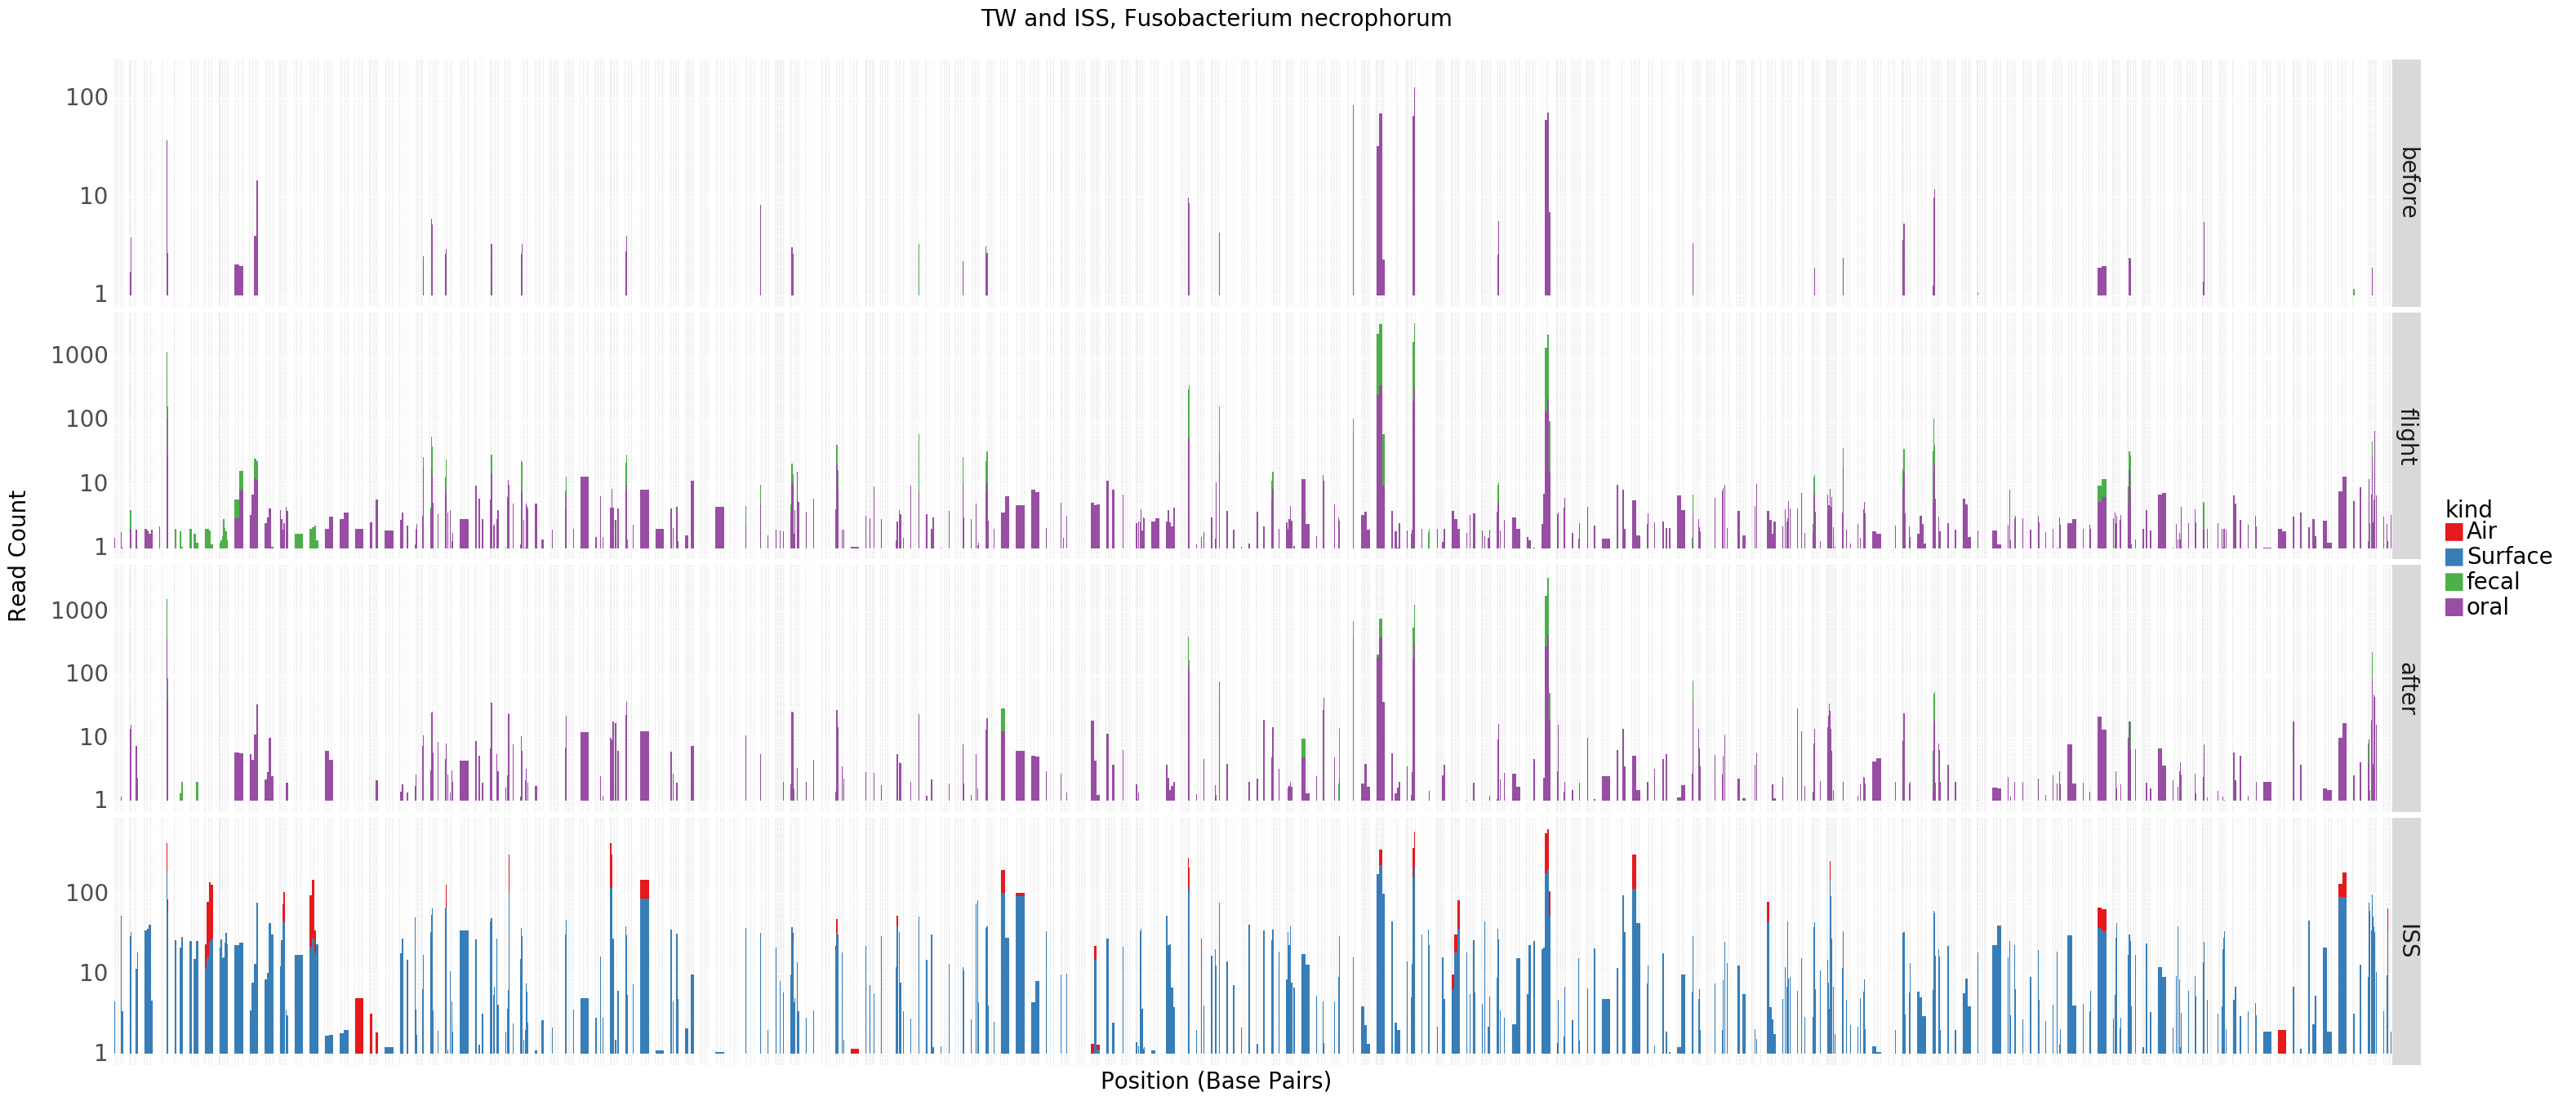

<ggplot: (8767406673223)>

In [74]:
plot_organism('Fusobacterium necrophorum')

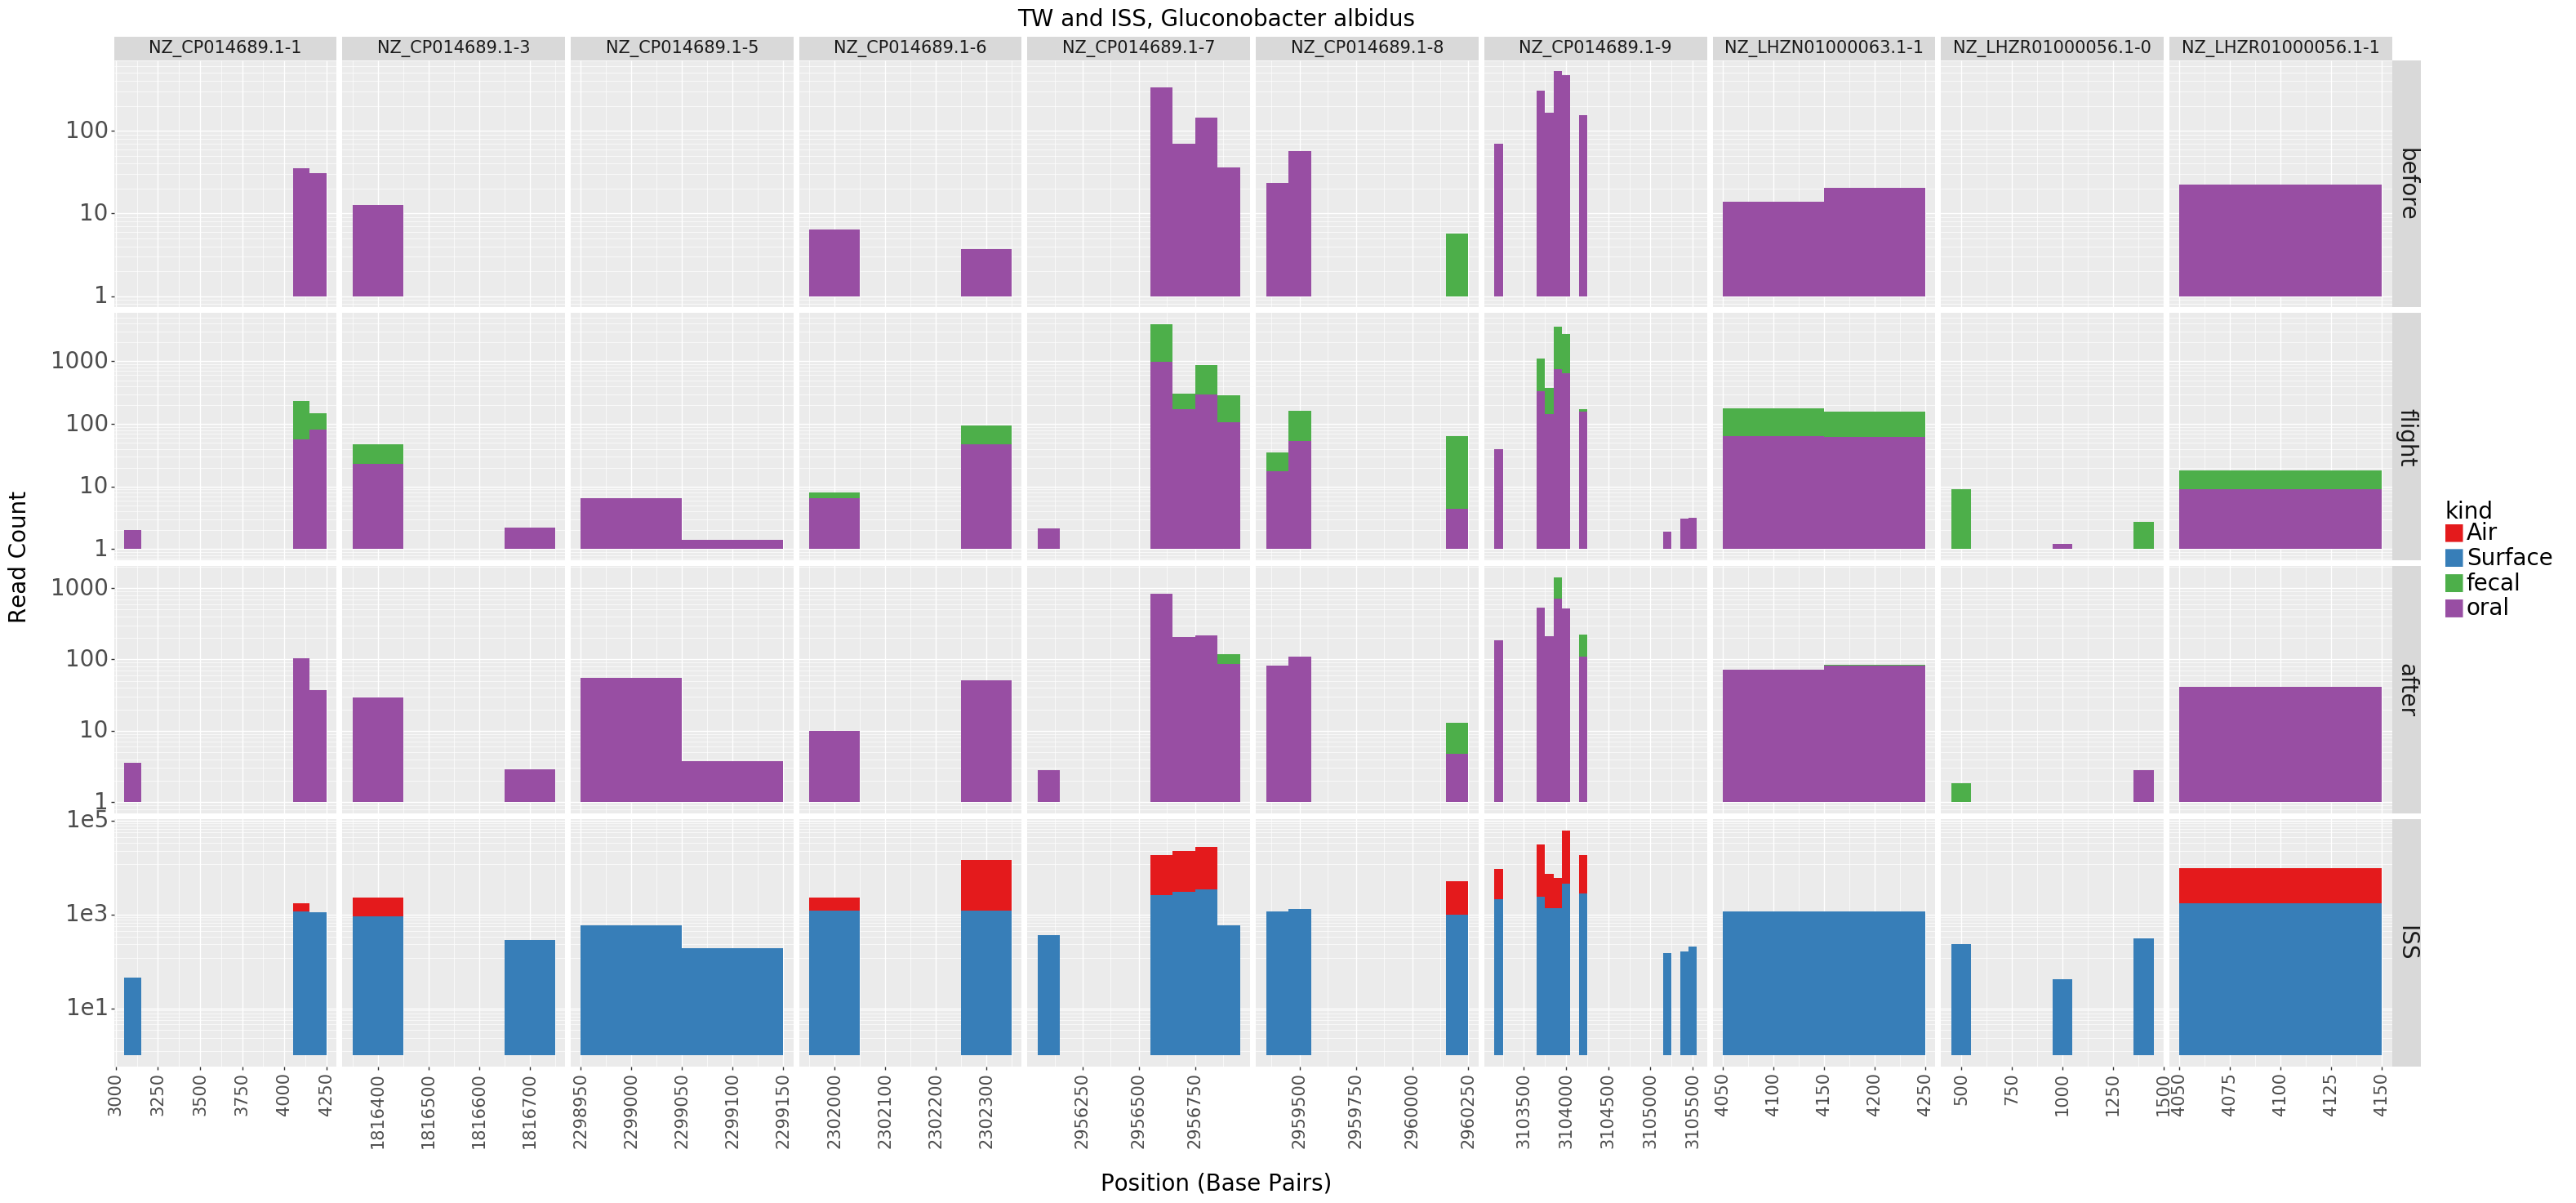

<ggplot: (-9223363269430648828)>

In [75]:
plot_organism('Gluconobacter albidus')

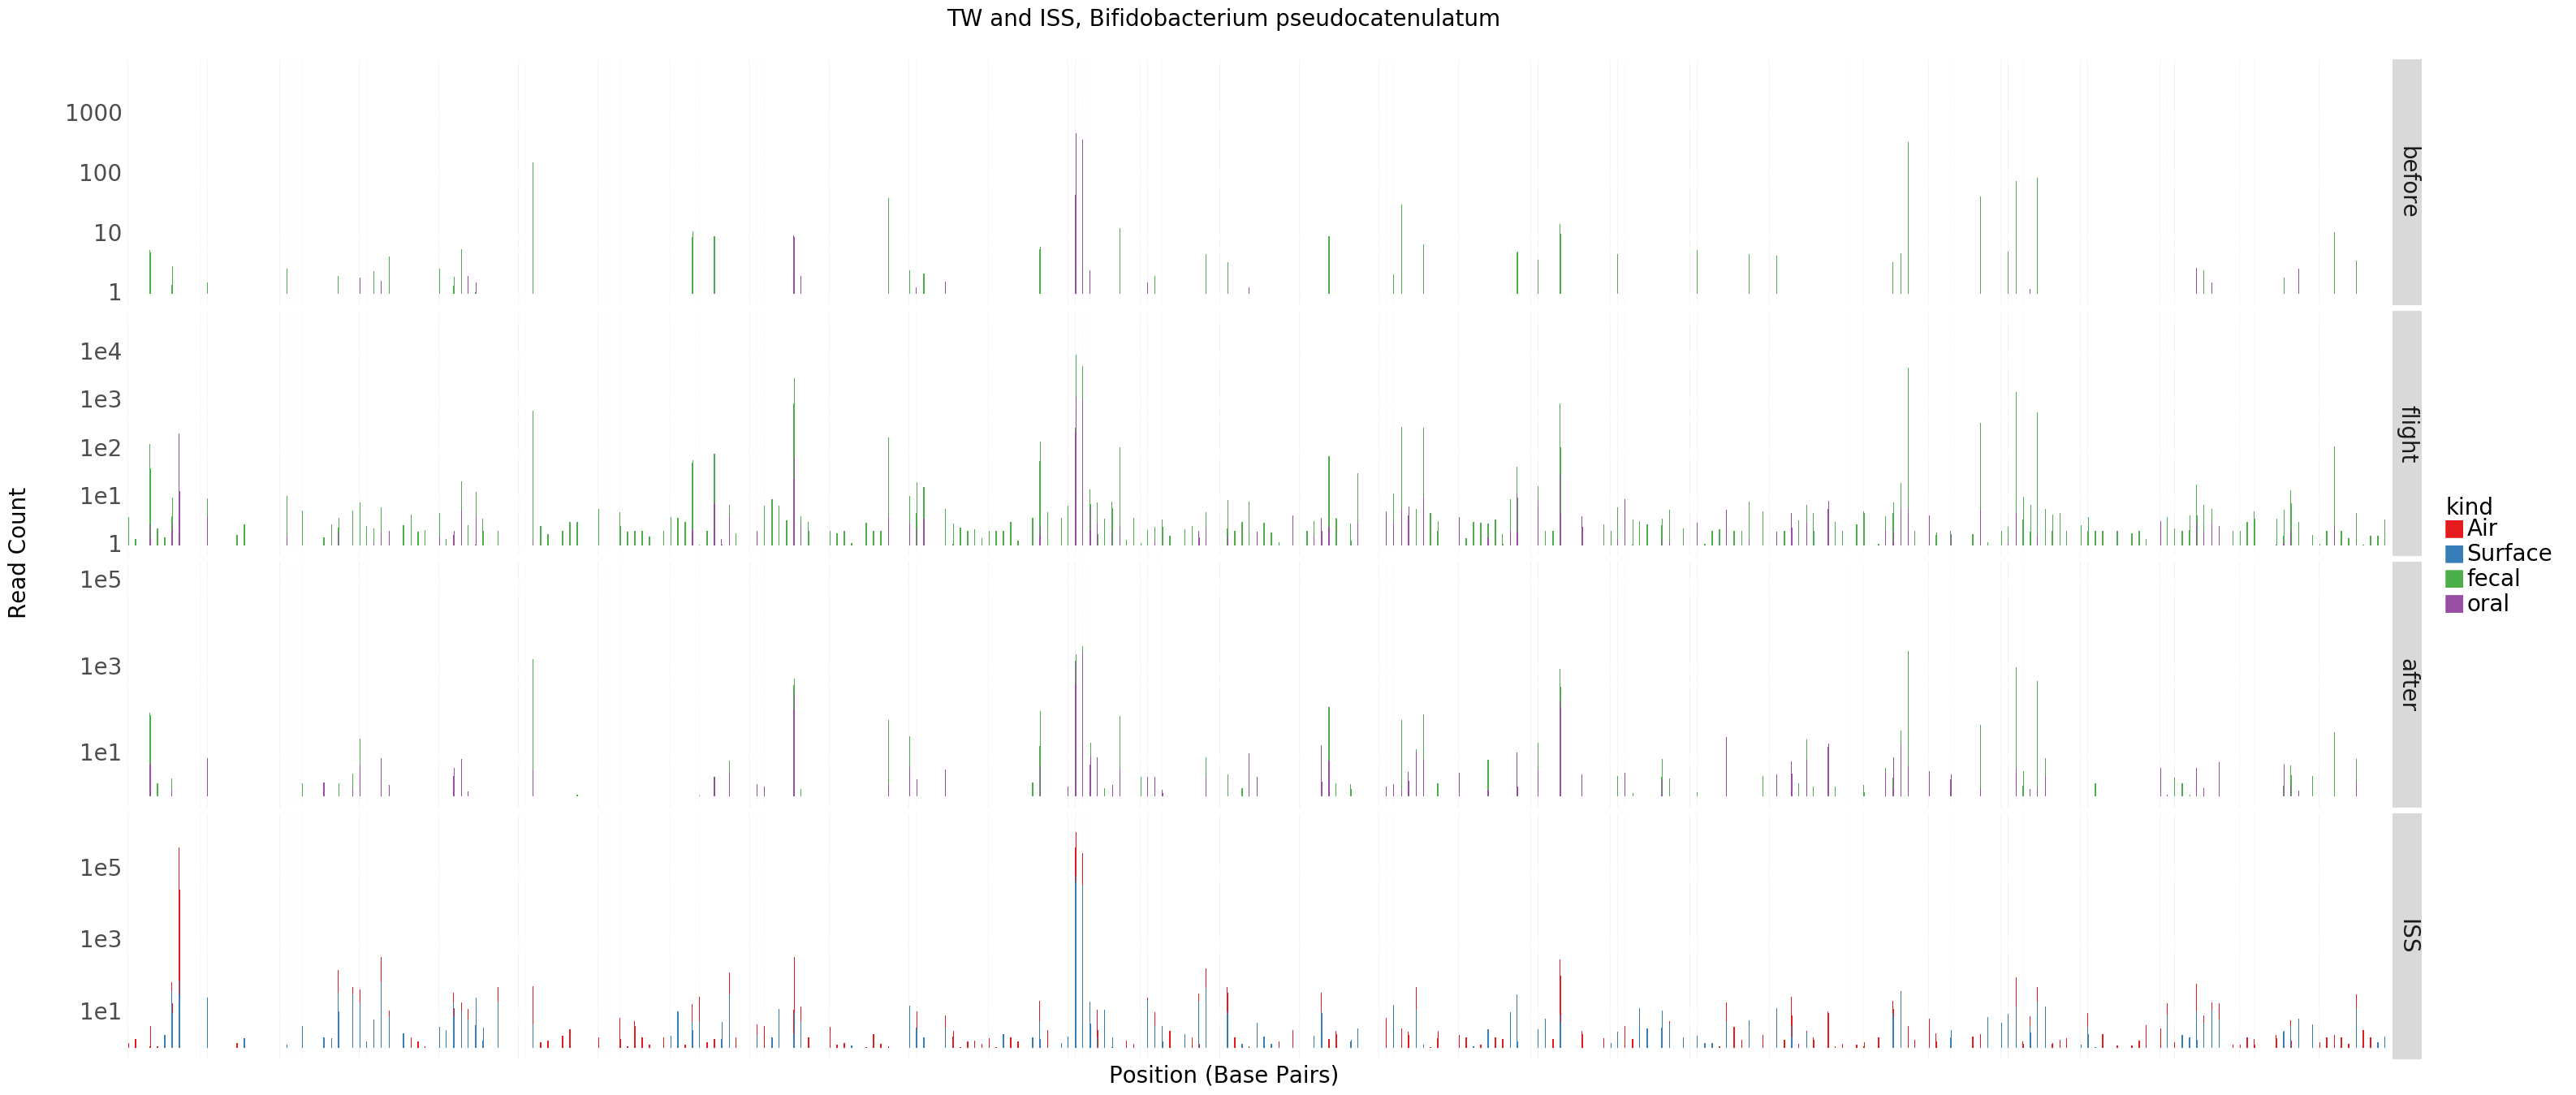

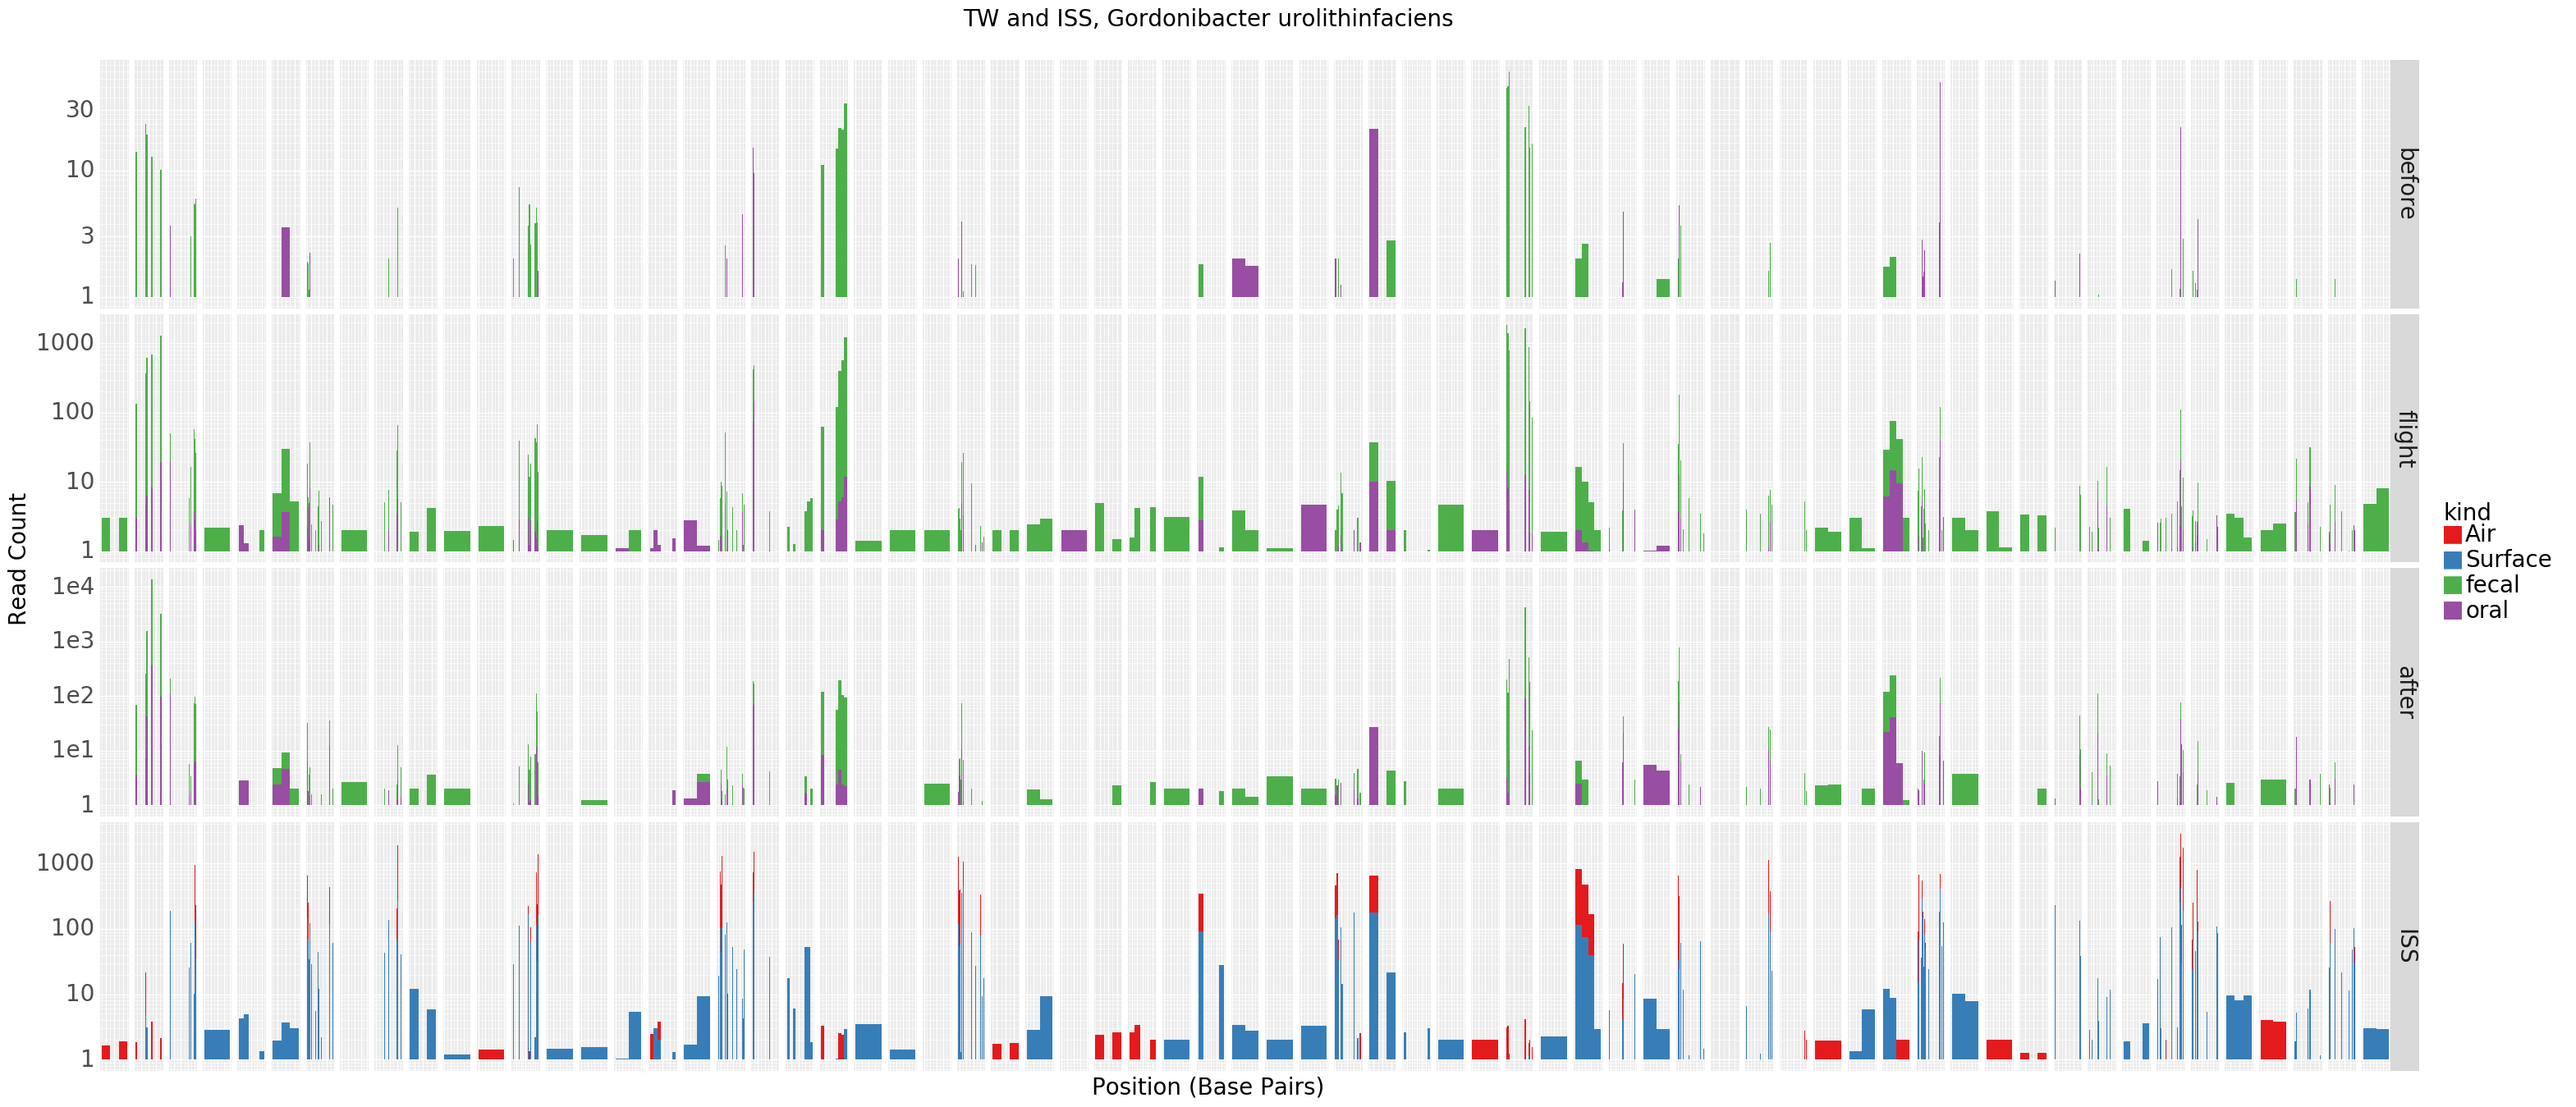

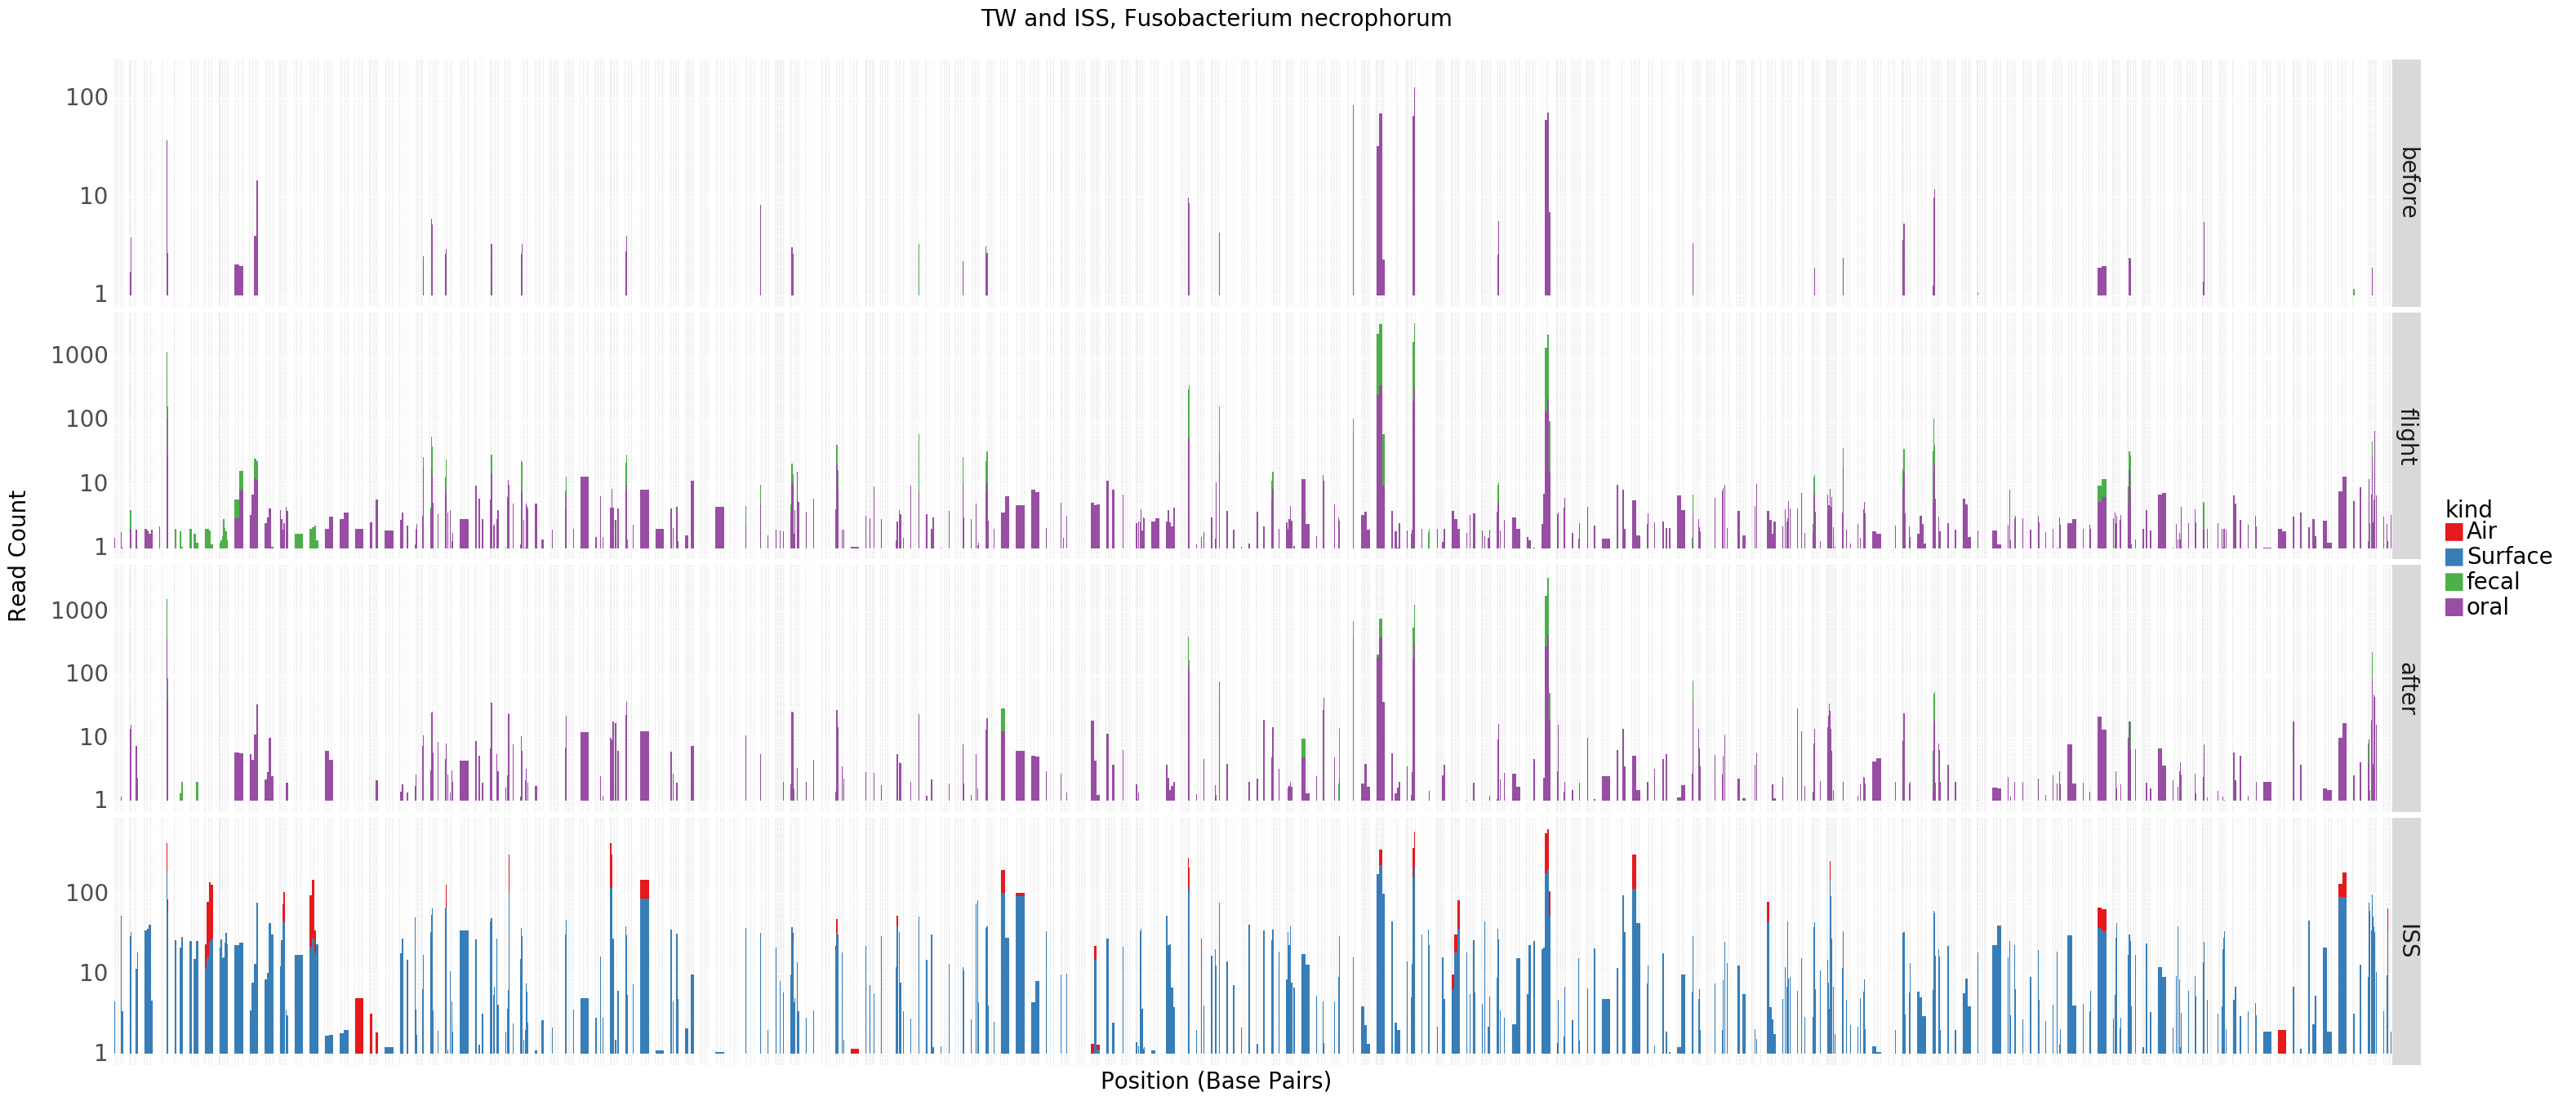

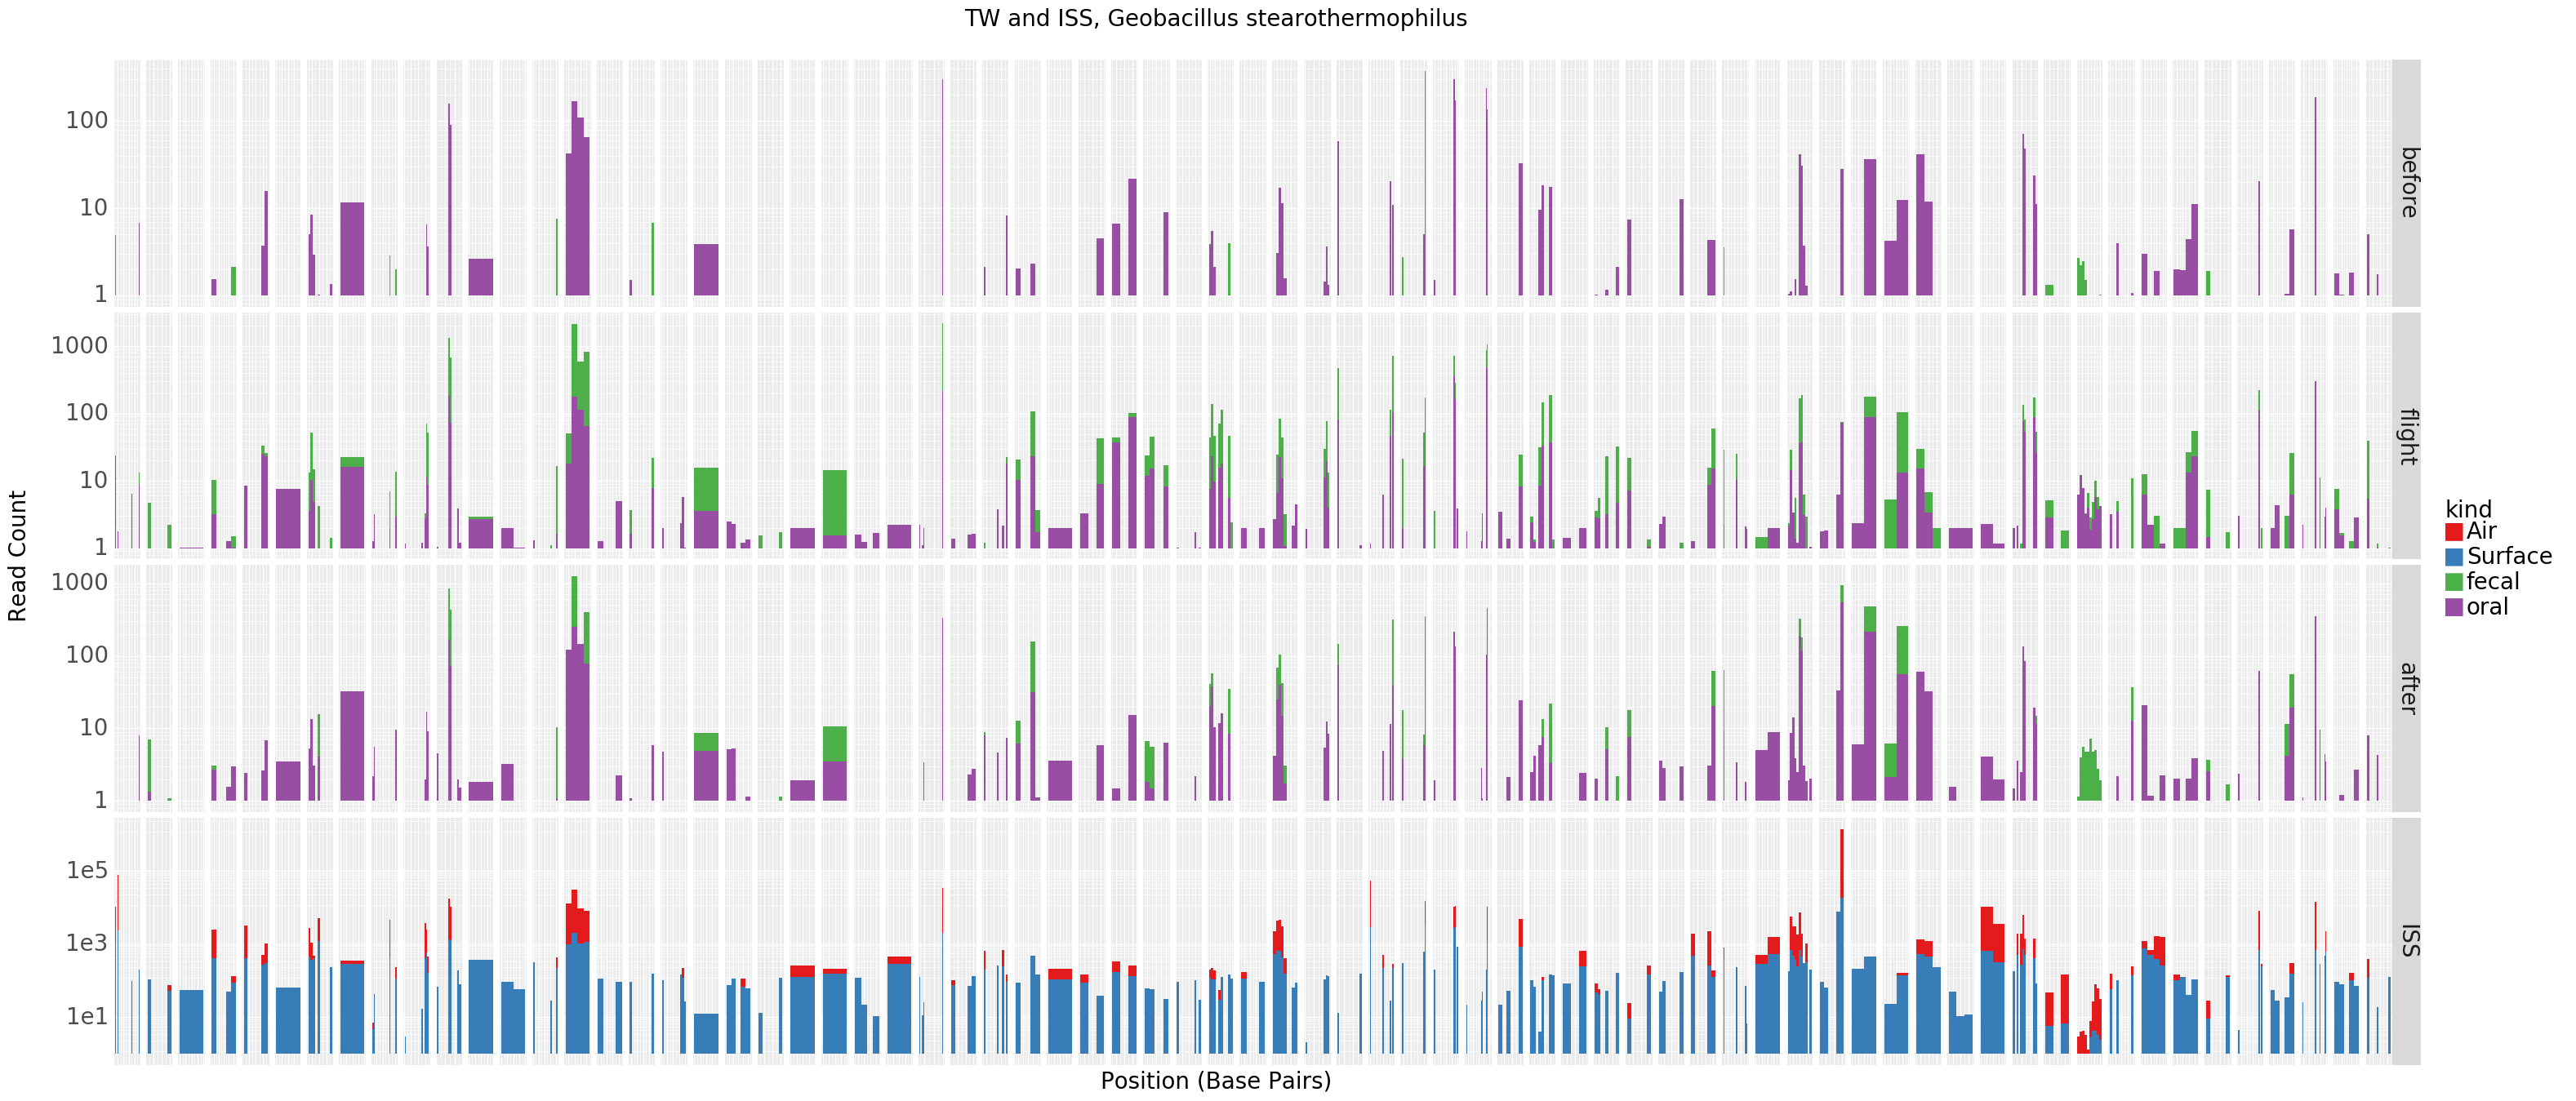

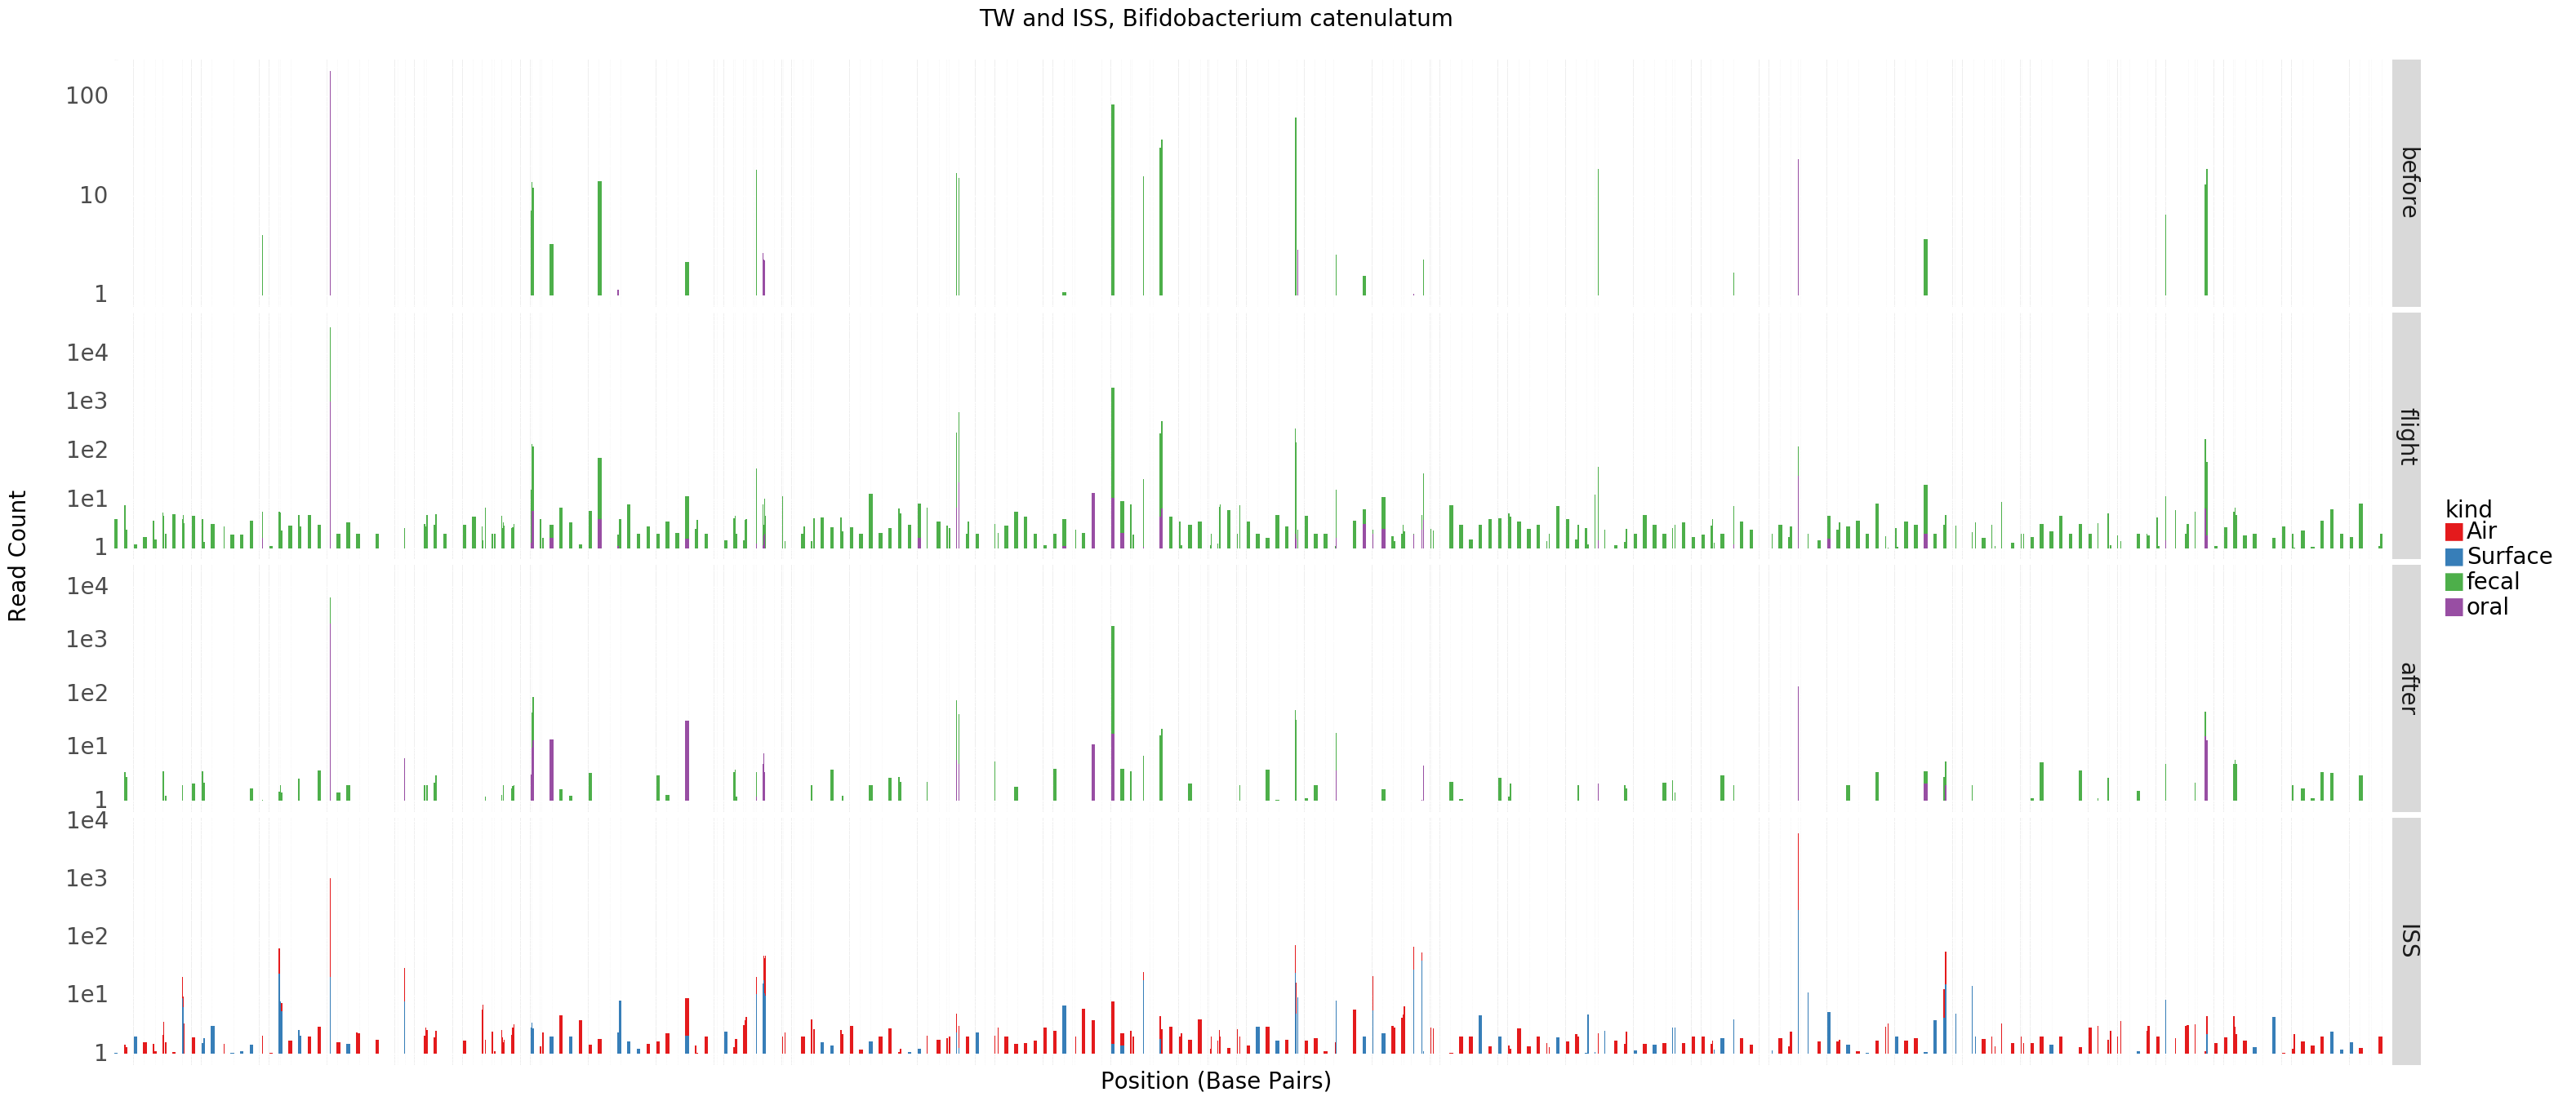

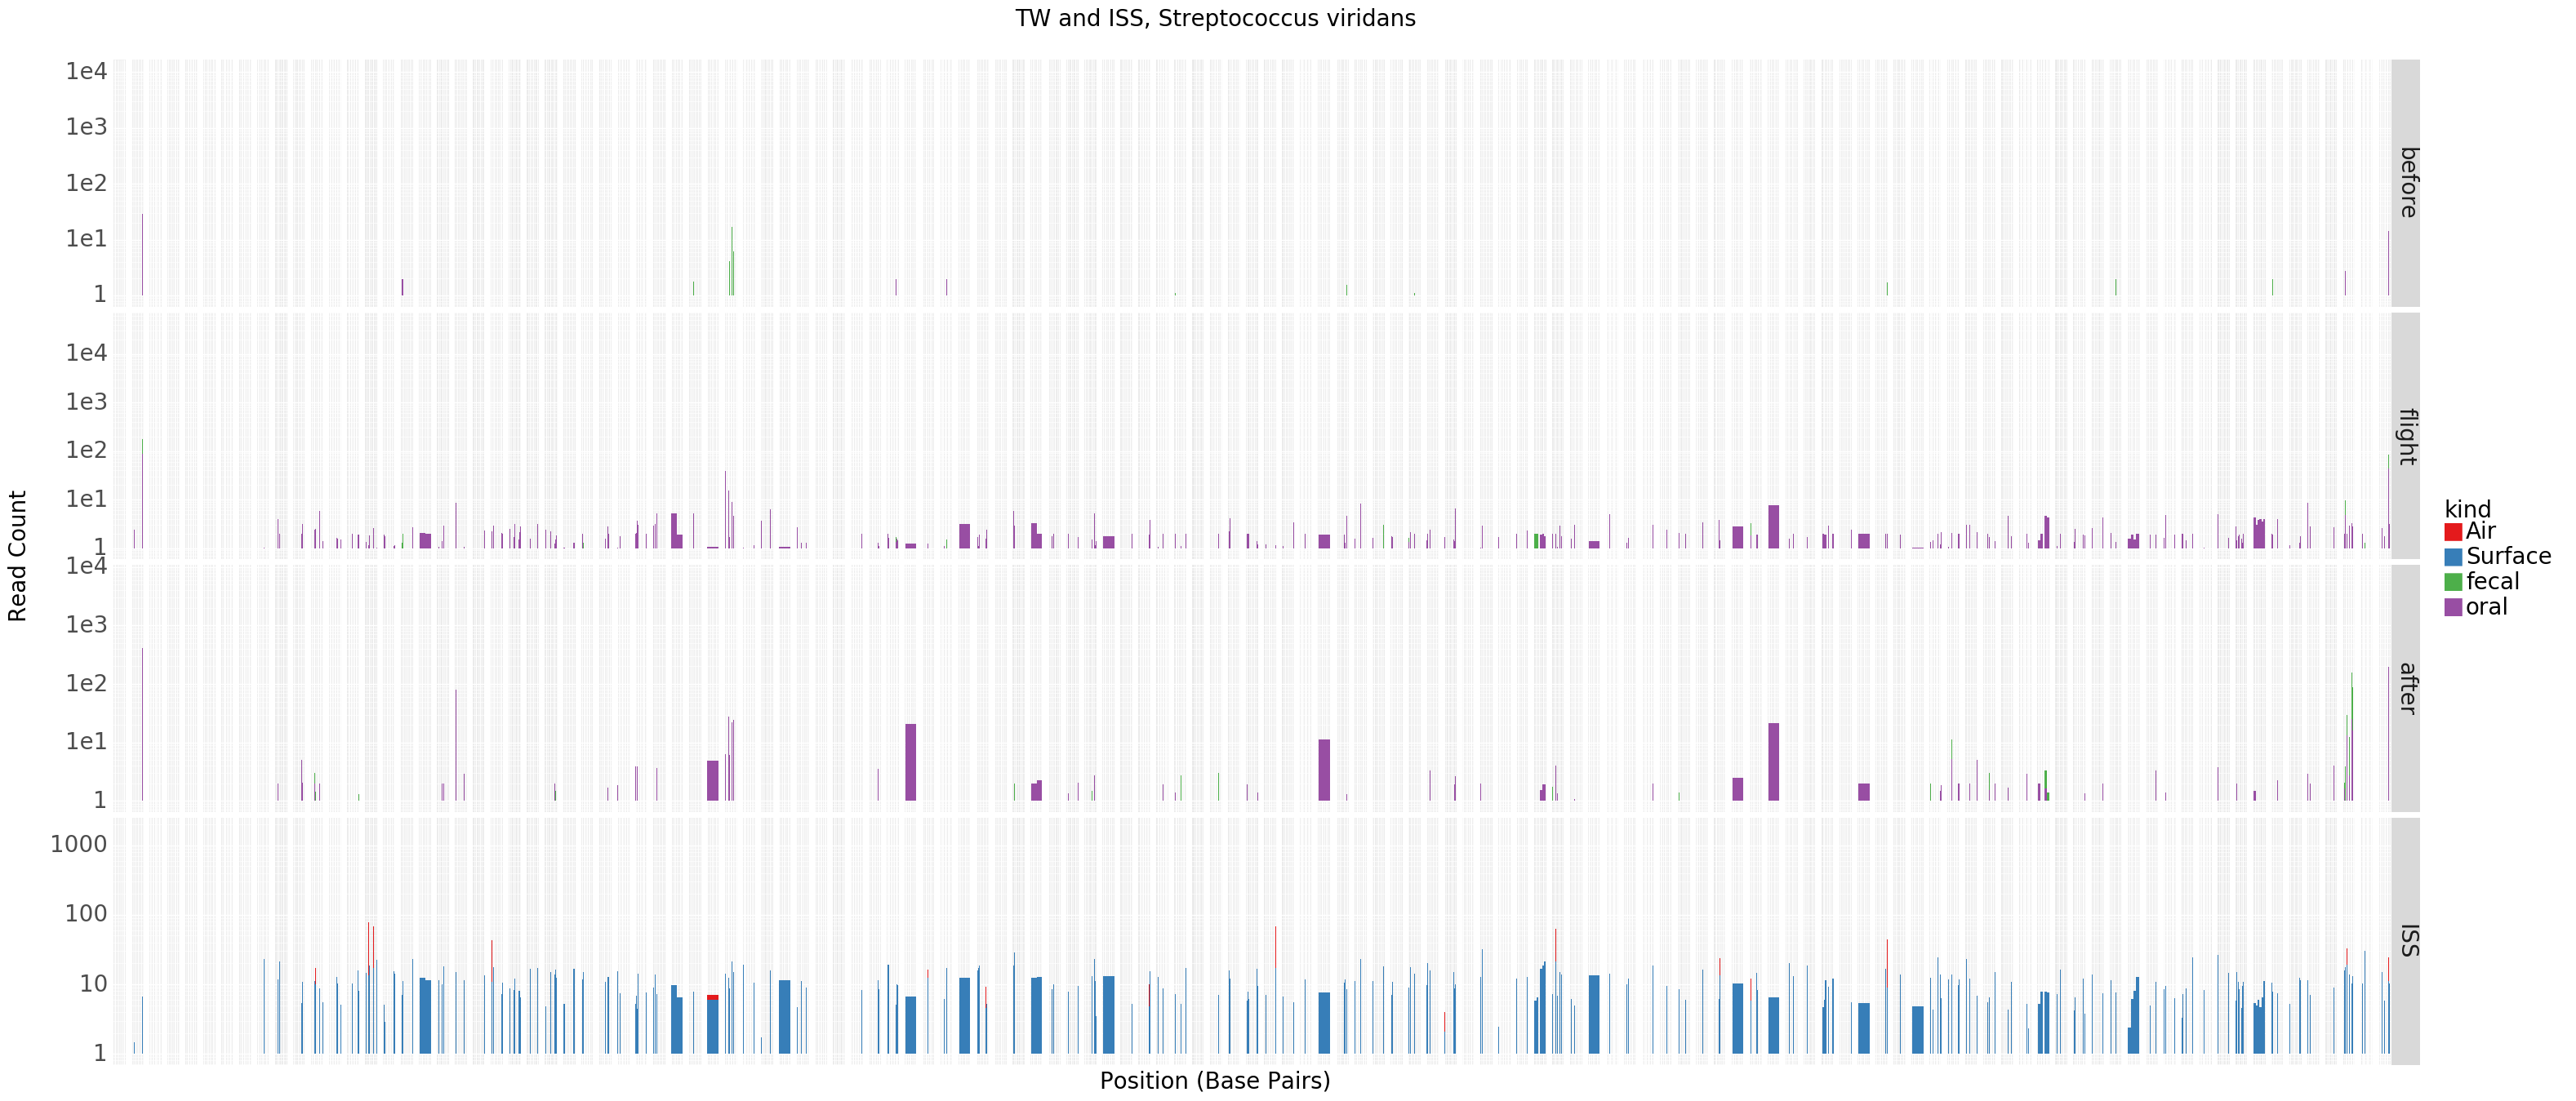

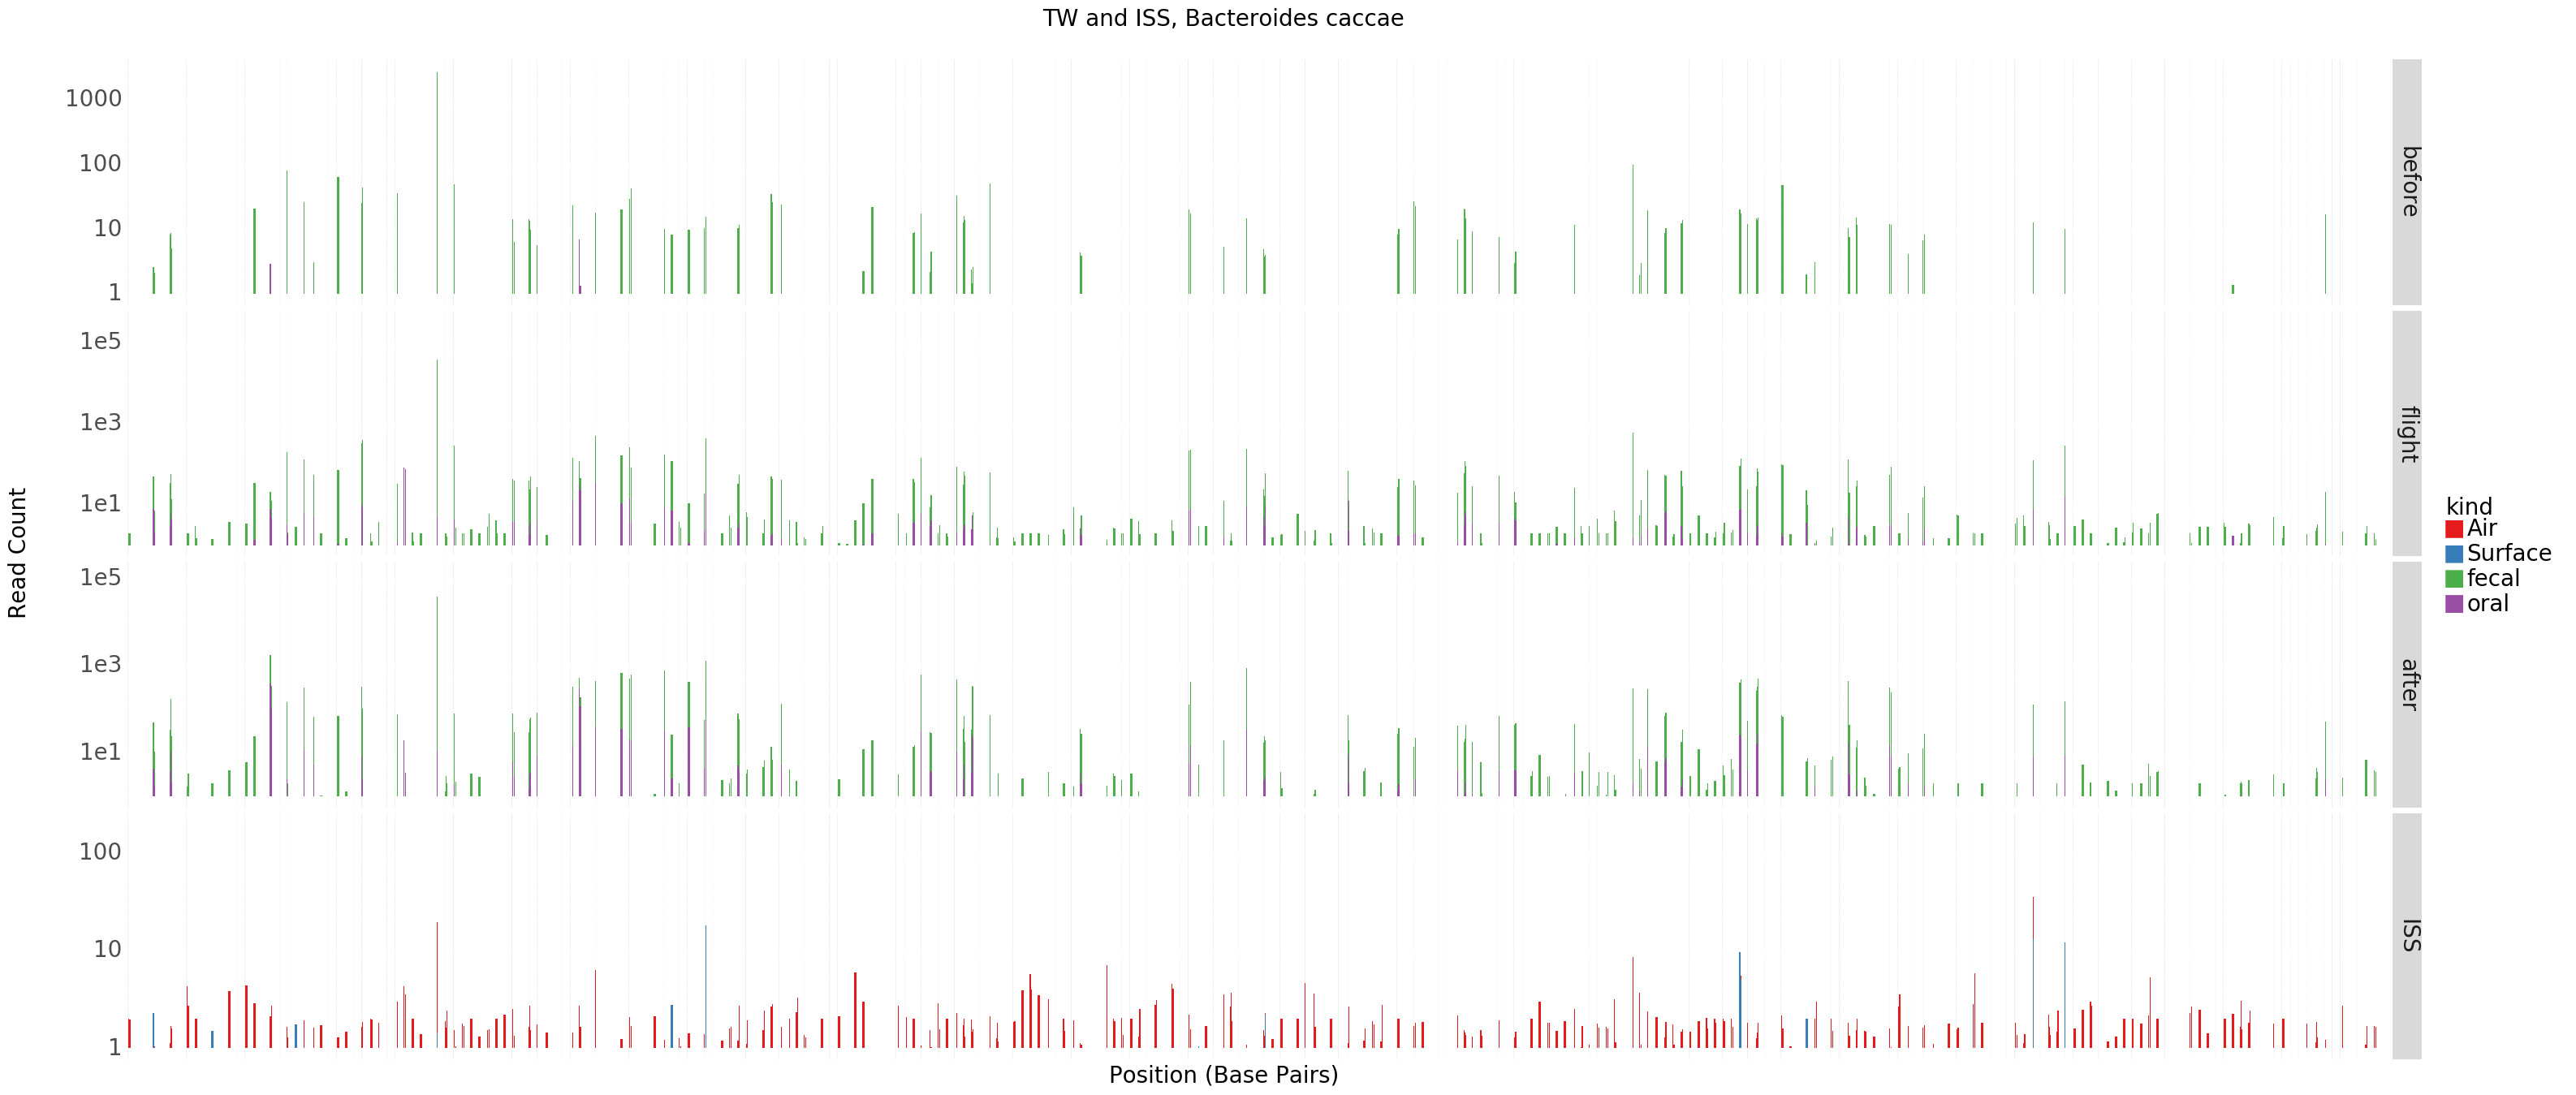

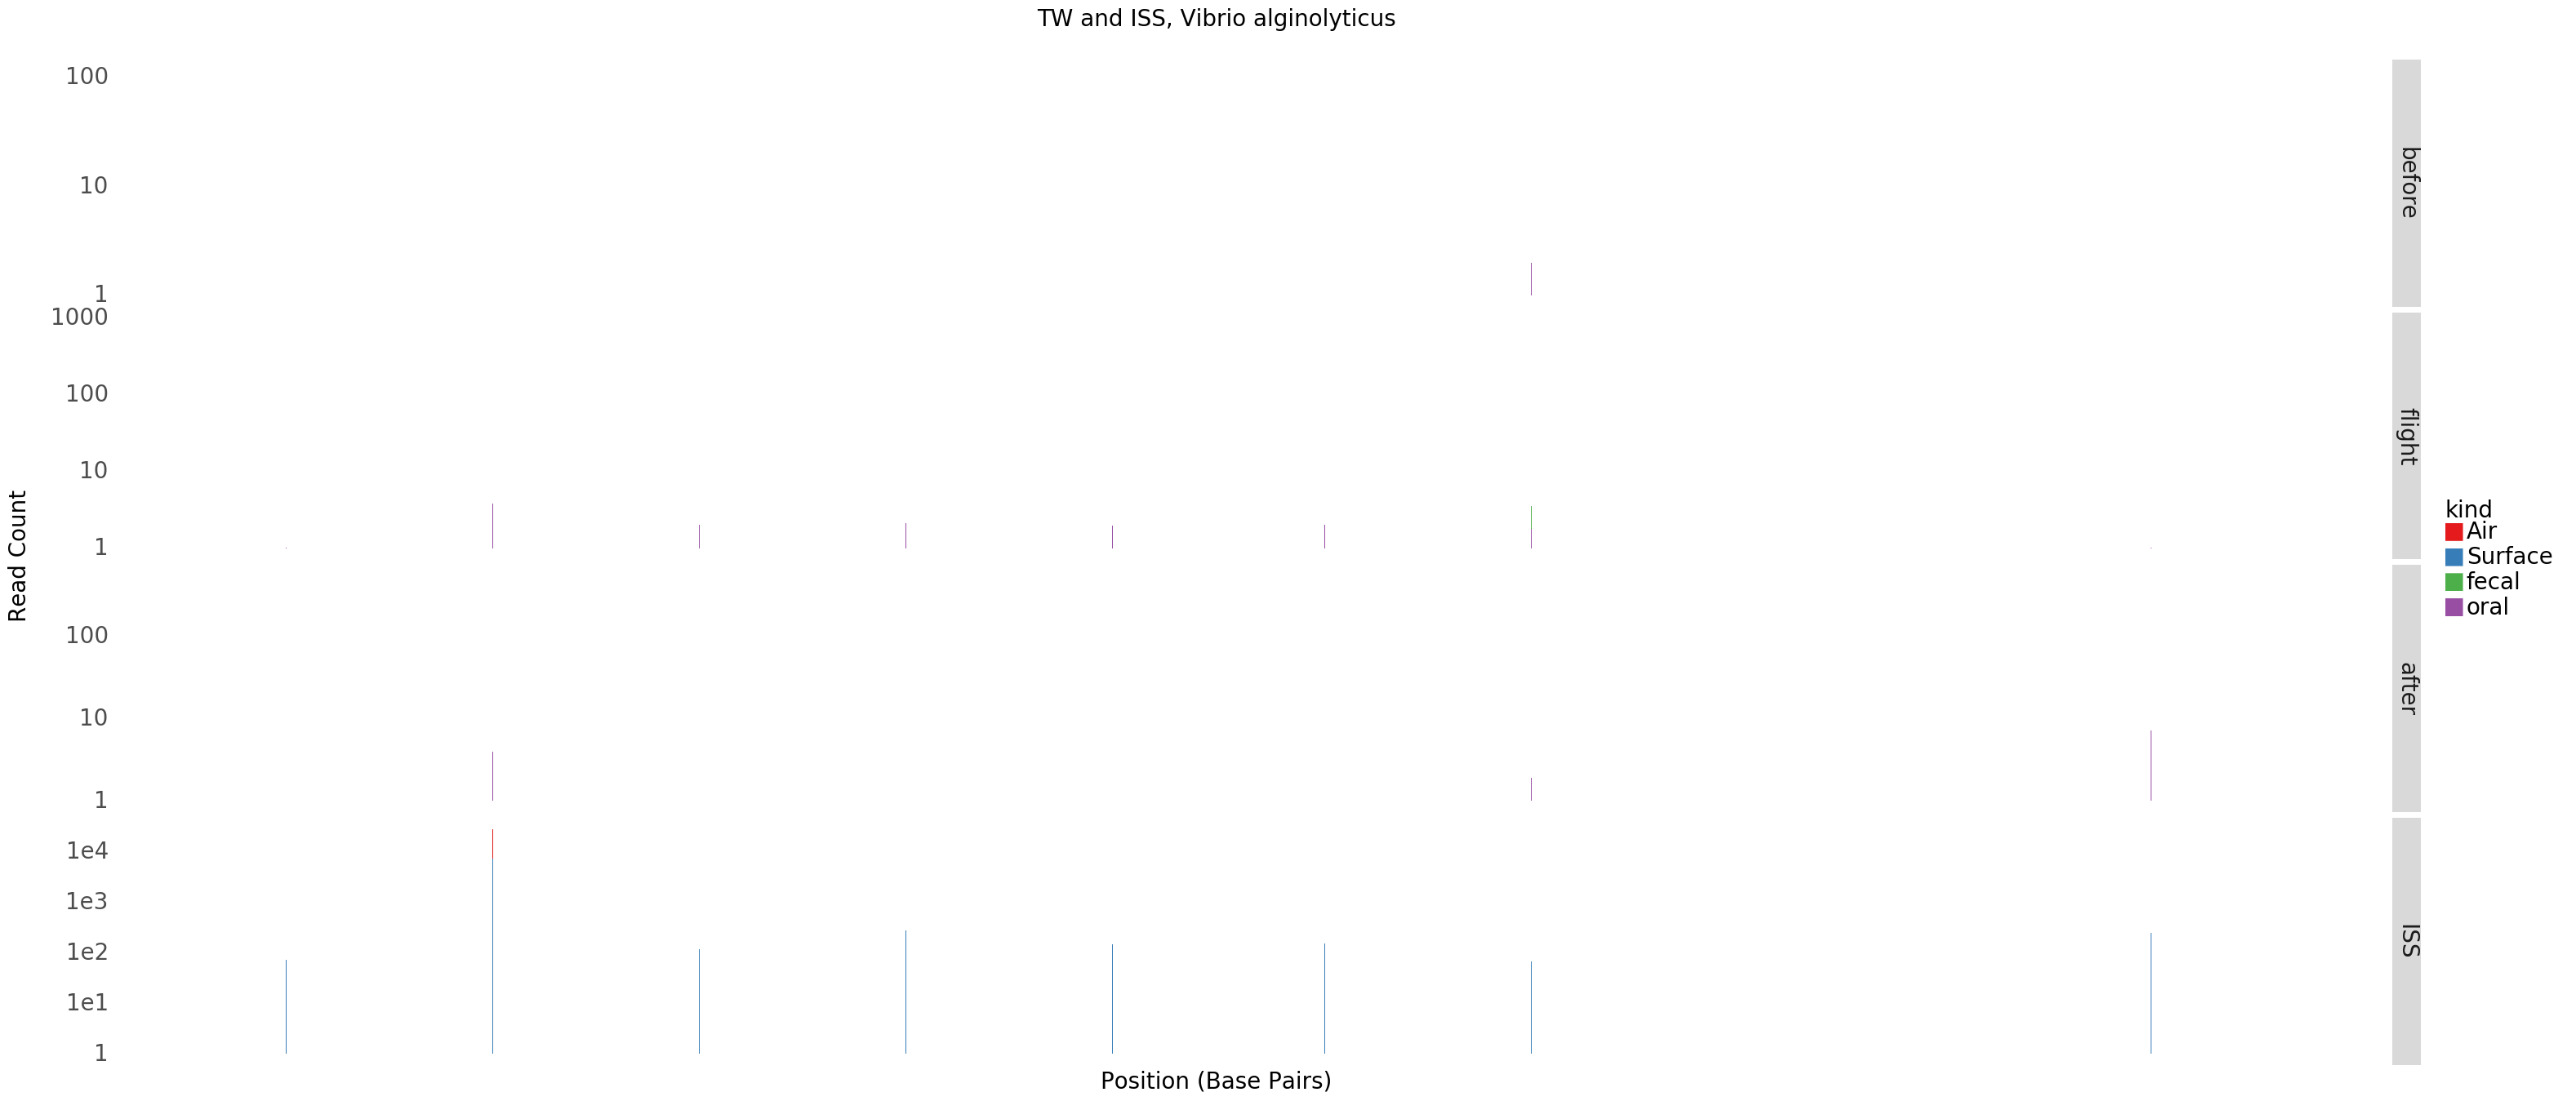

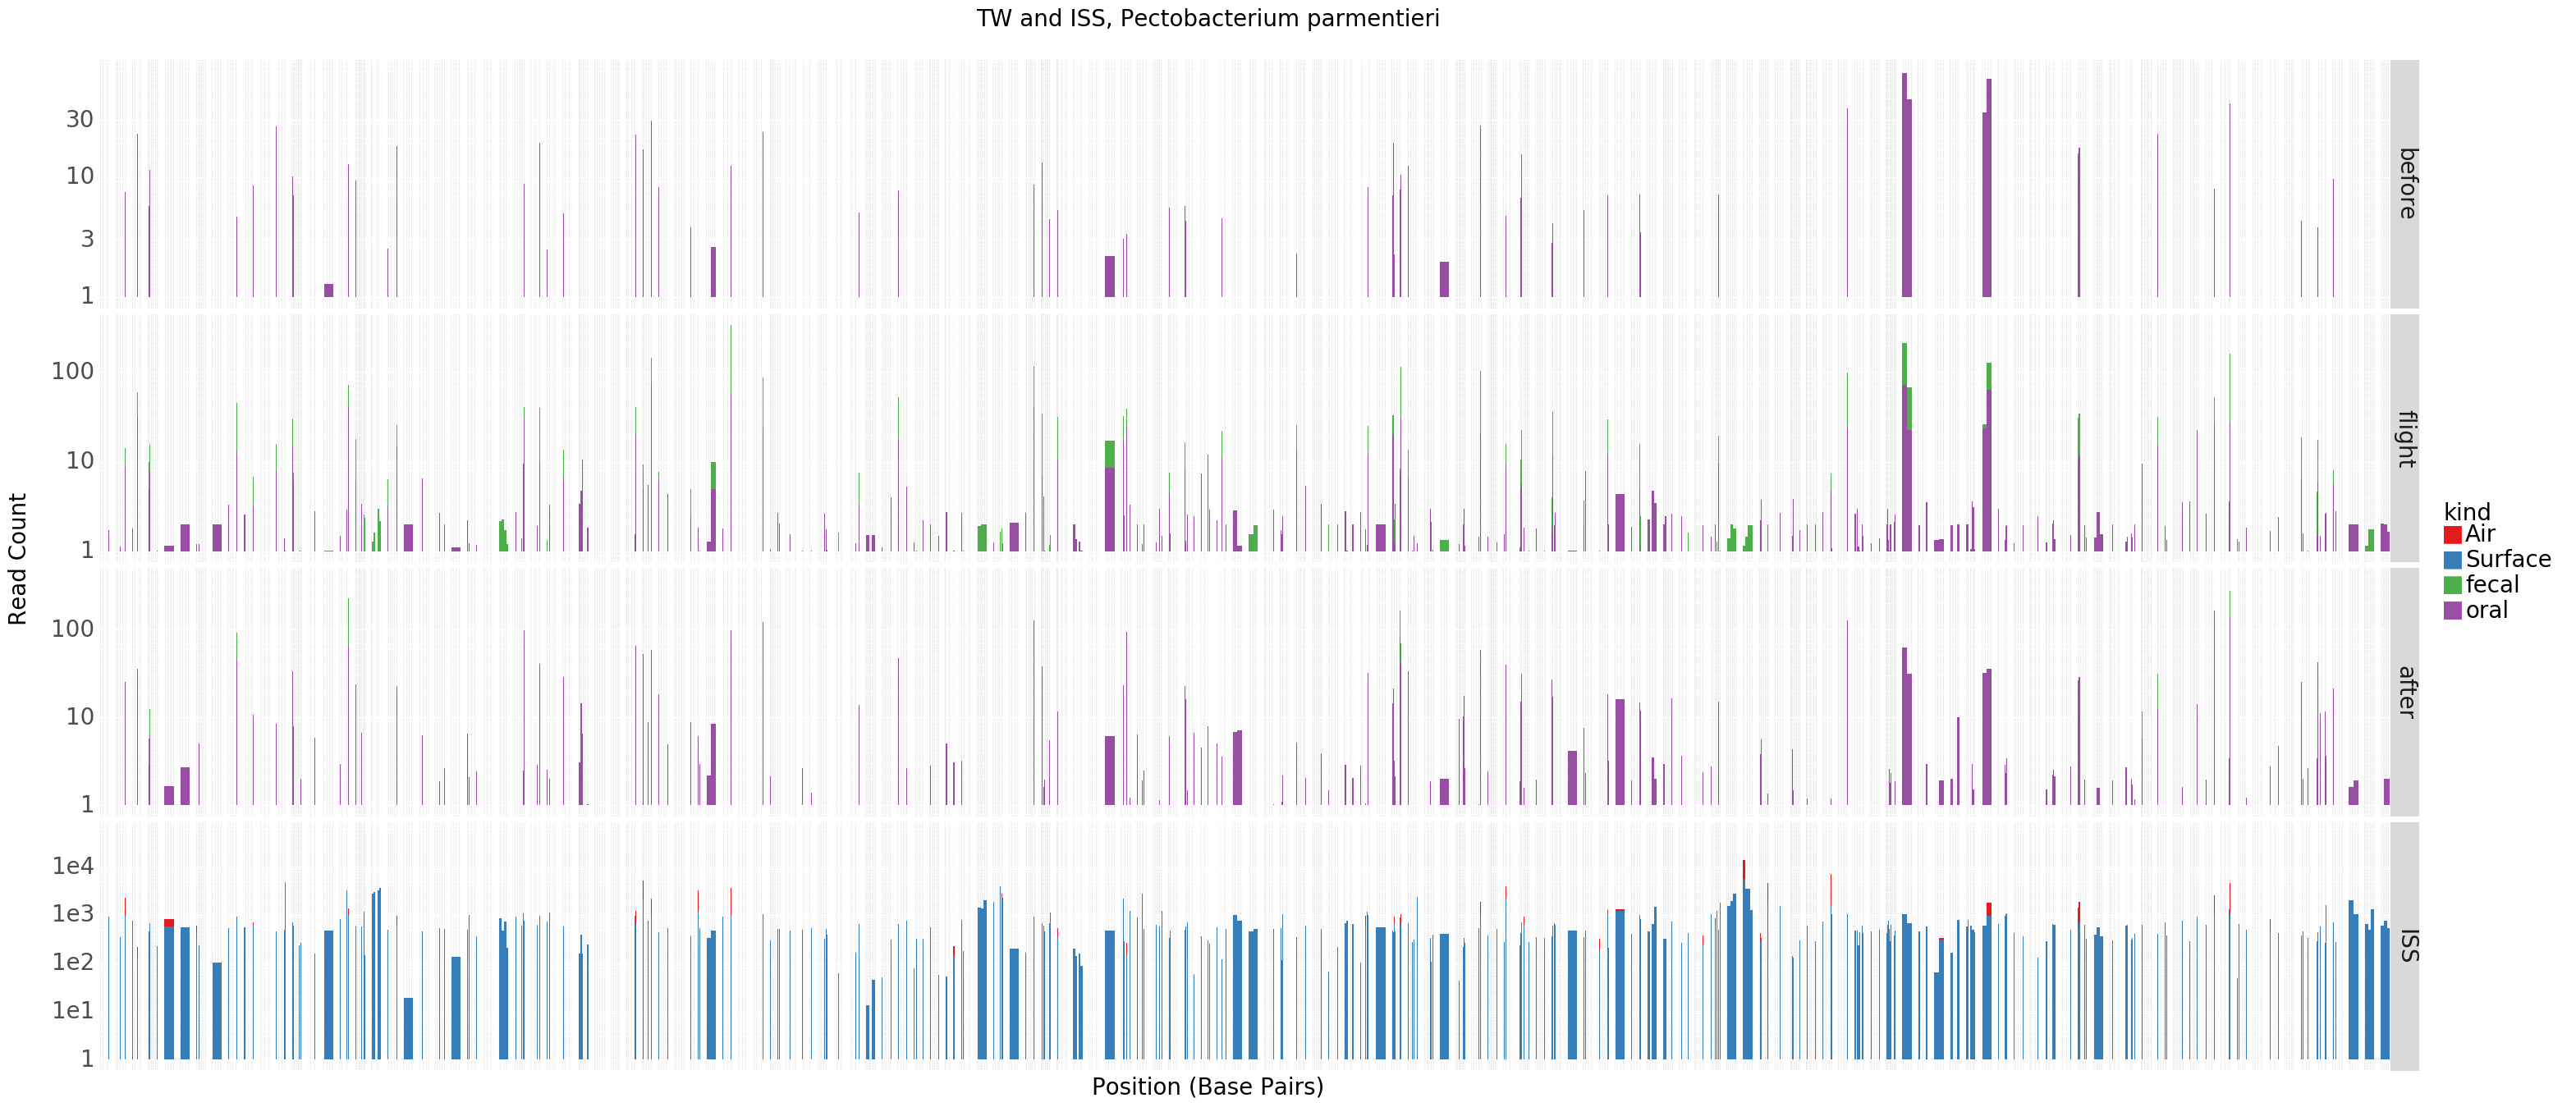

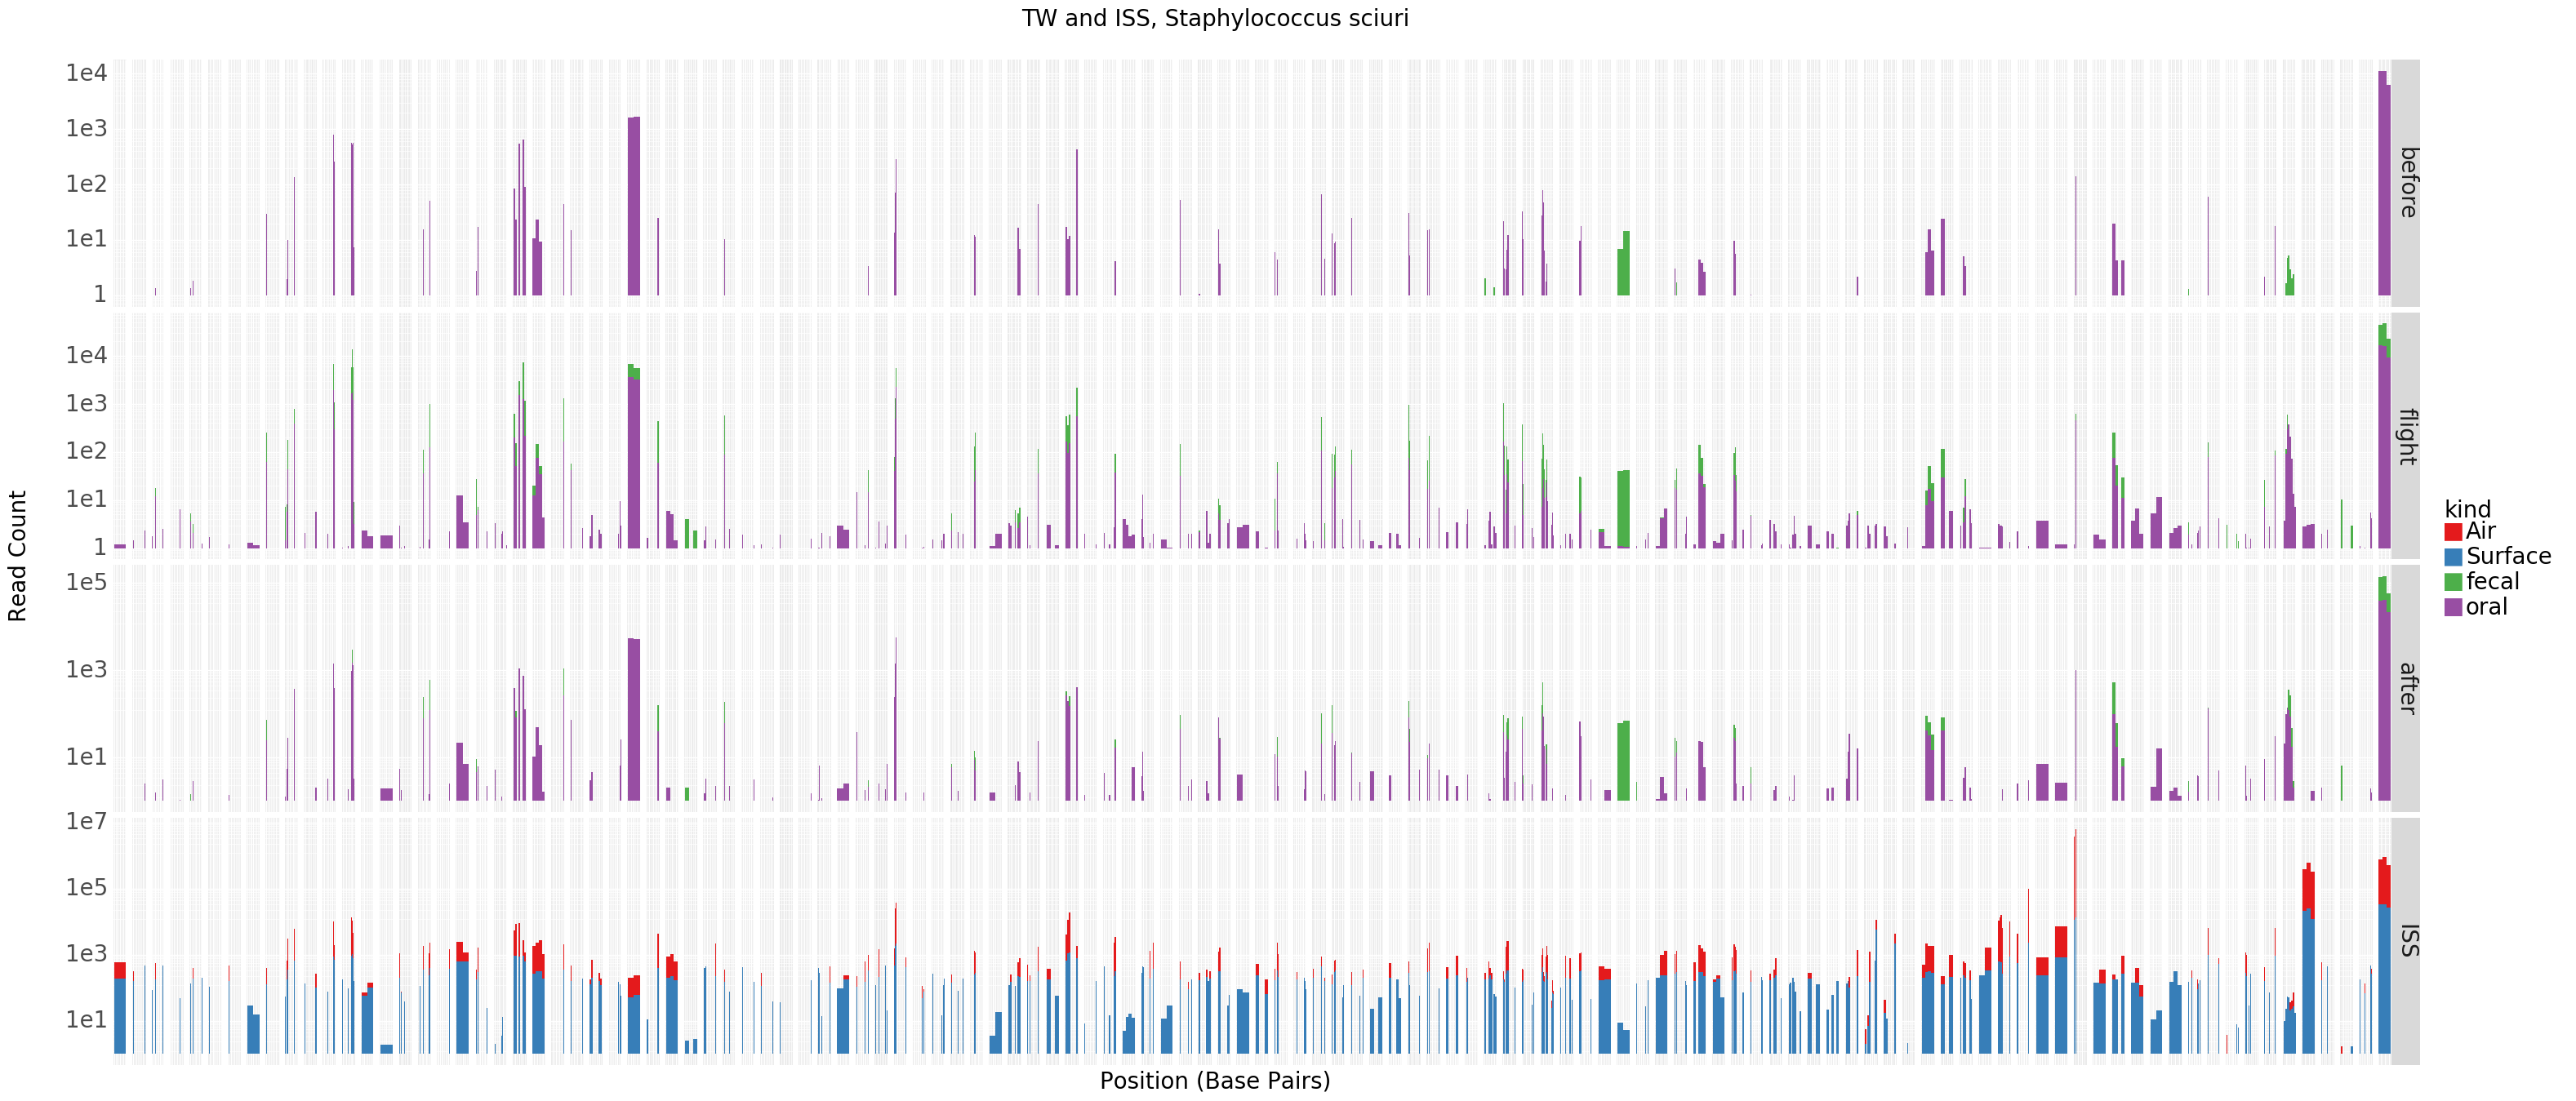

[<ggplot: (8767424436905)>,
 <ggplot: (-9223363269477149594)>,
 <ggplot: (-9223363269443013835)>,
 <ggplot: (8767377156672)>,
 <ggplot: (8767408487758)>,
 <ggplot: (-9223363269427511608)>,
 <ggplot: (-9223363269468810671)>,
 <ggplot: (8767396810076)>,
 <ggplot: (-9223363269443472864)>,
 <ggplot: (8767393173112)>]

In [76]:
organisms = list(counts['true_transfer'].sort_values(ascending=False).head(10).index)
plots = [plot_organism(org) for org in organisms]

plots

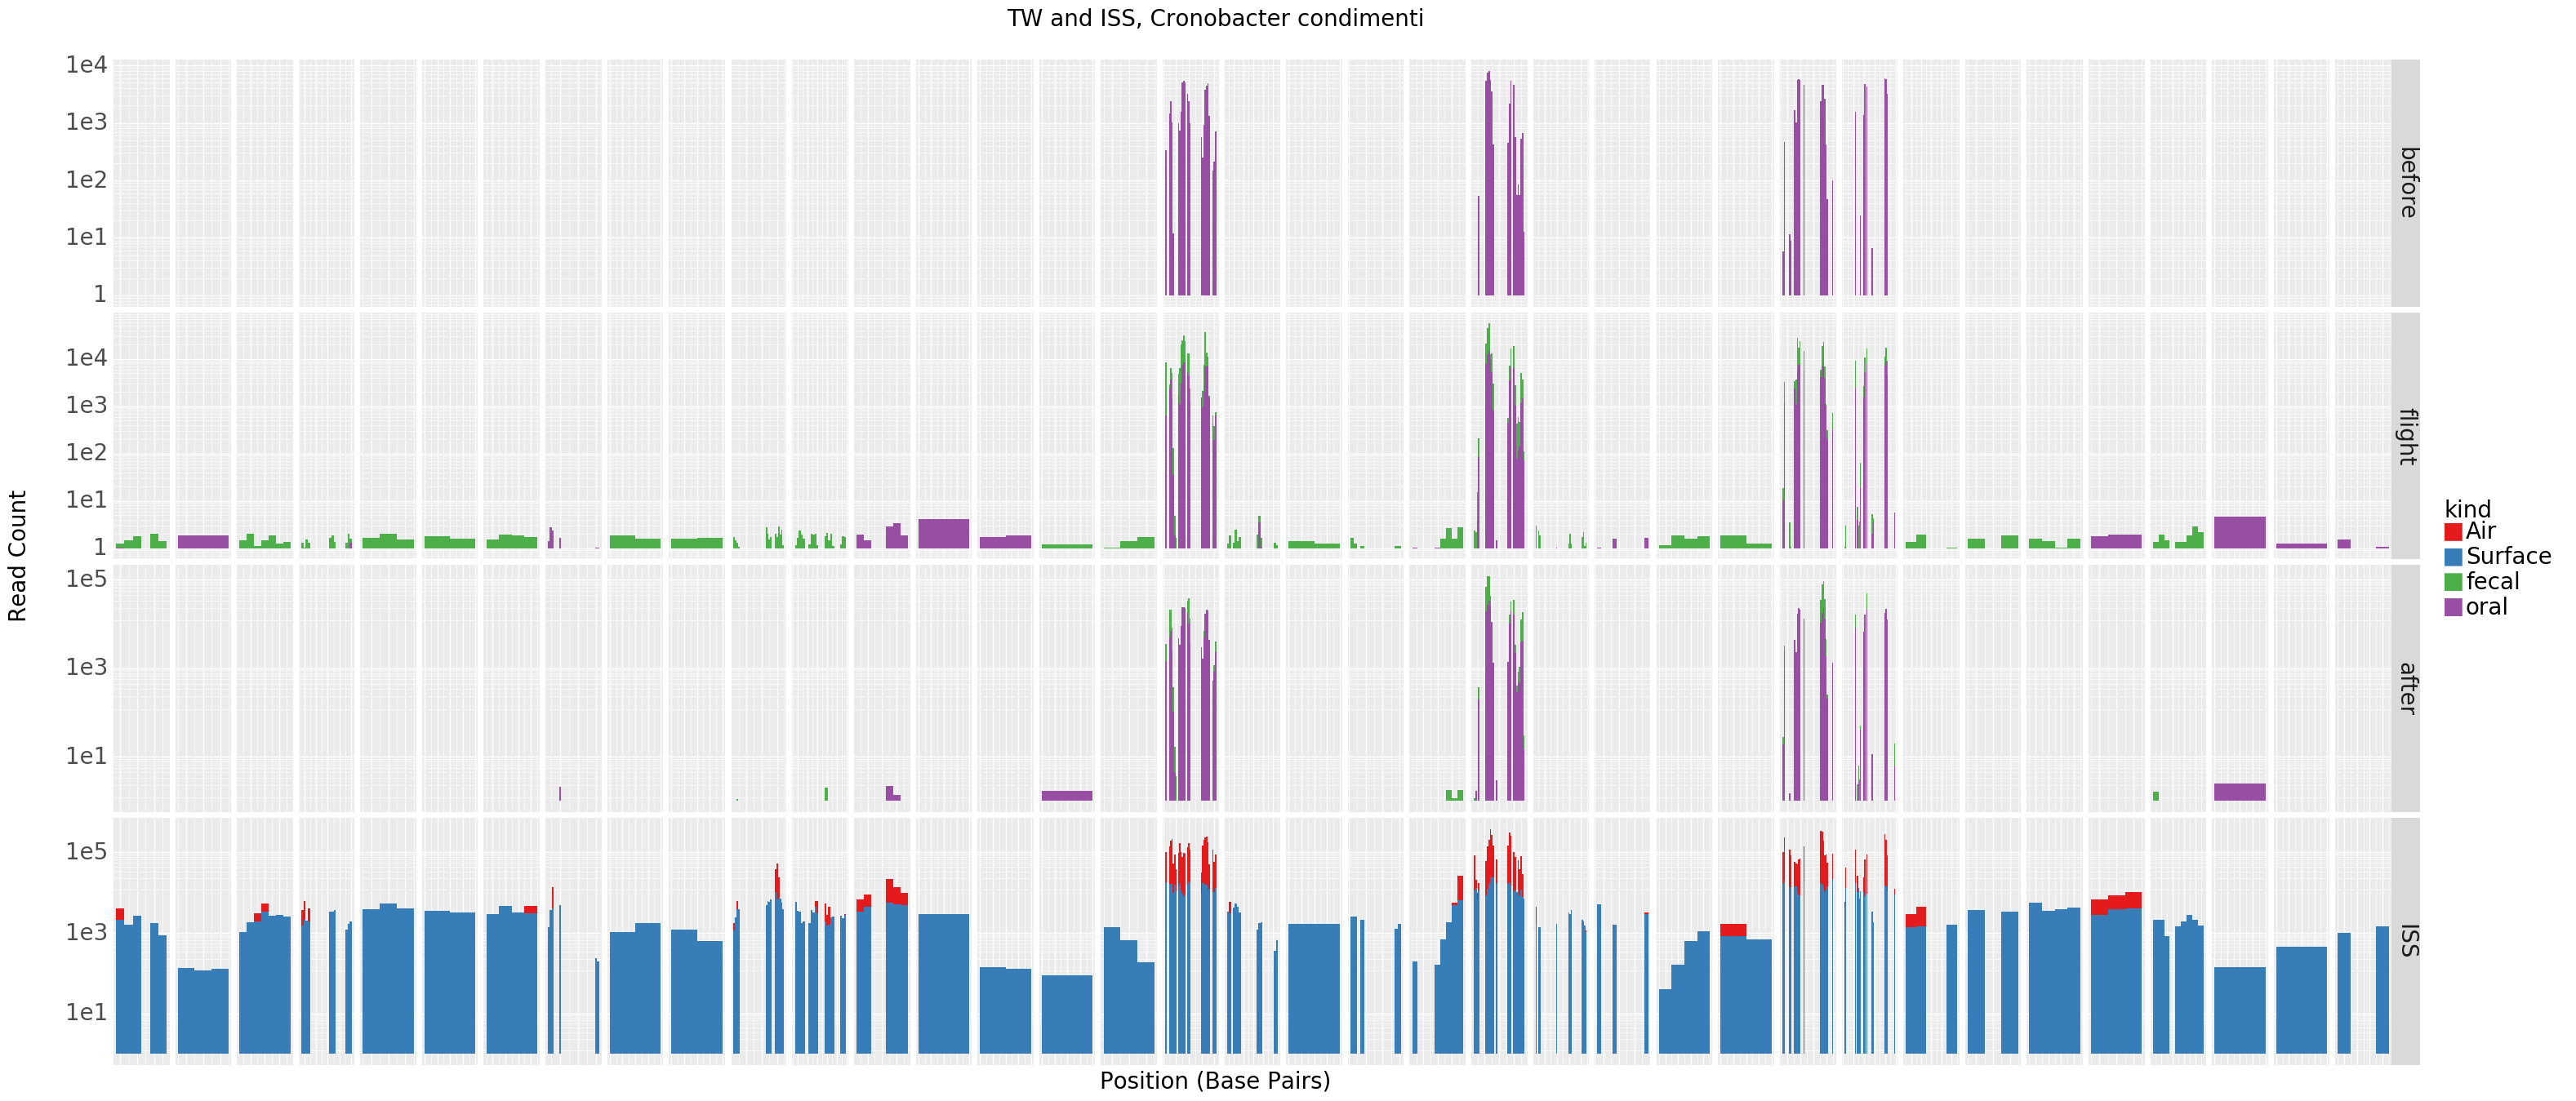

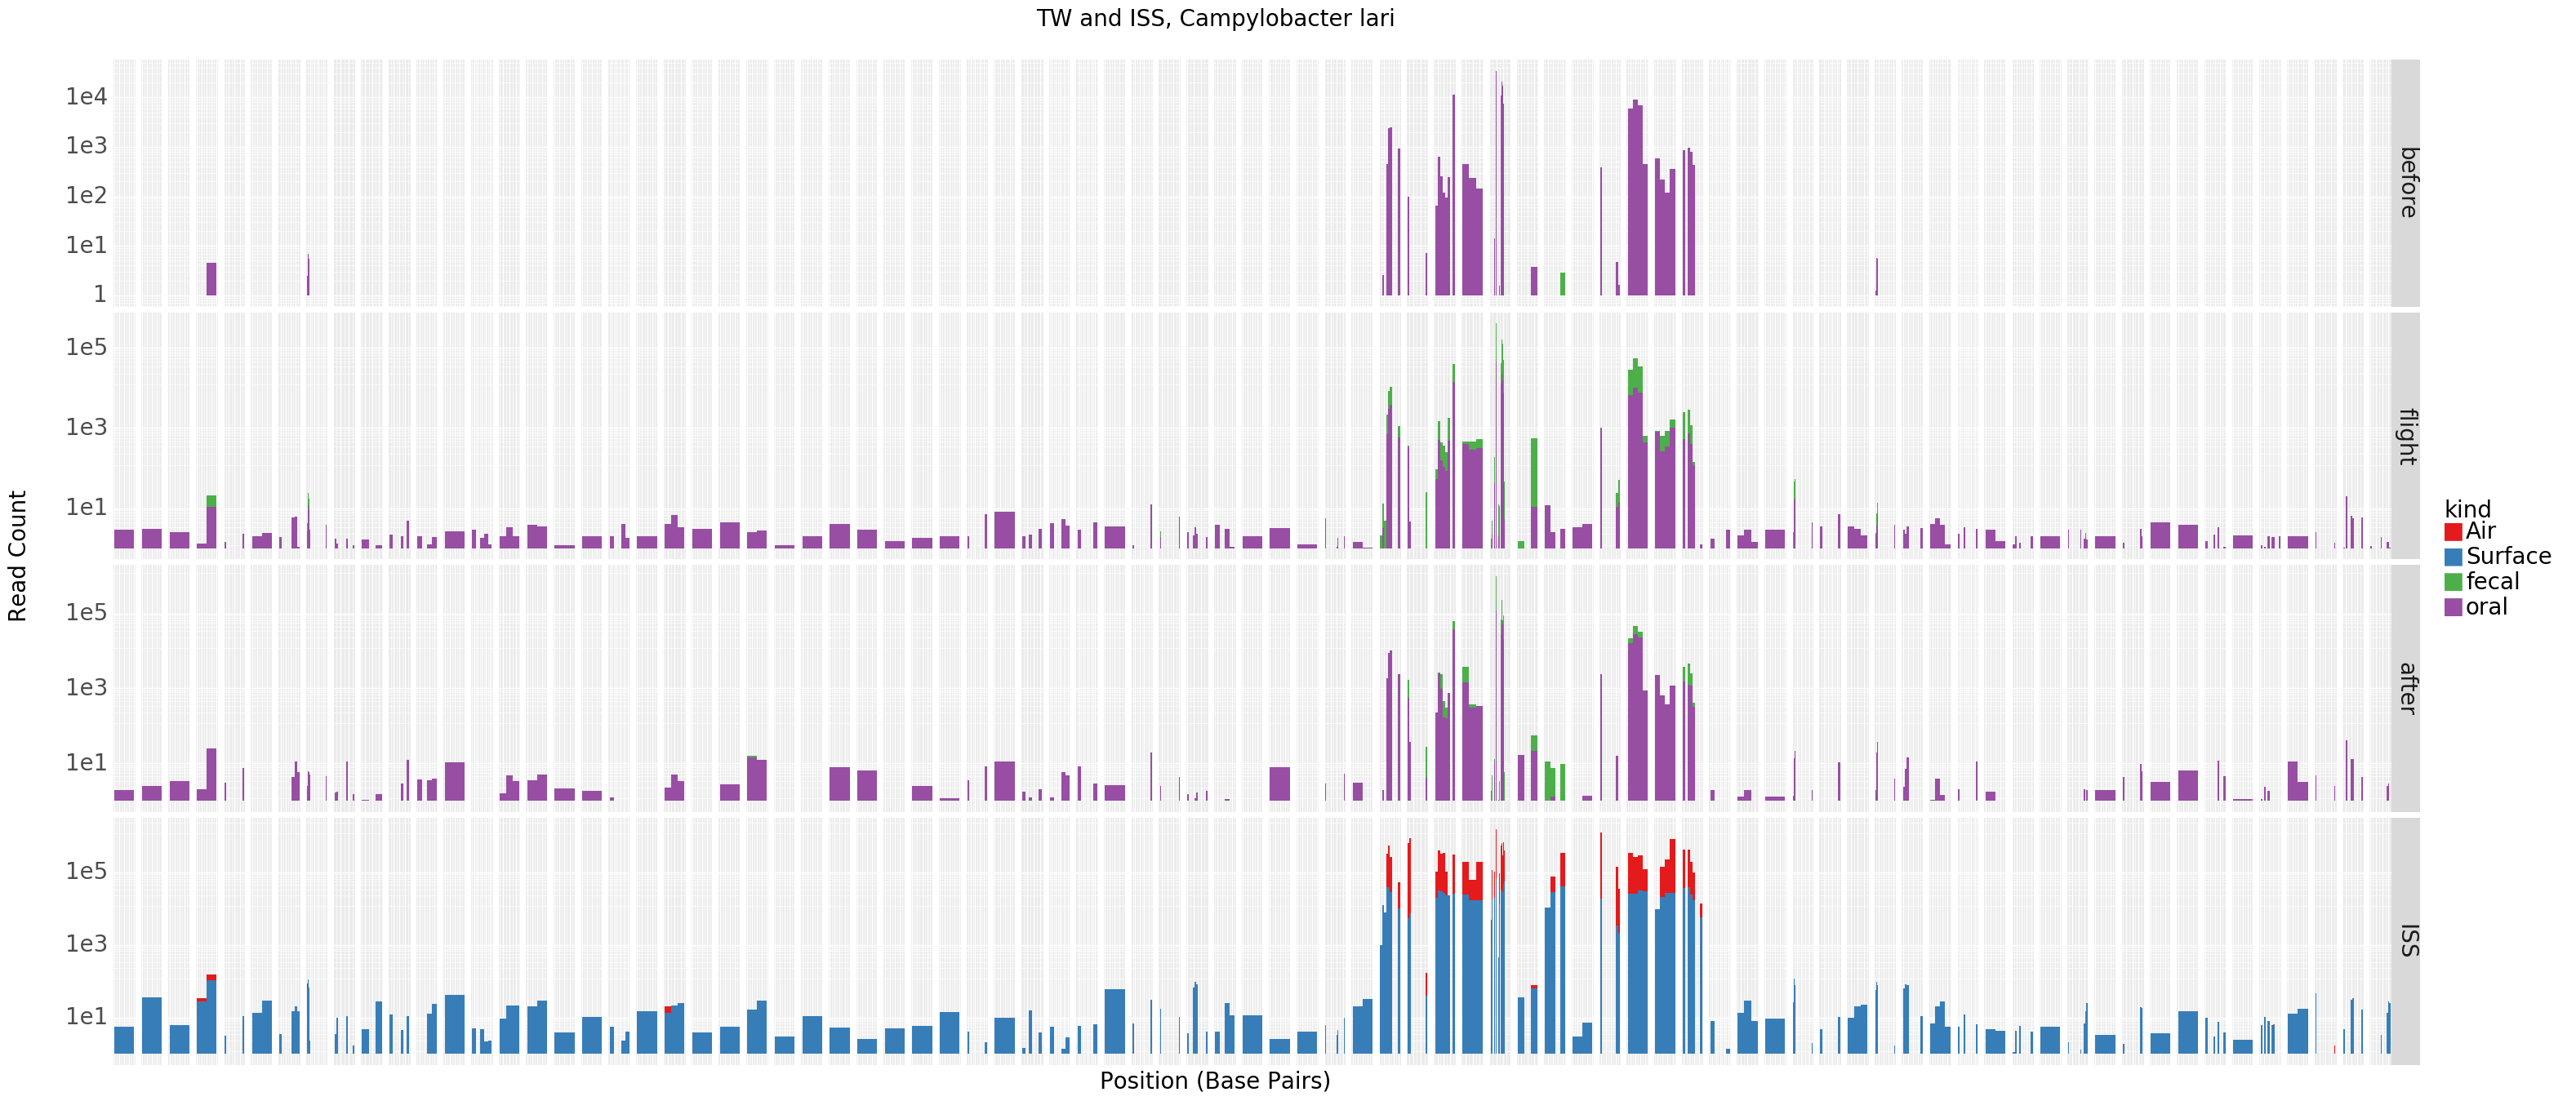

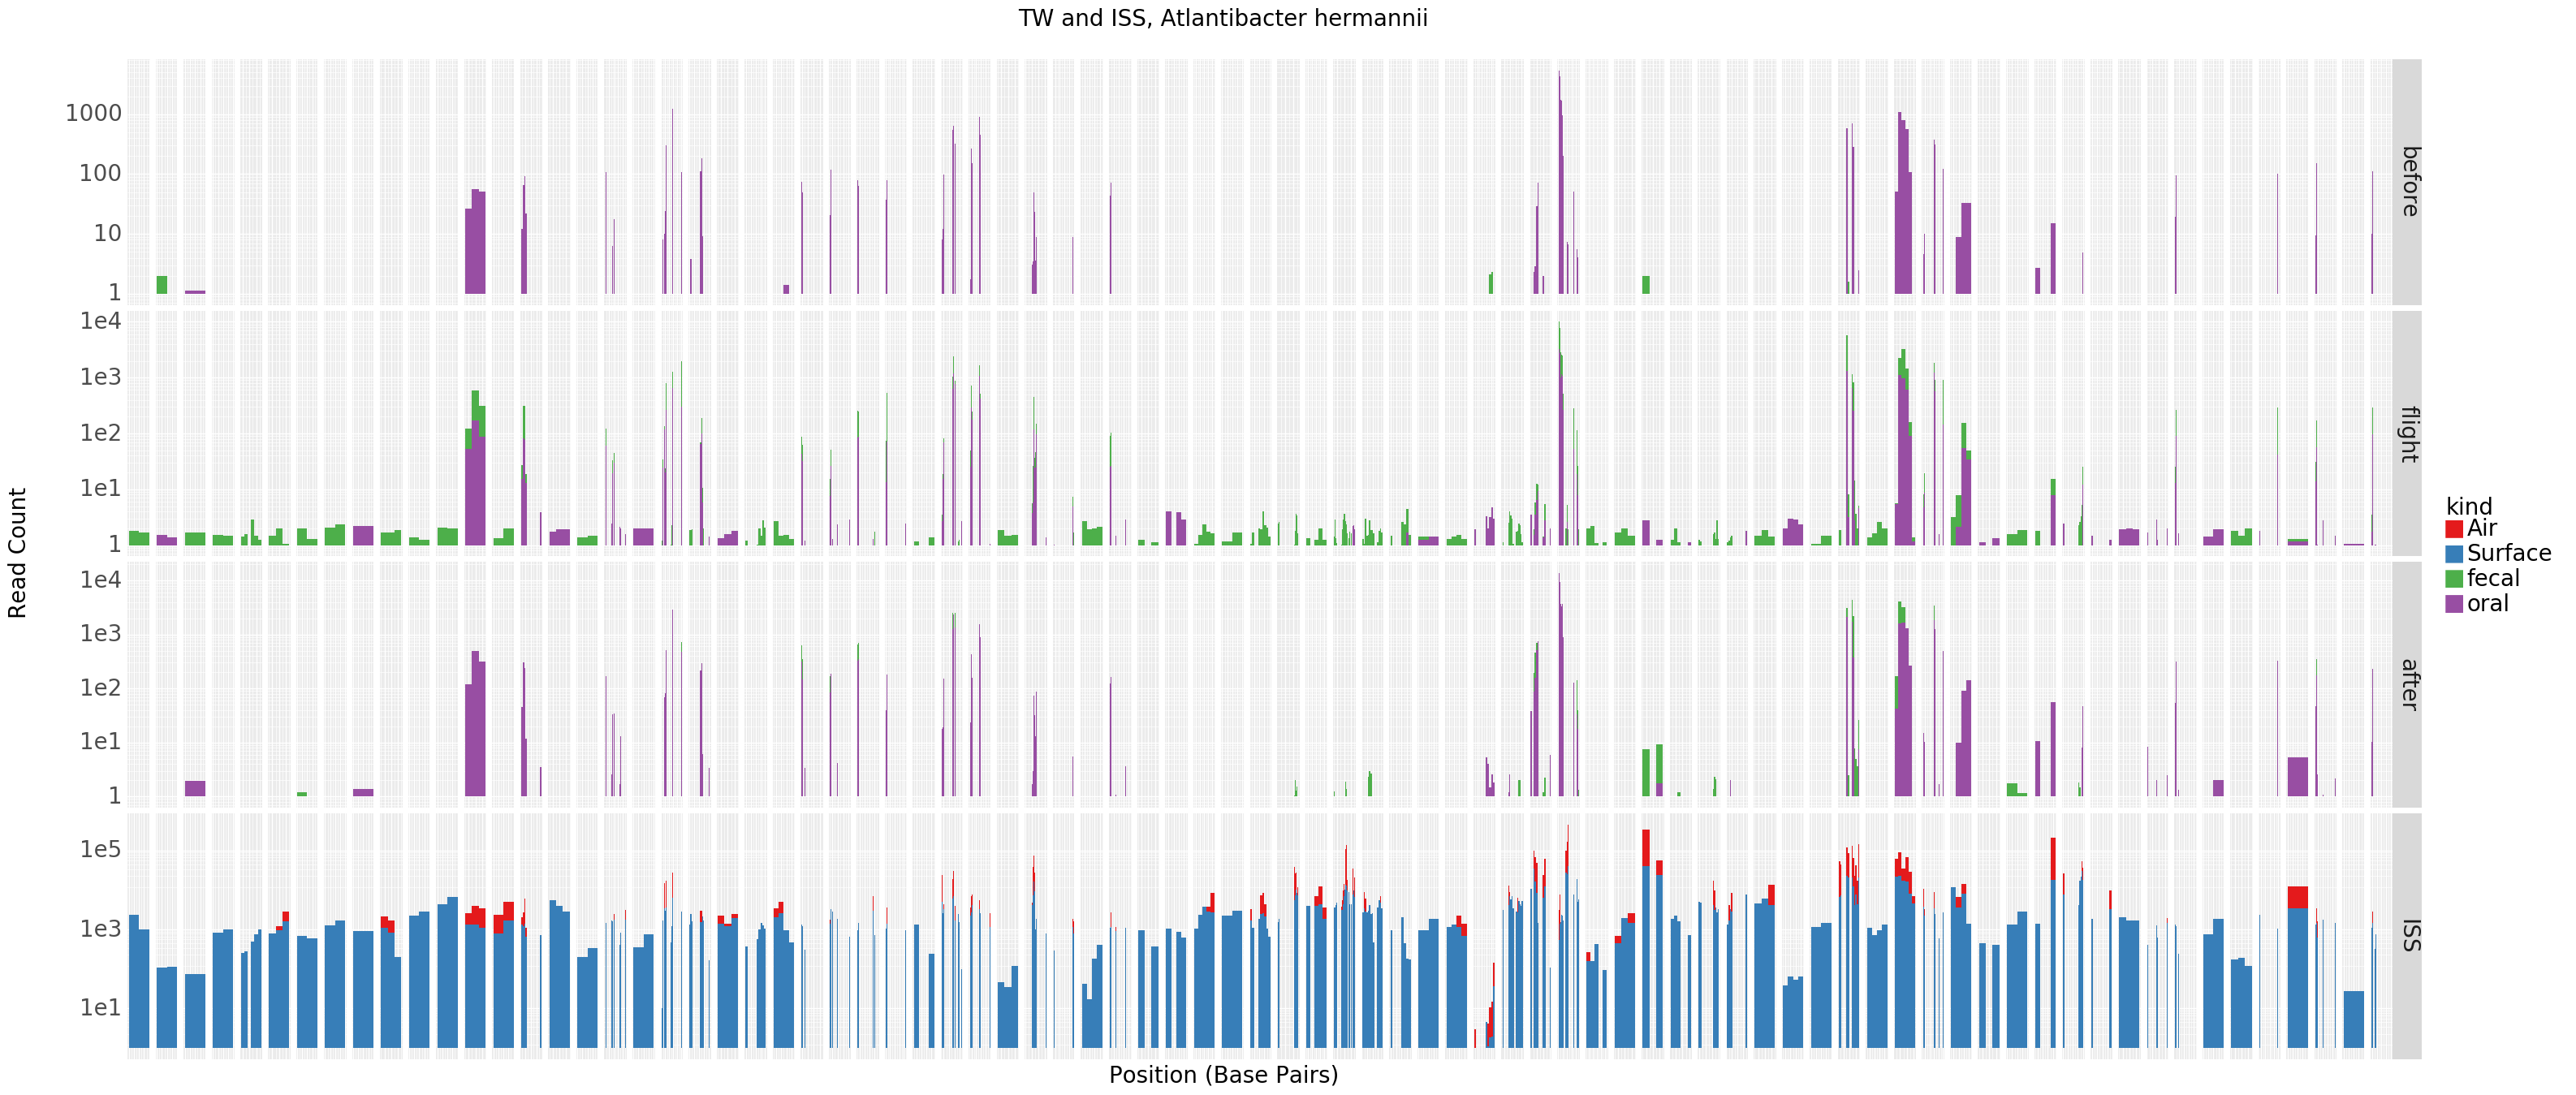

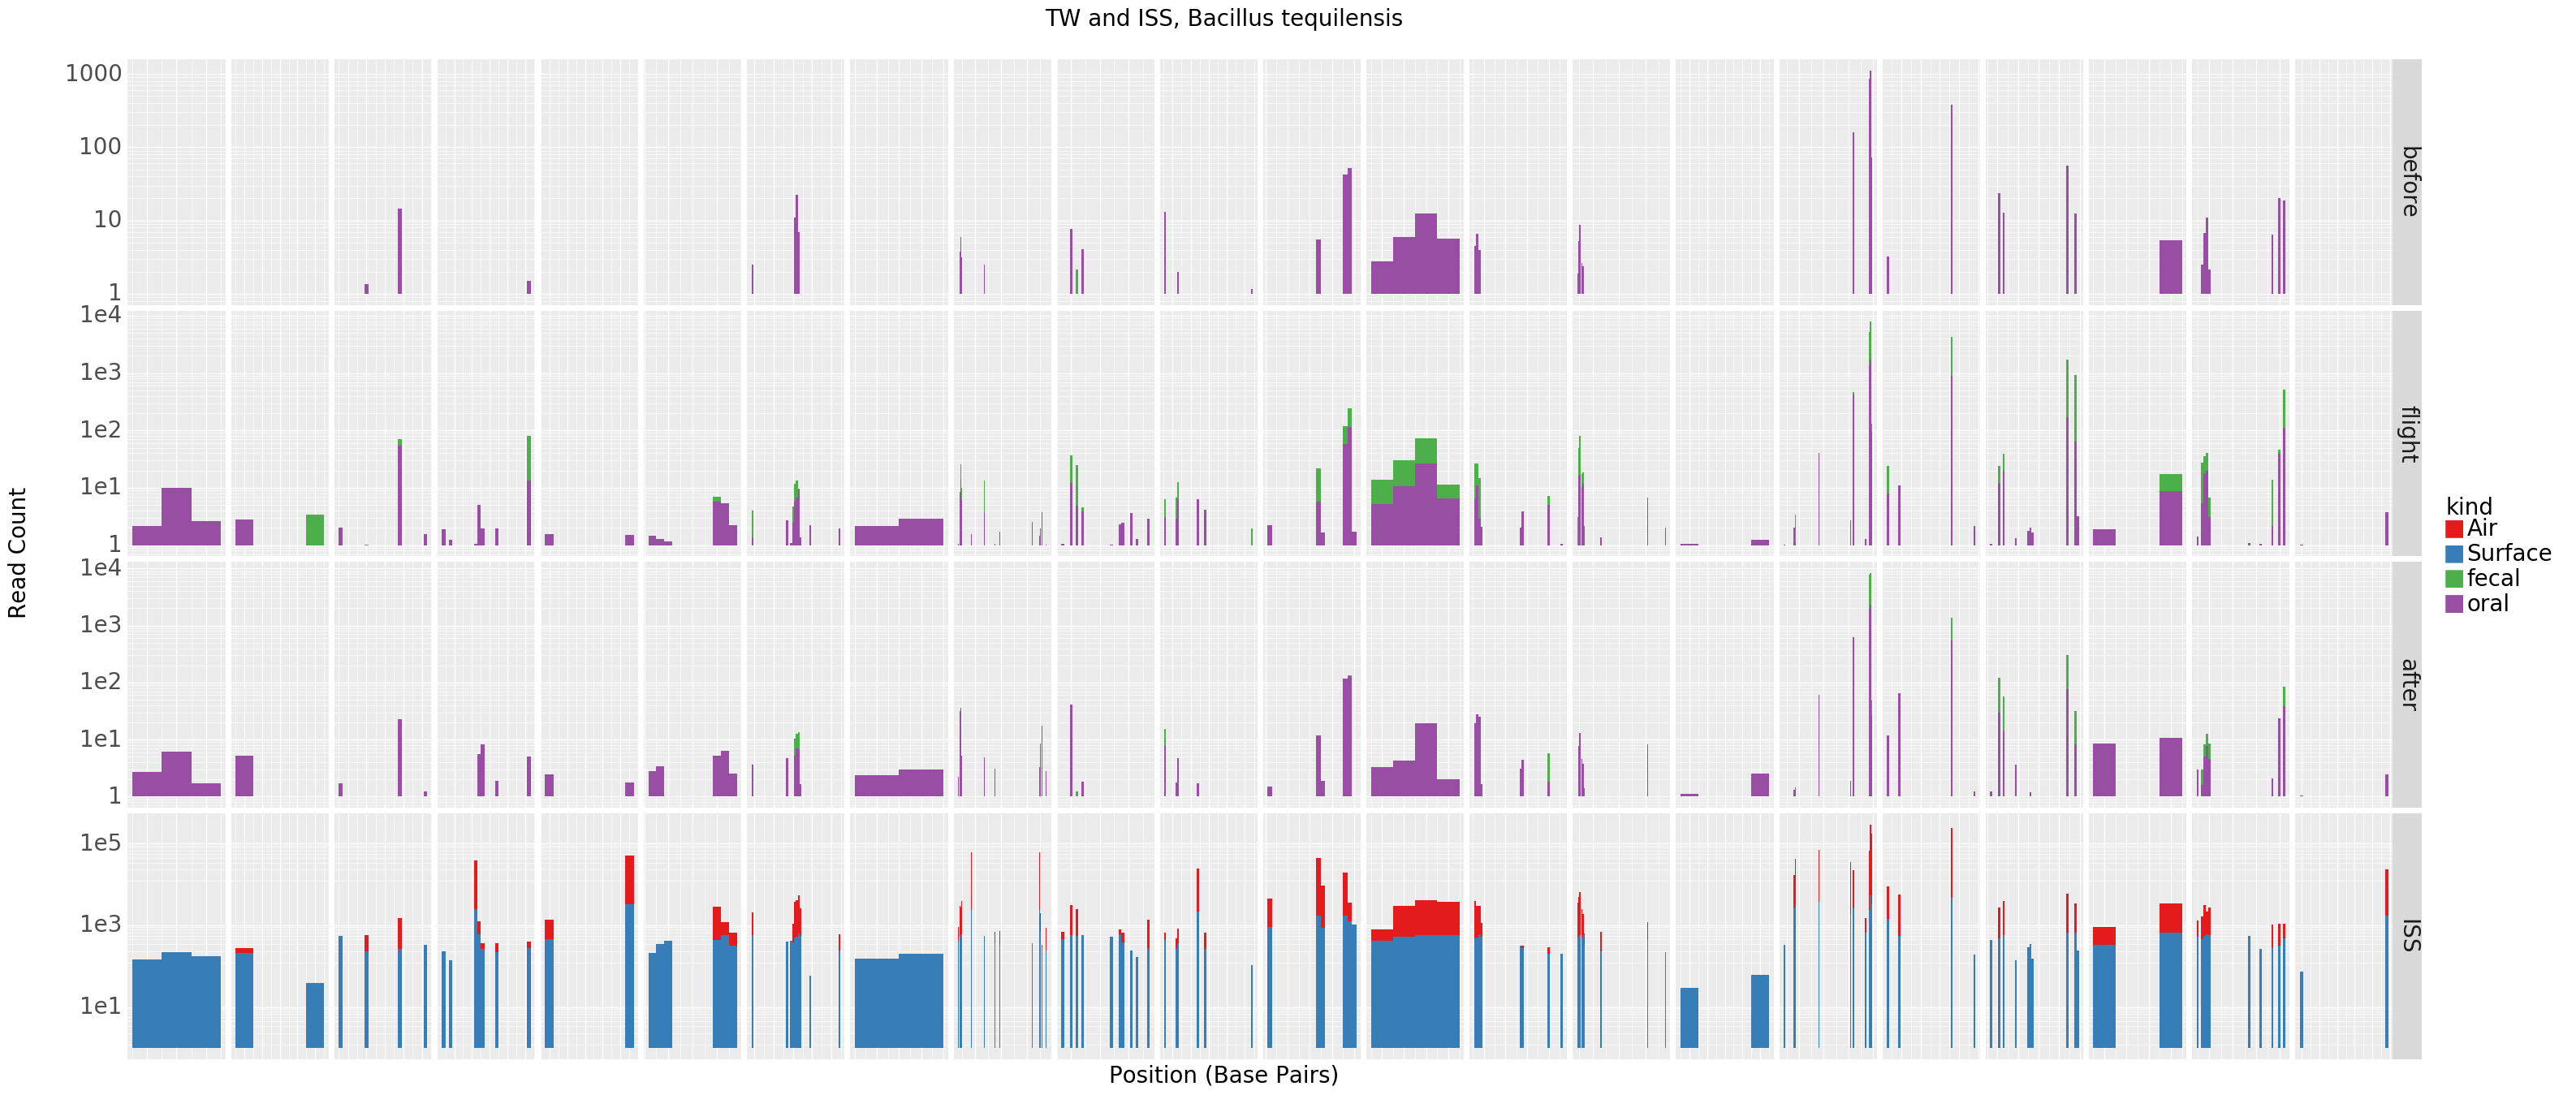

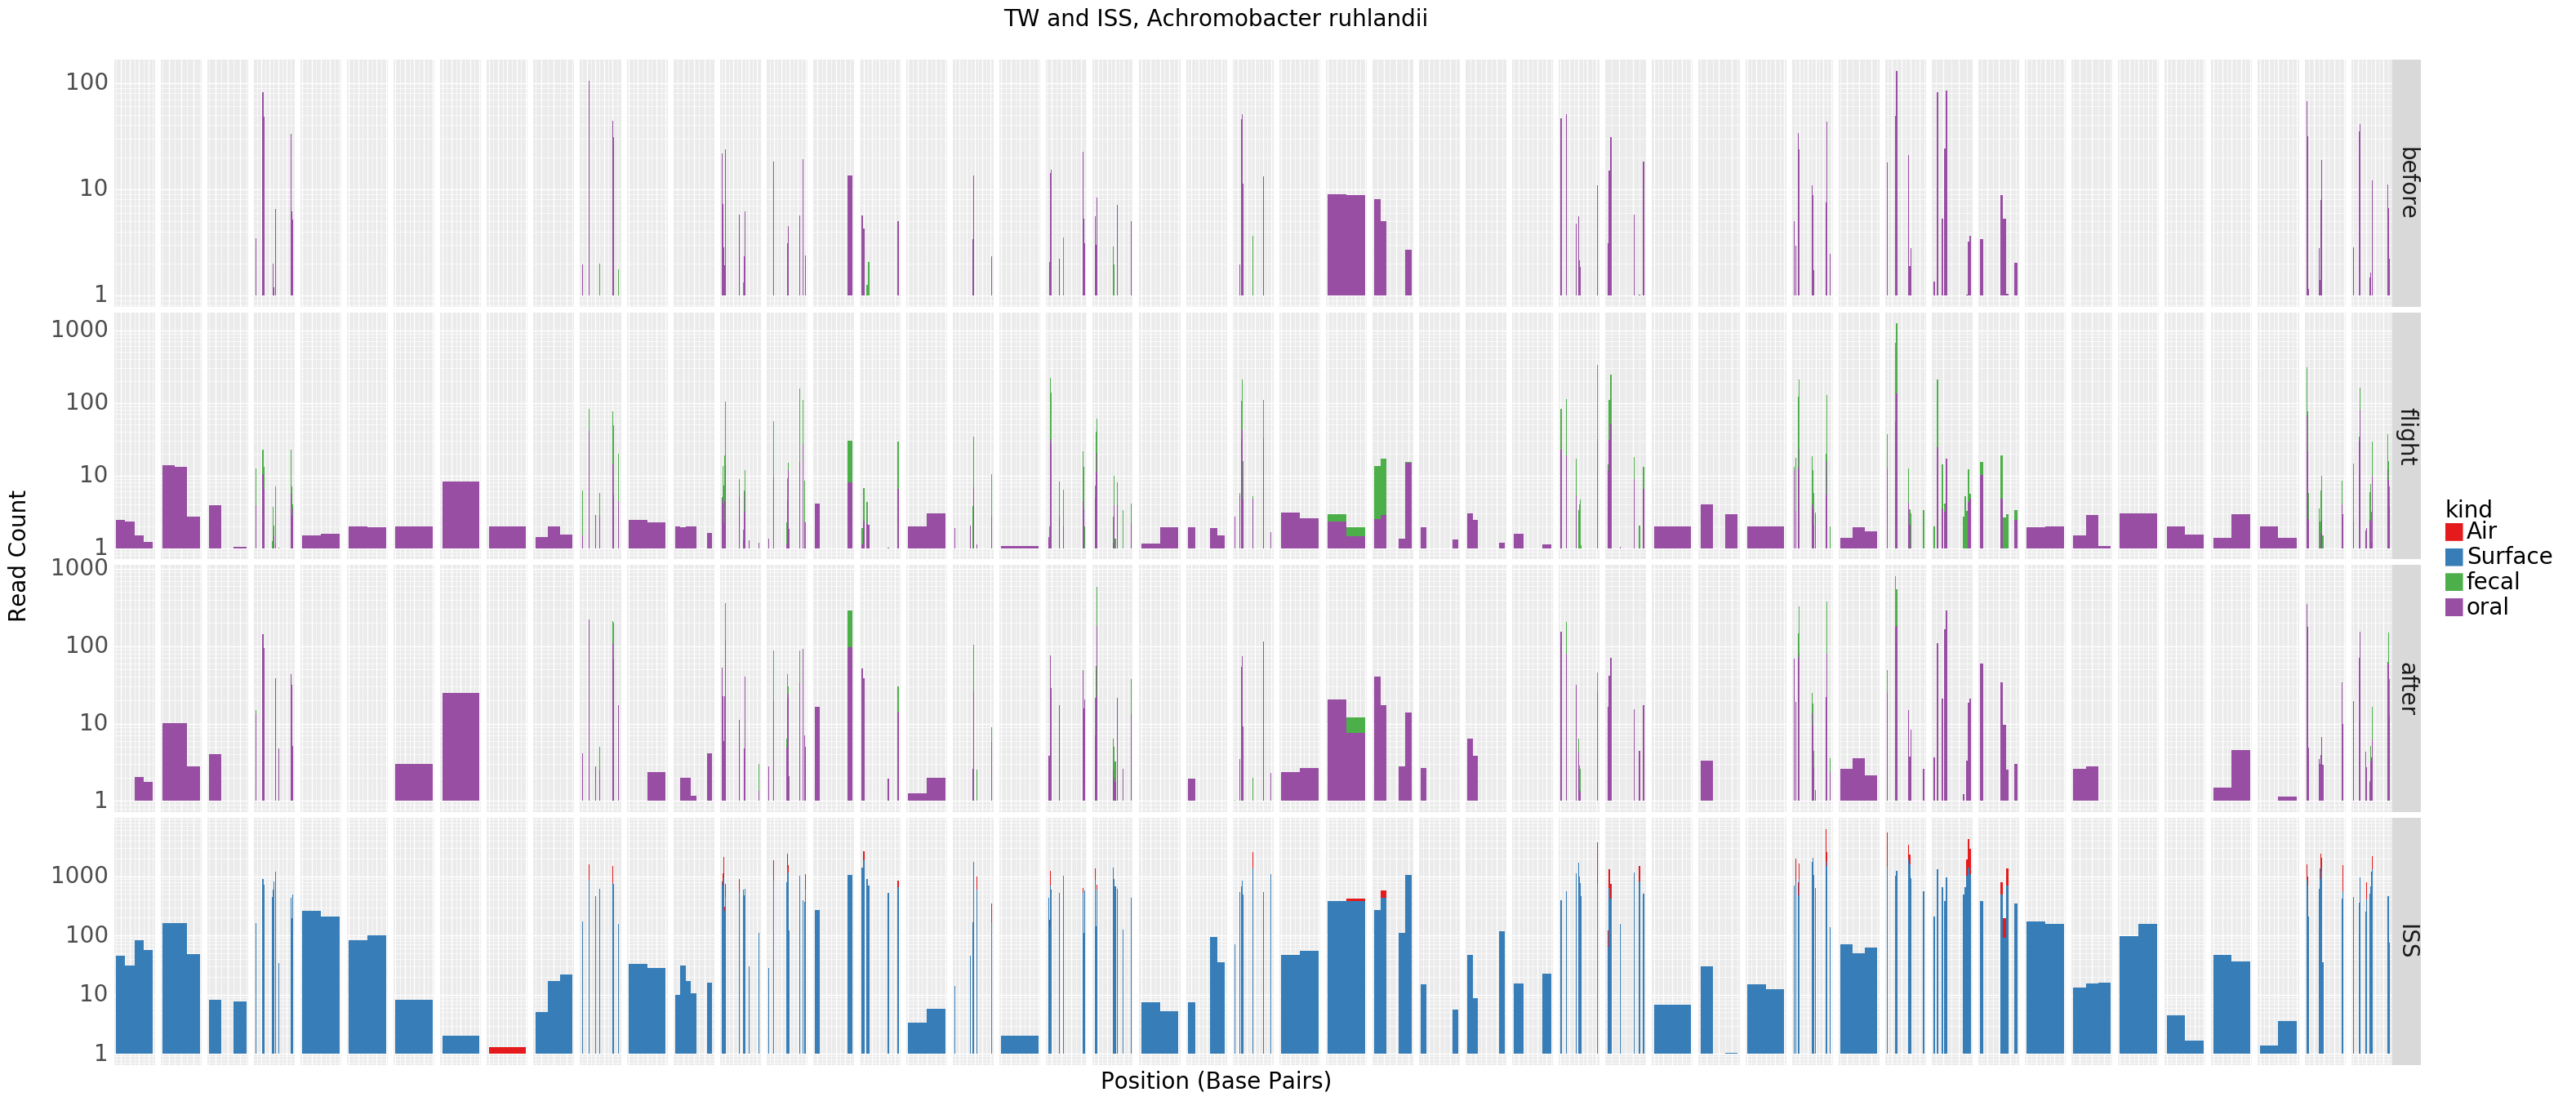

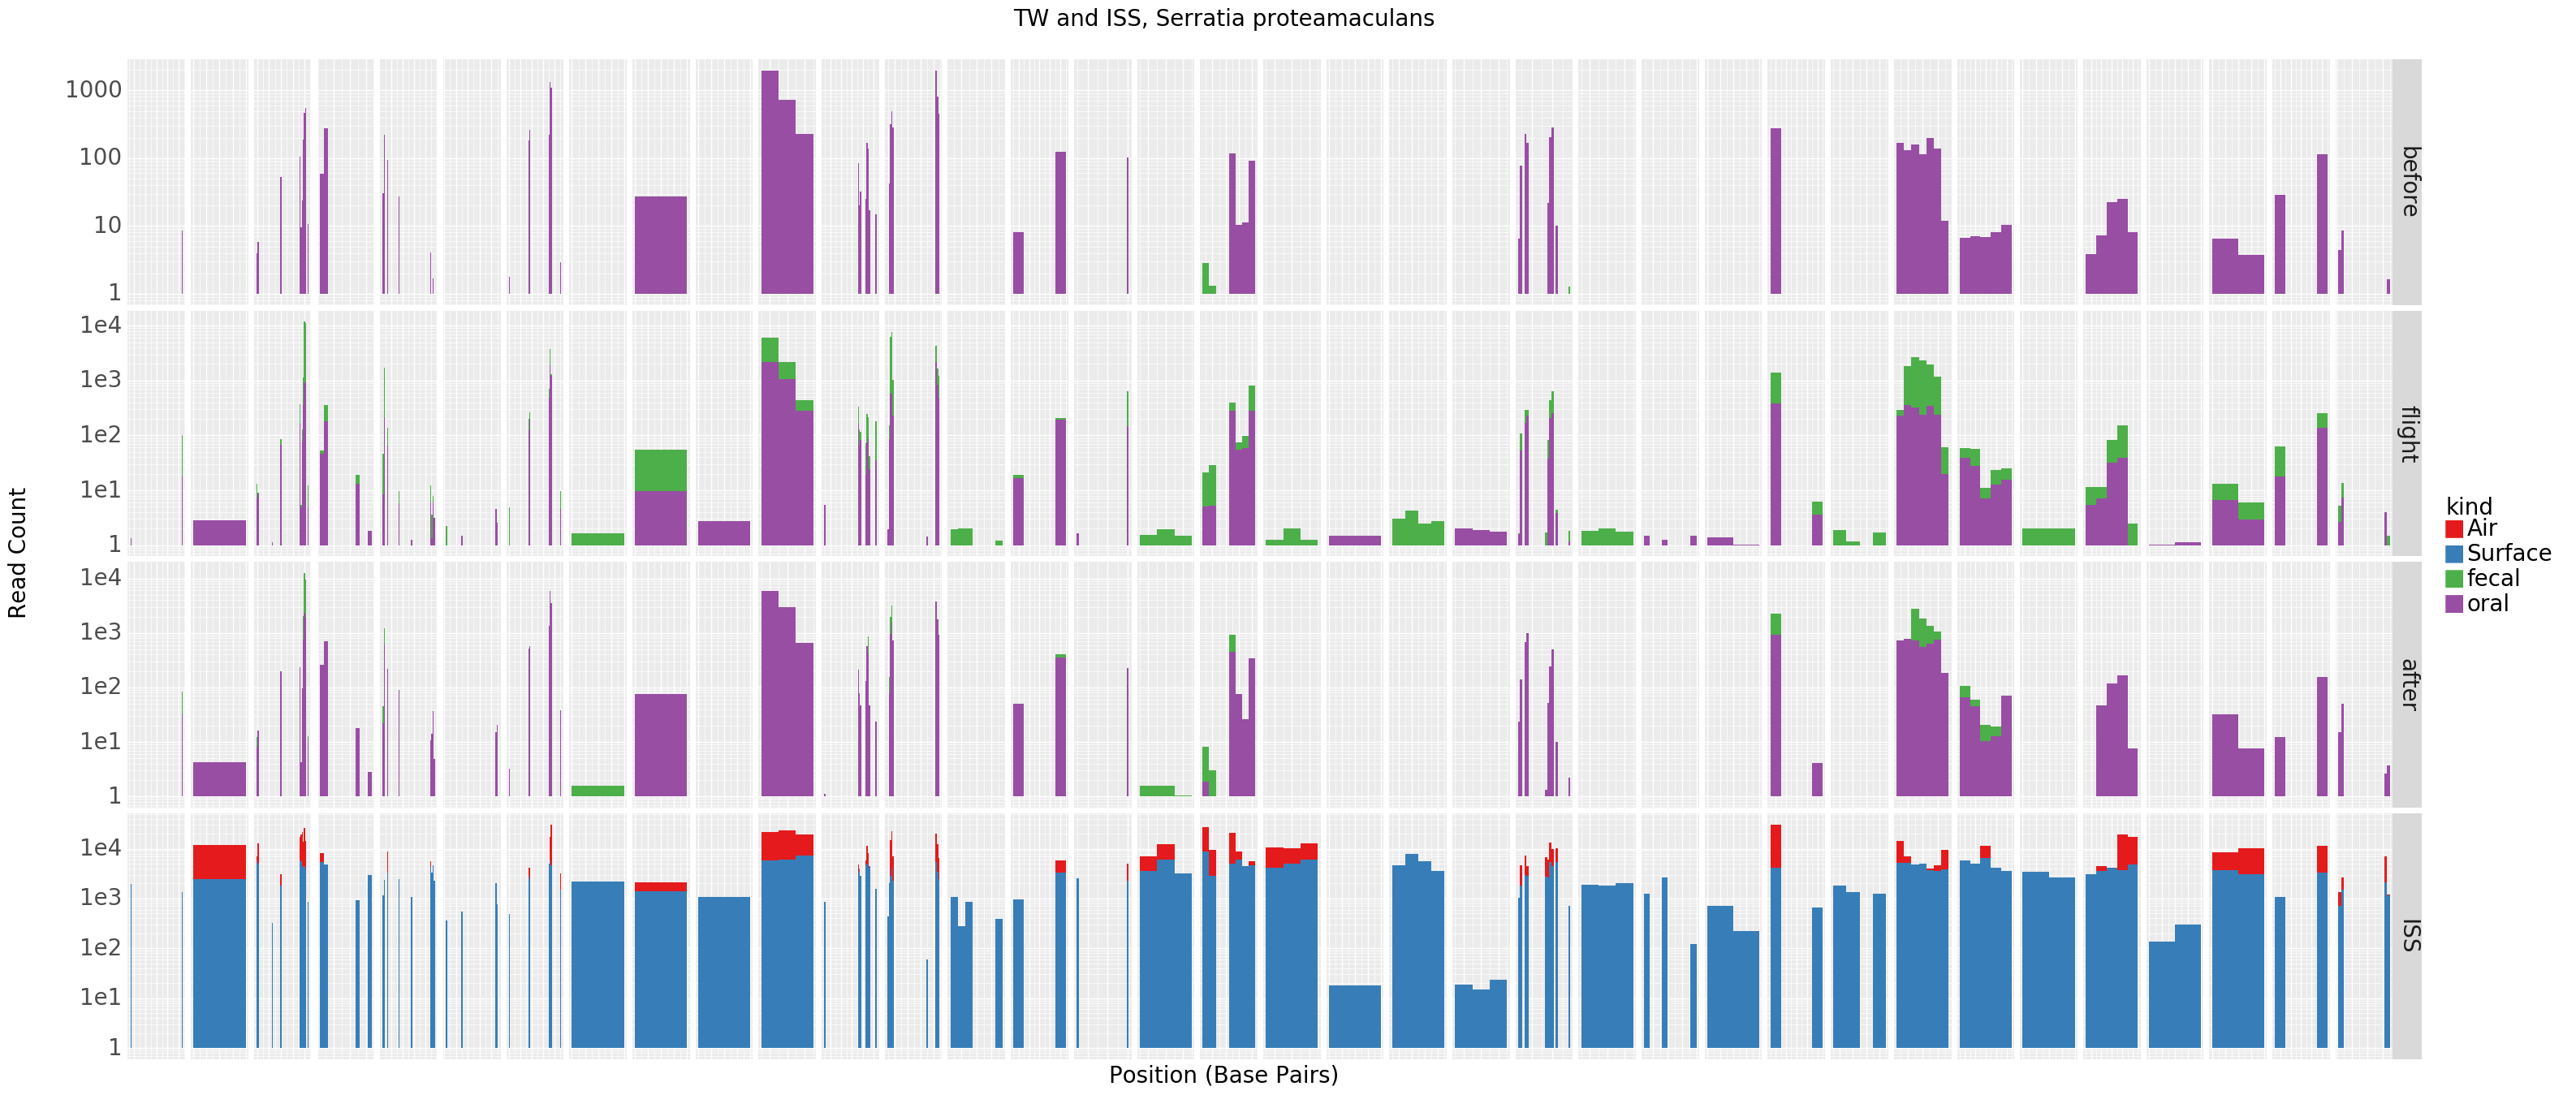

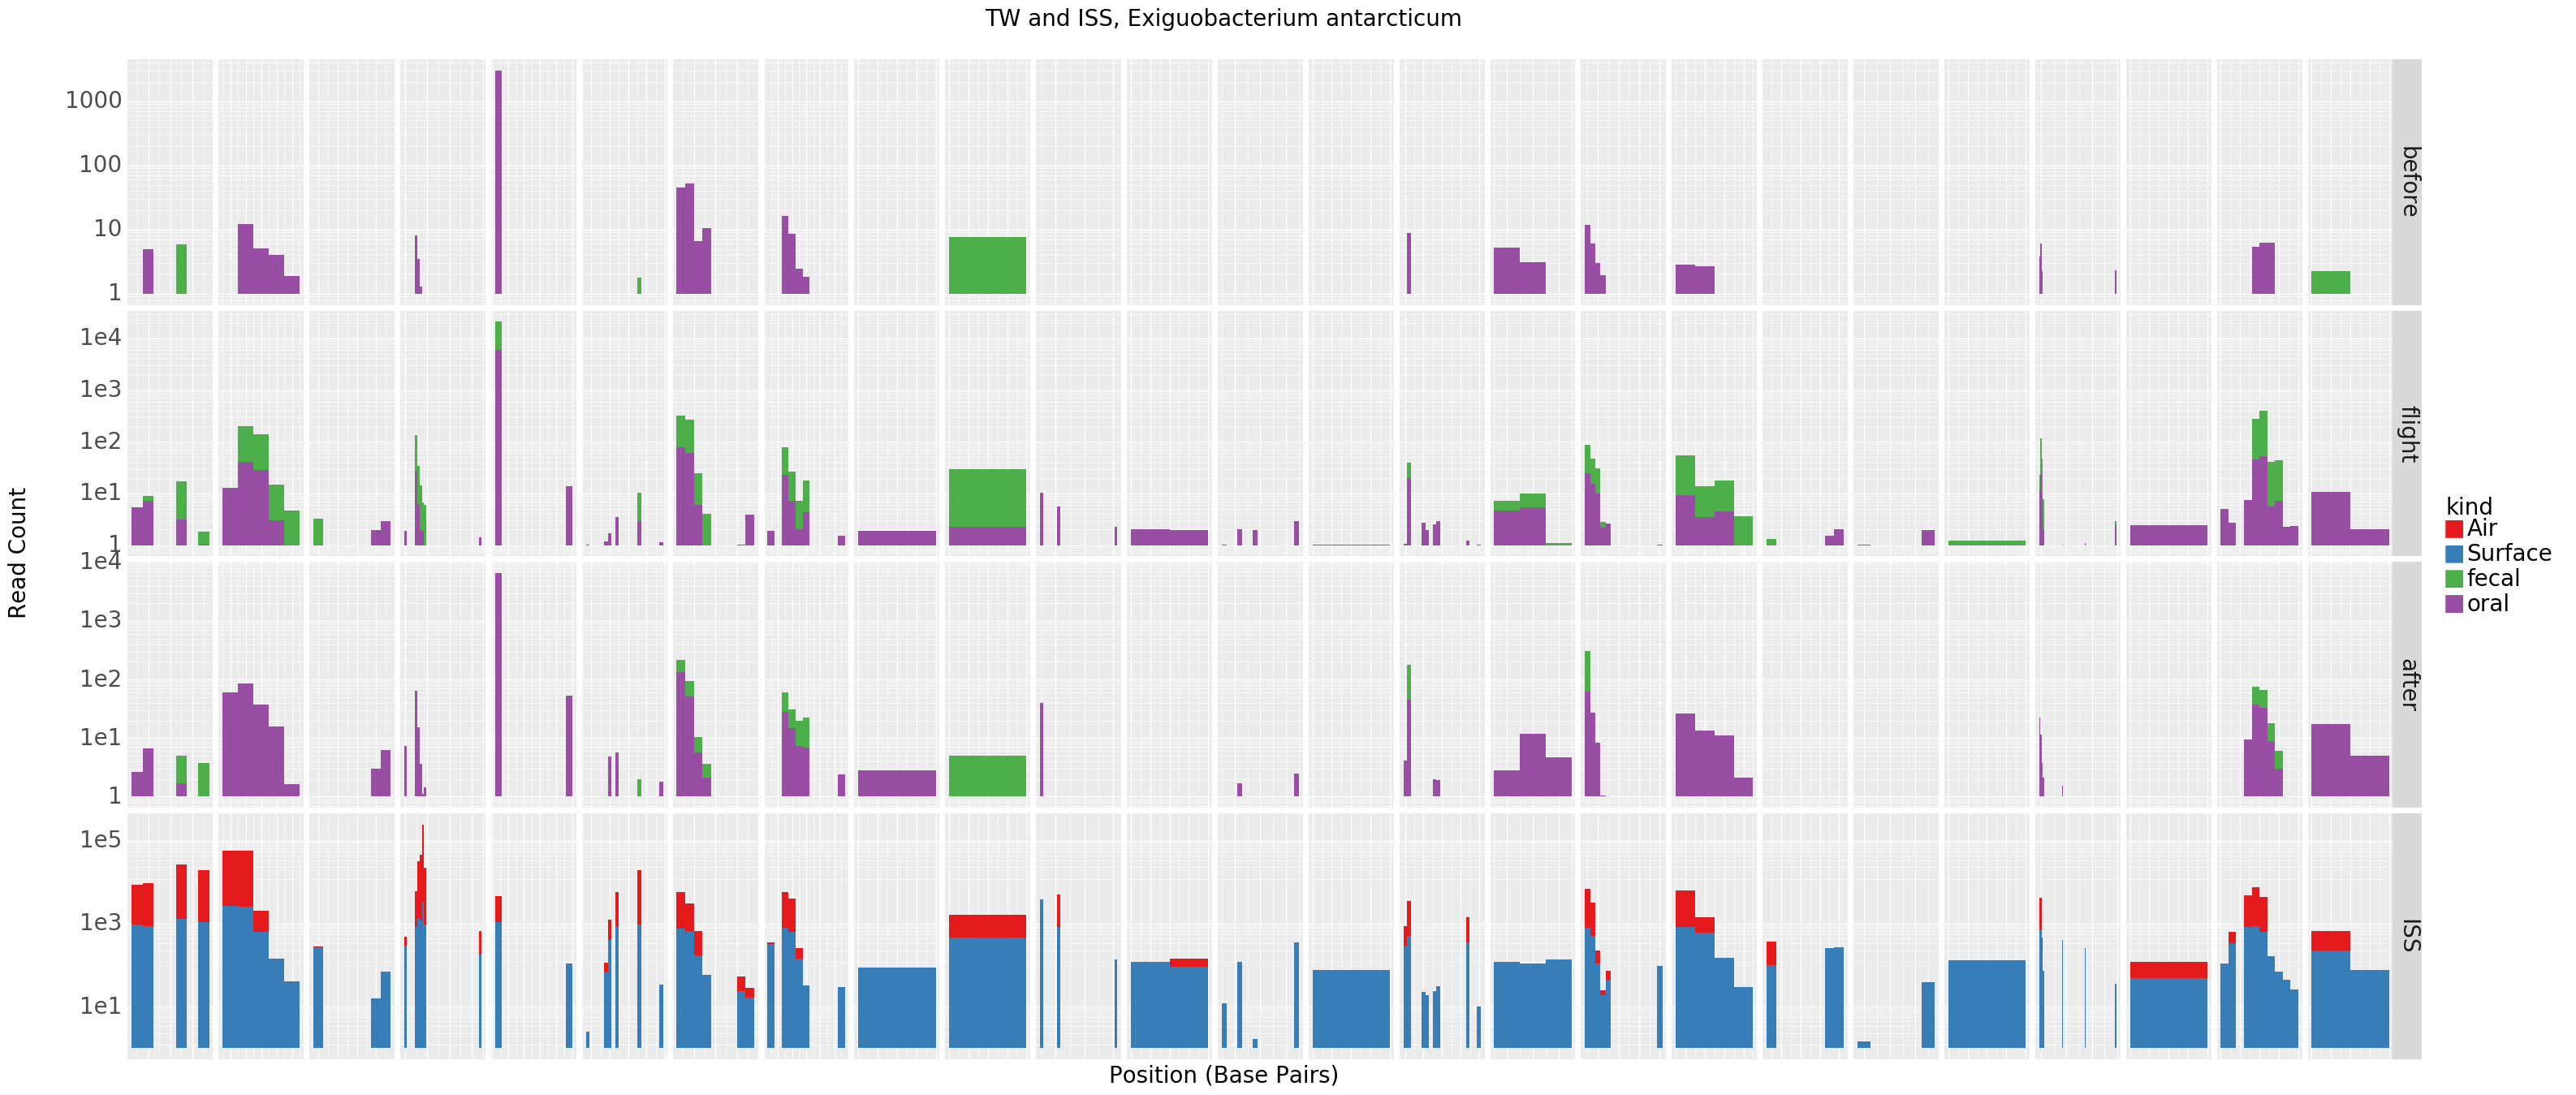

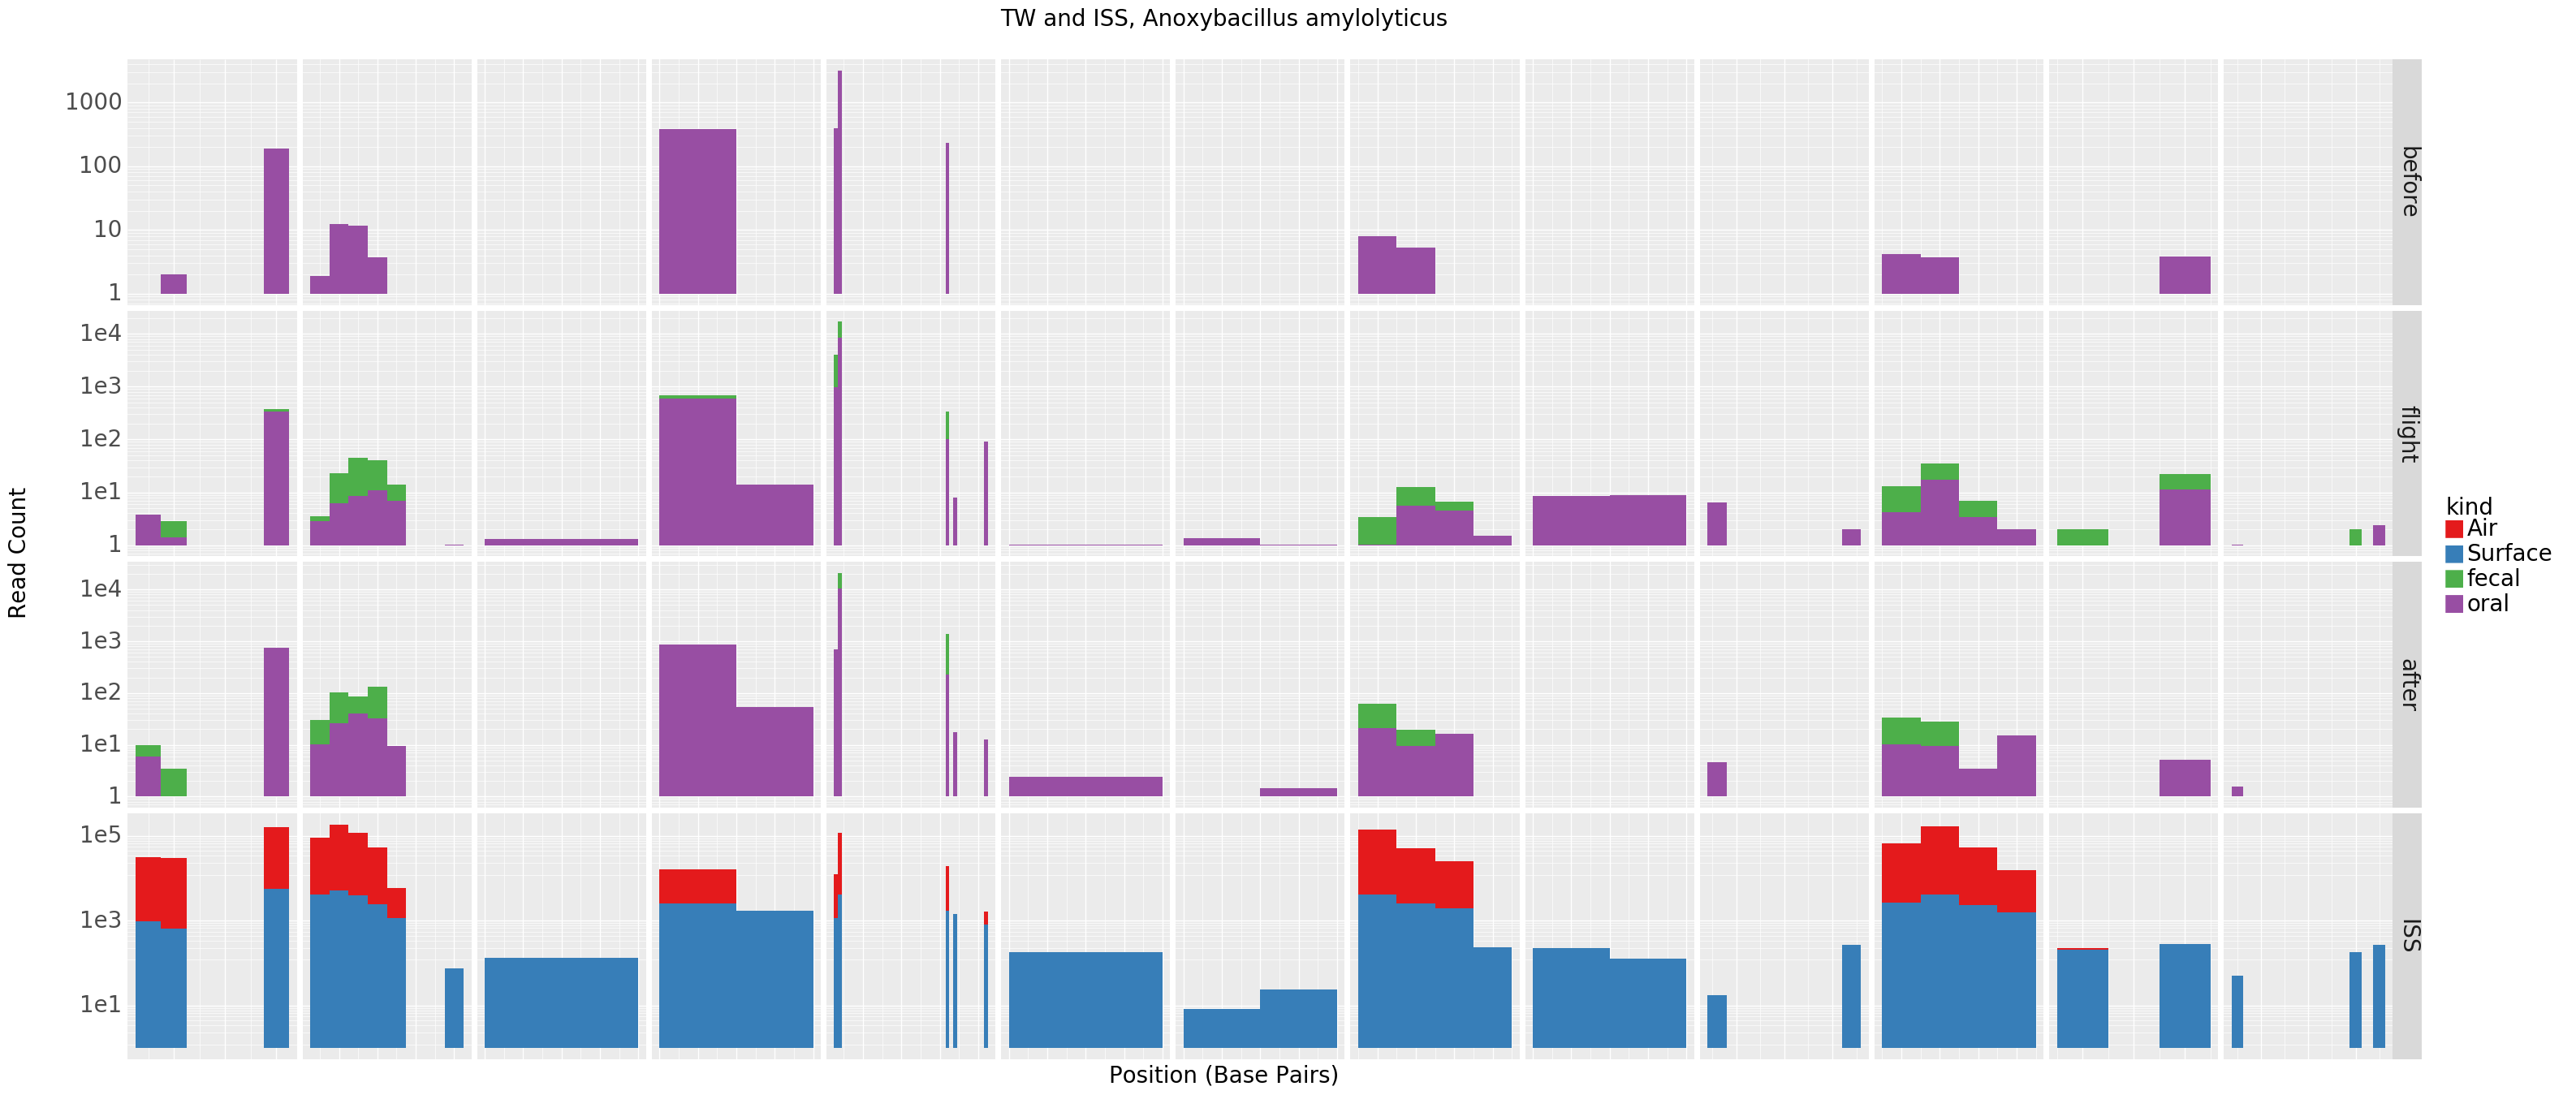

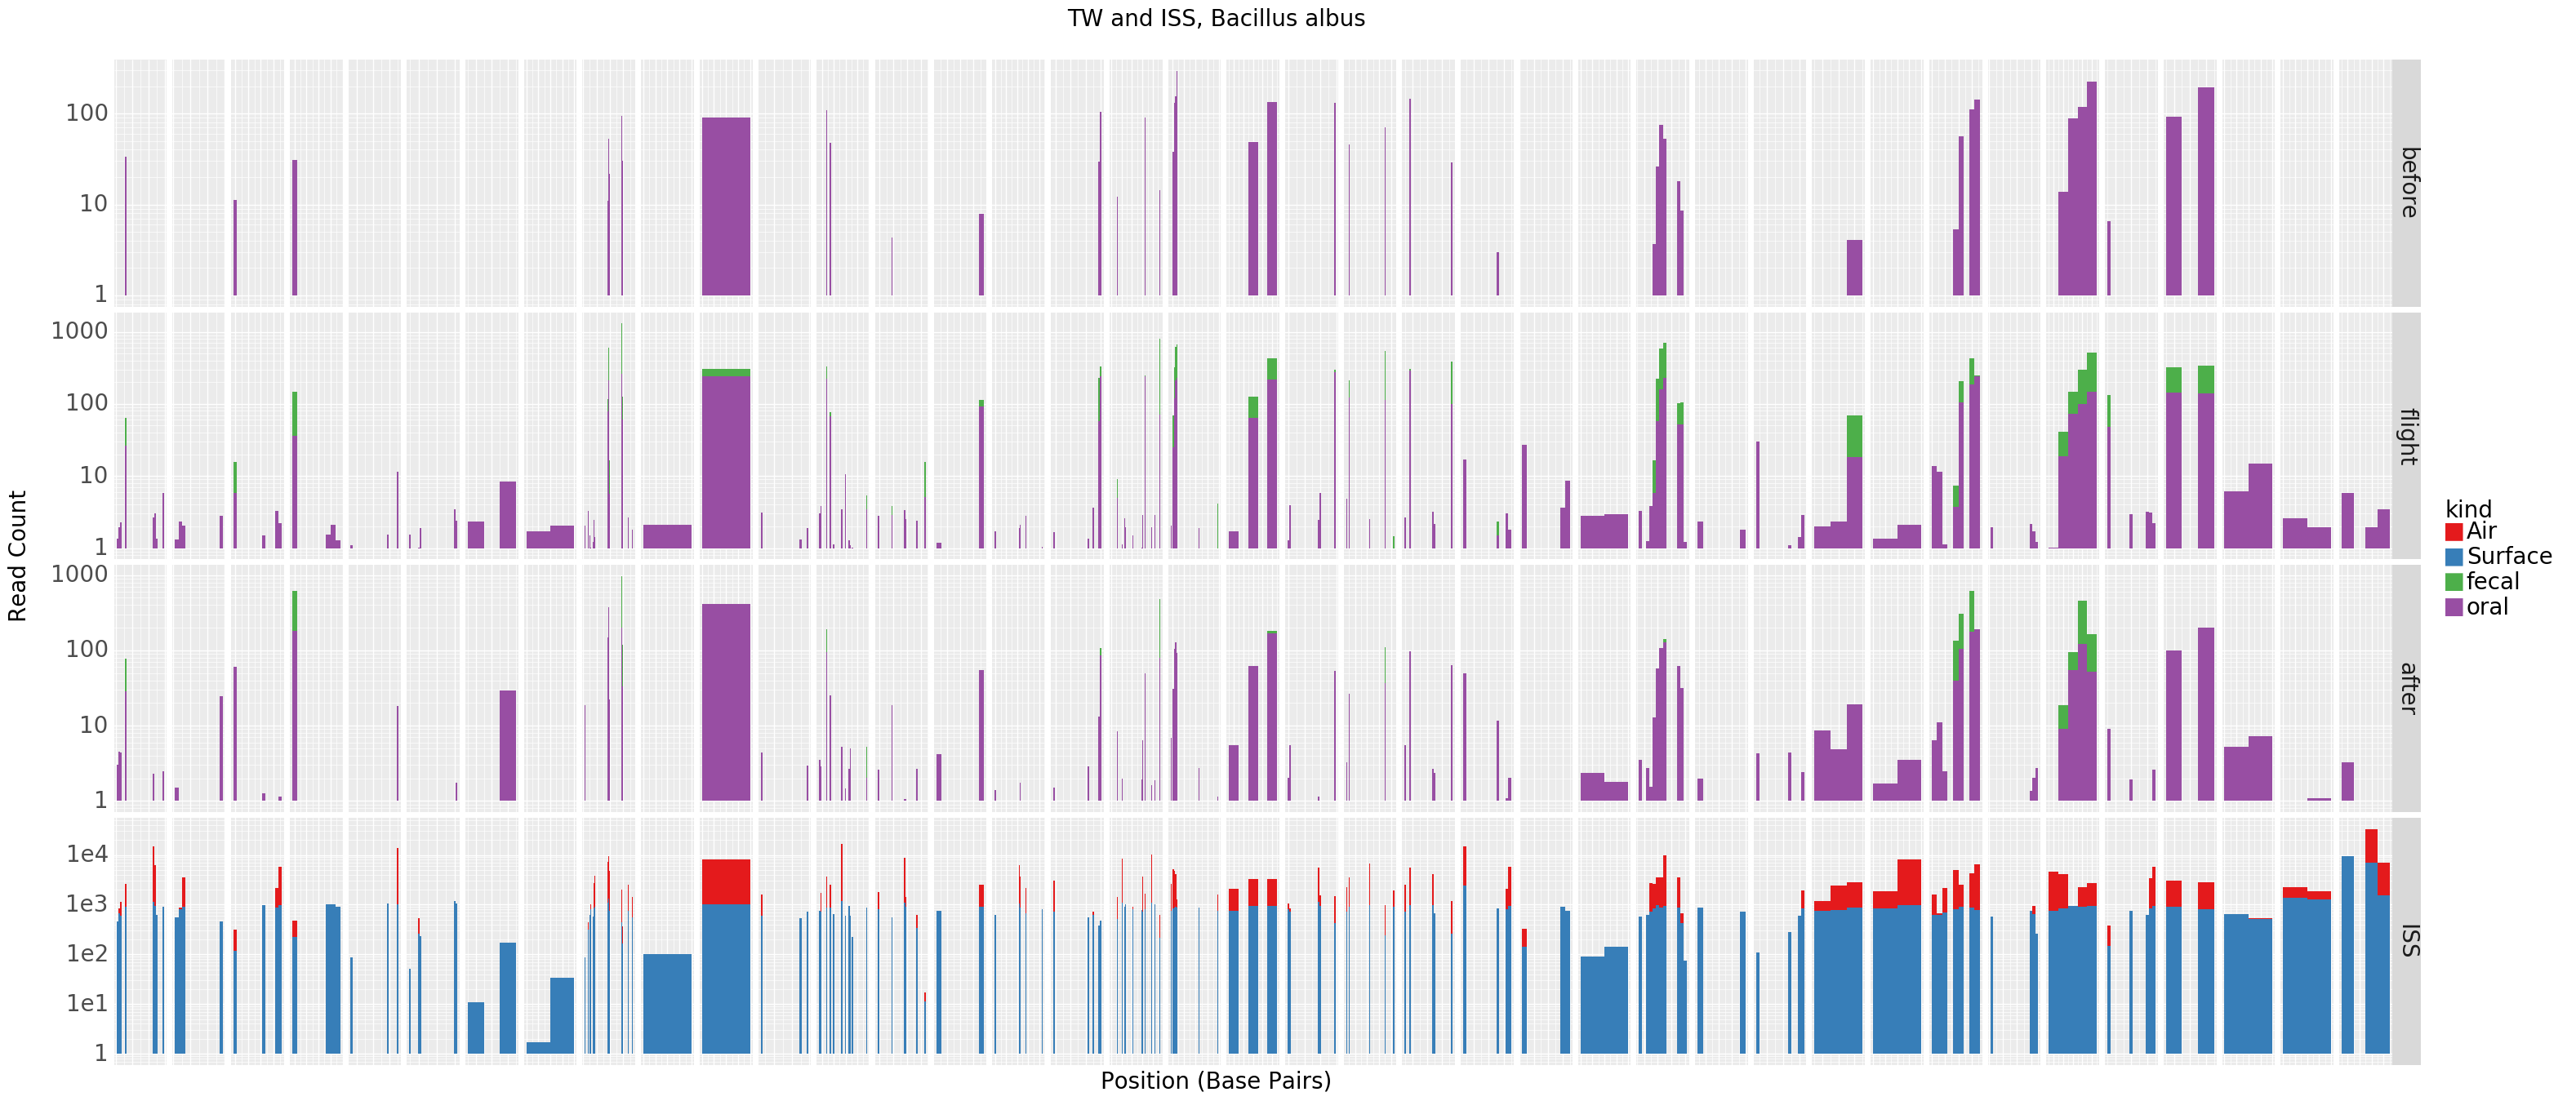

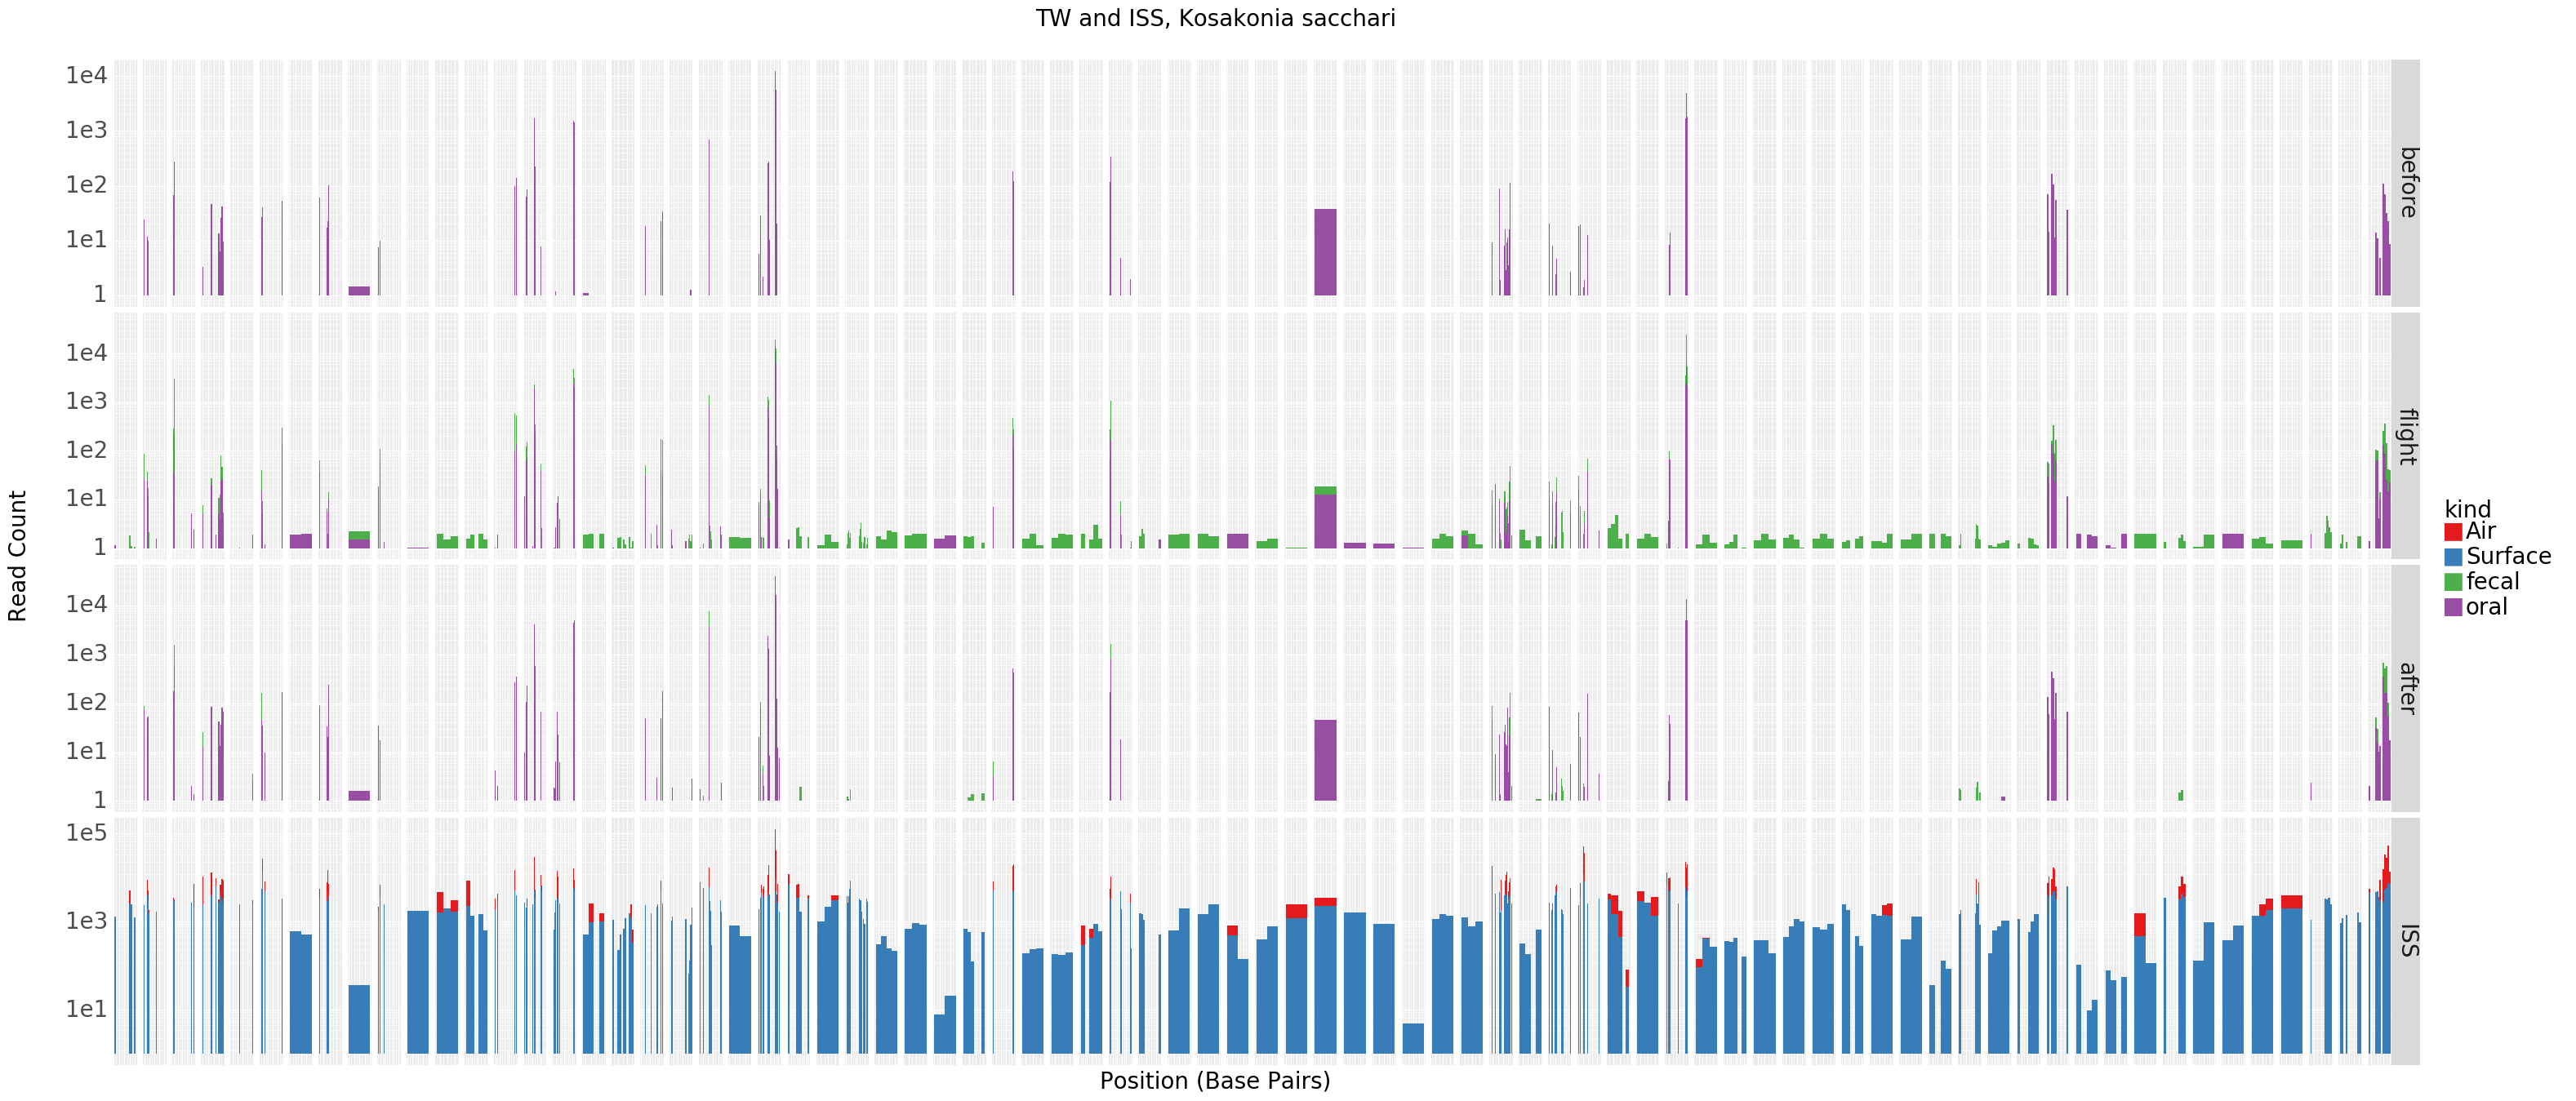

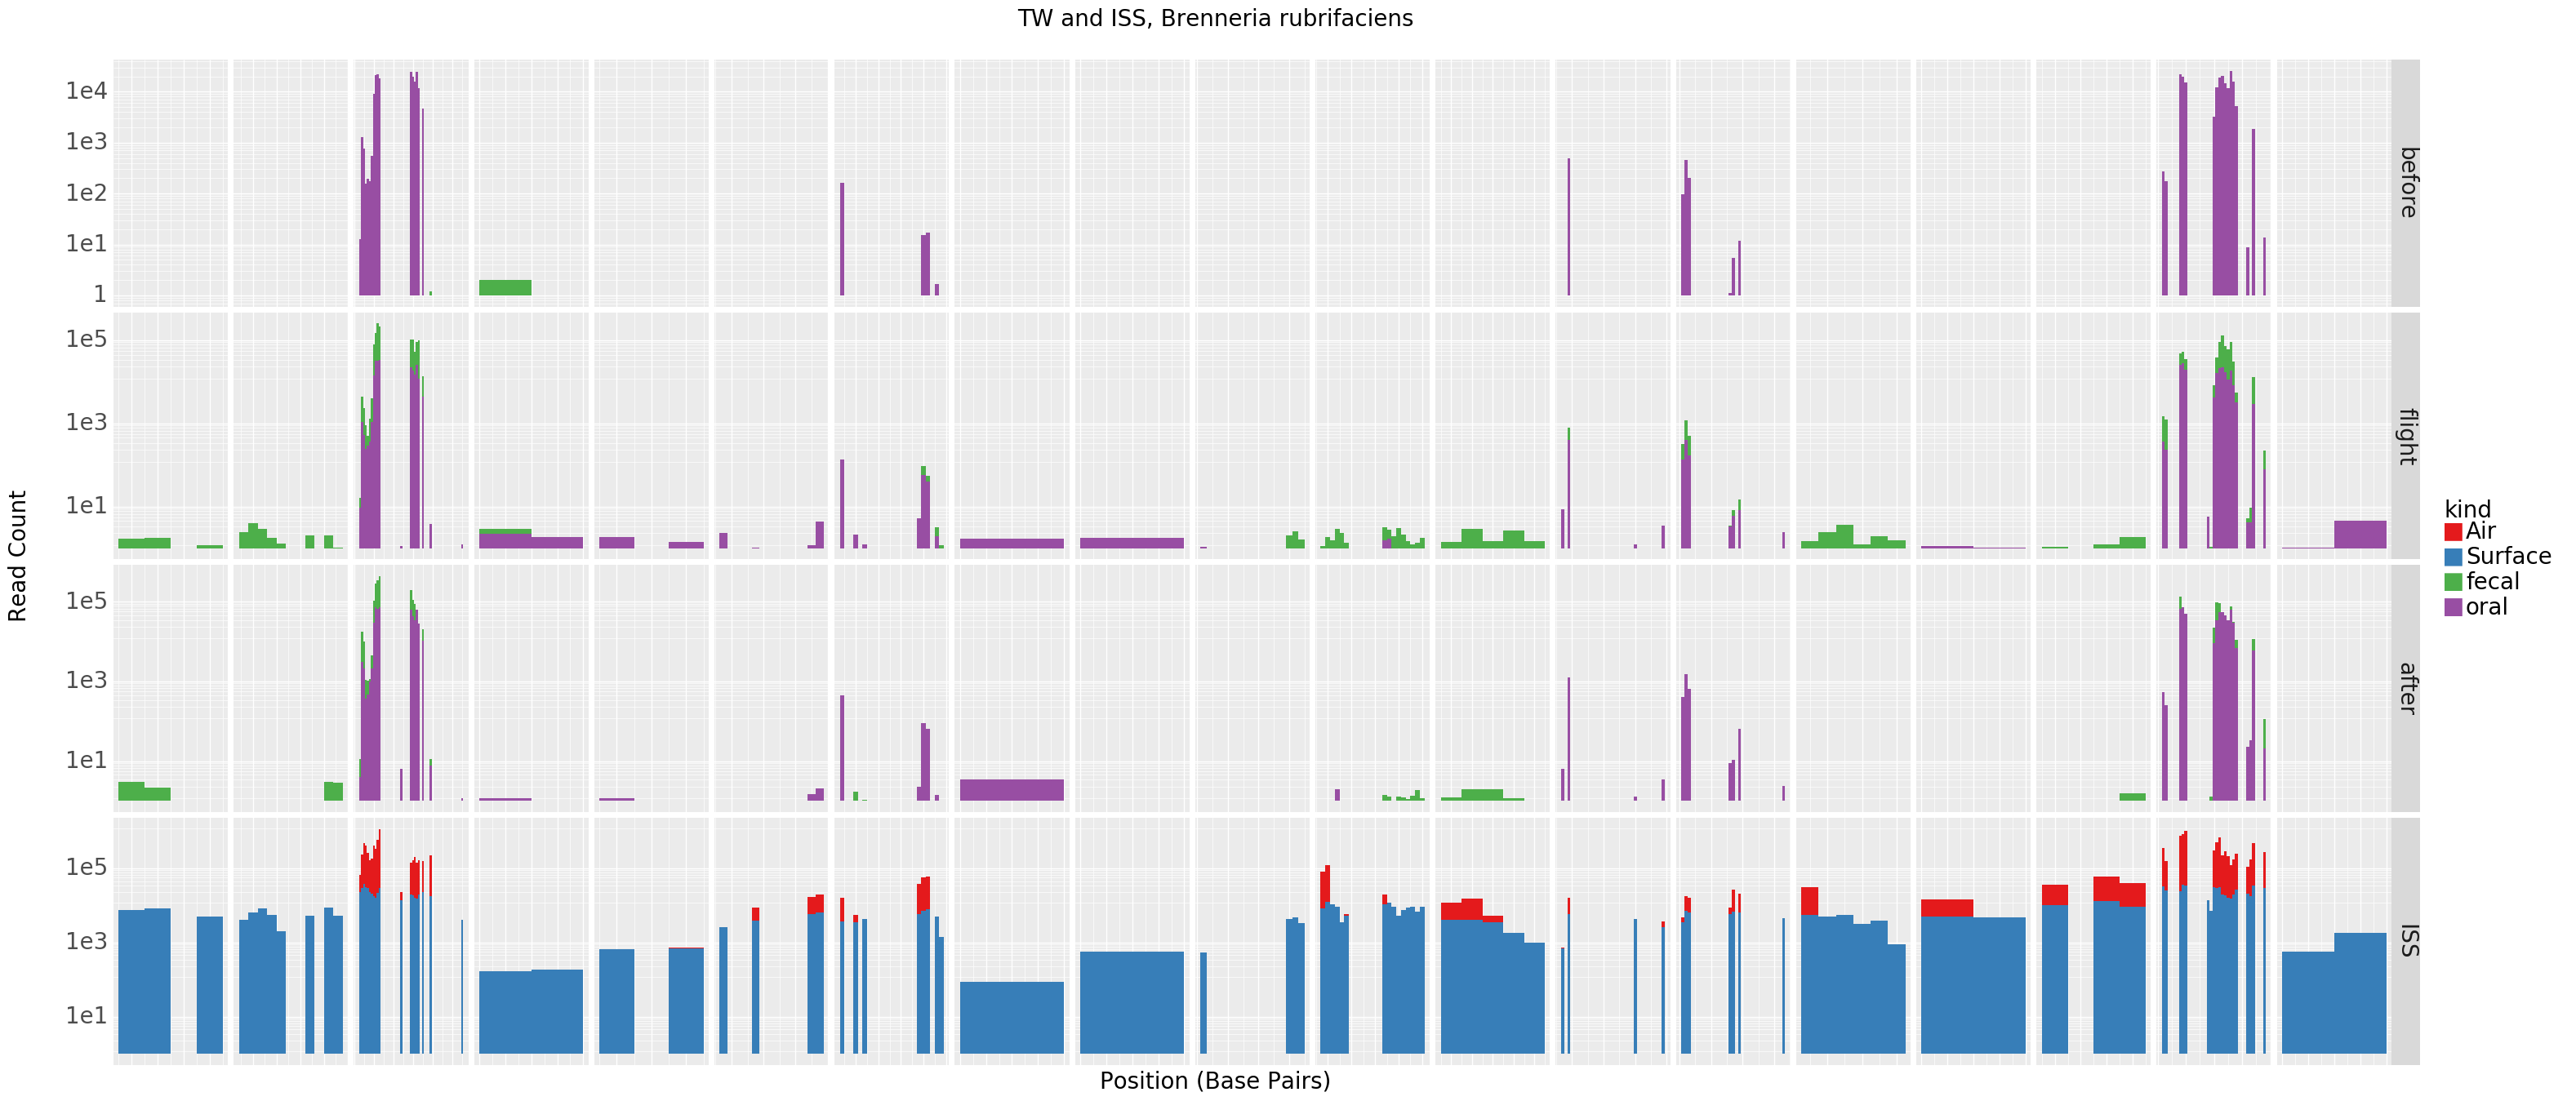

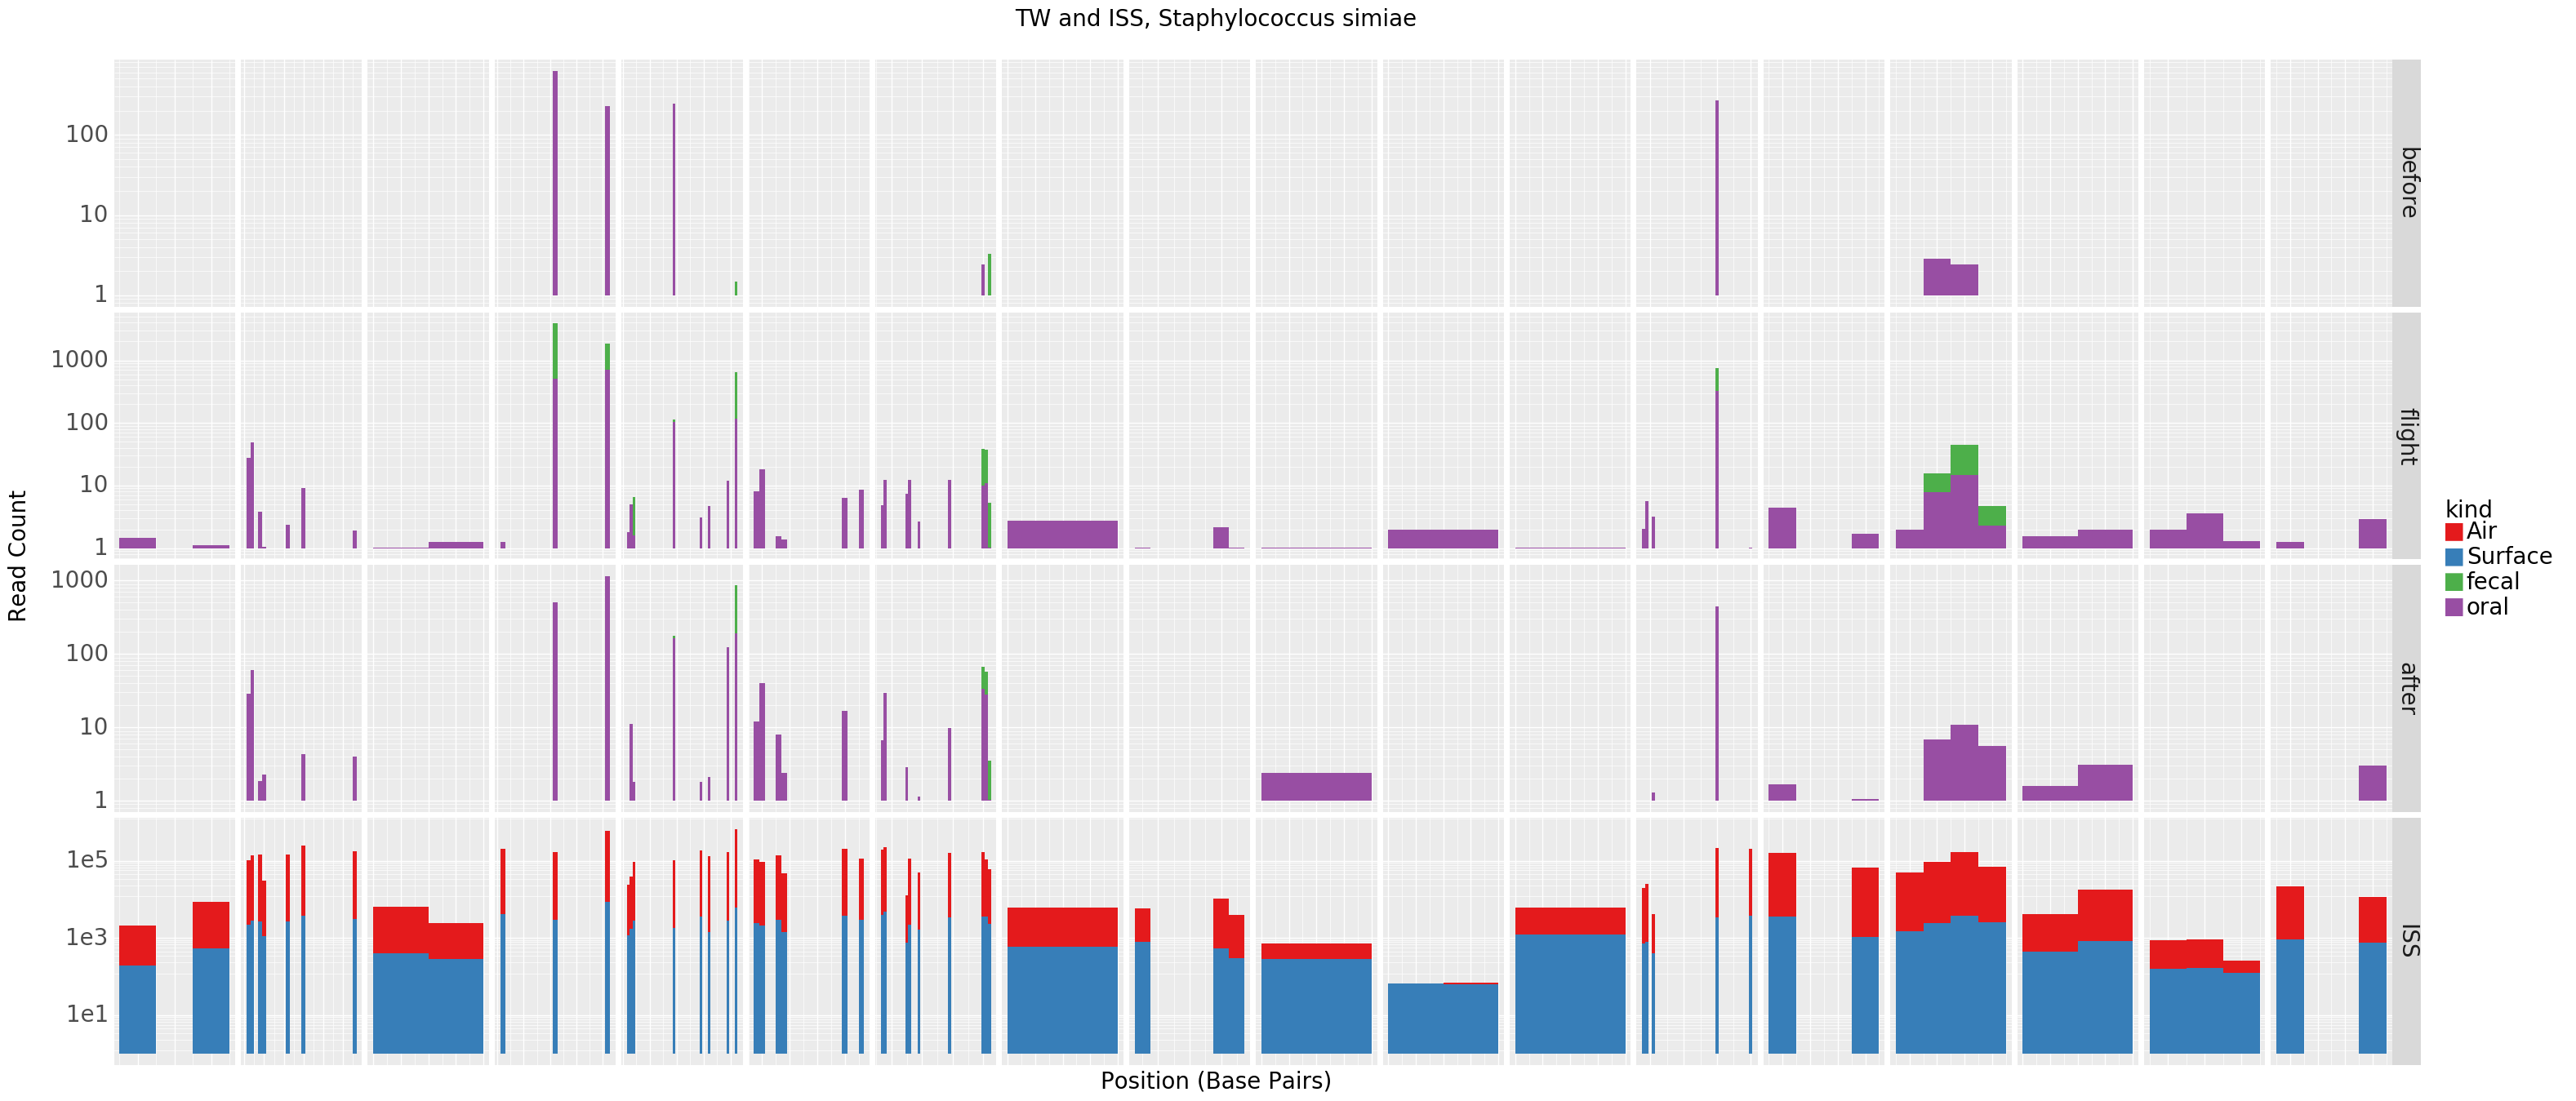

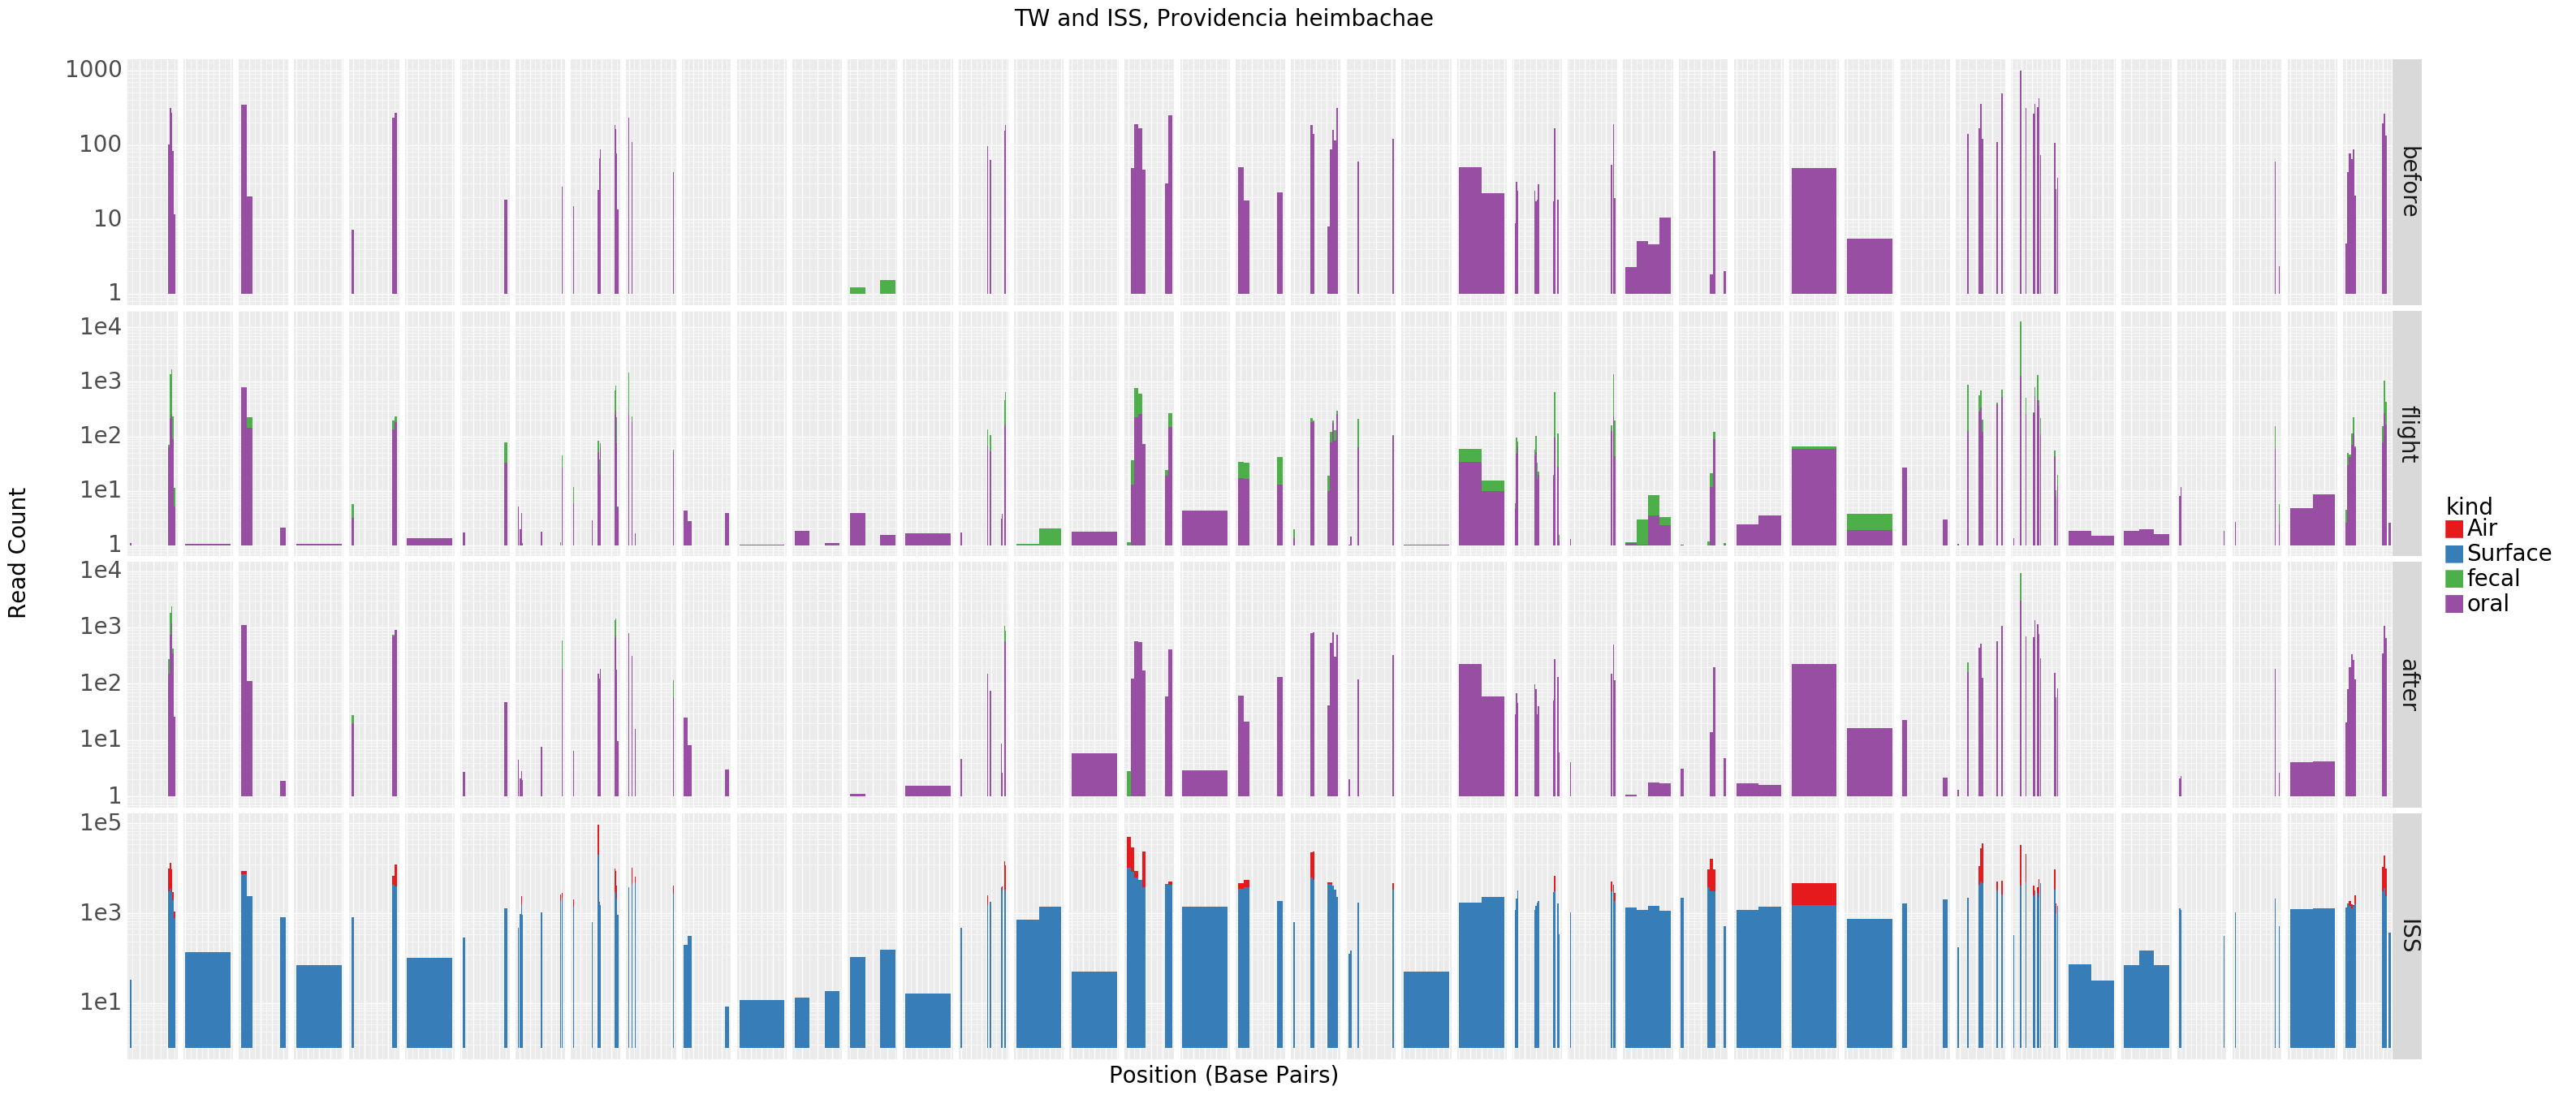

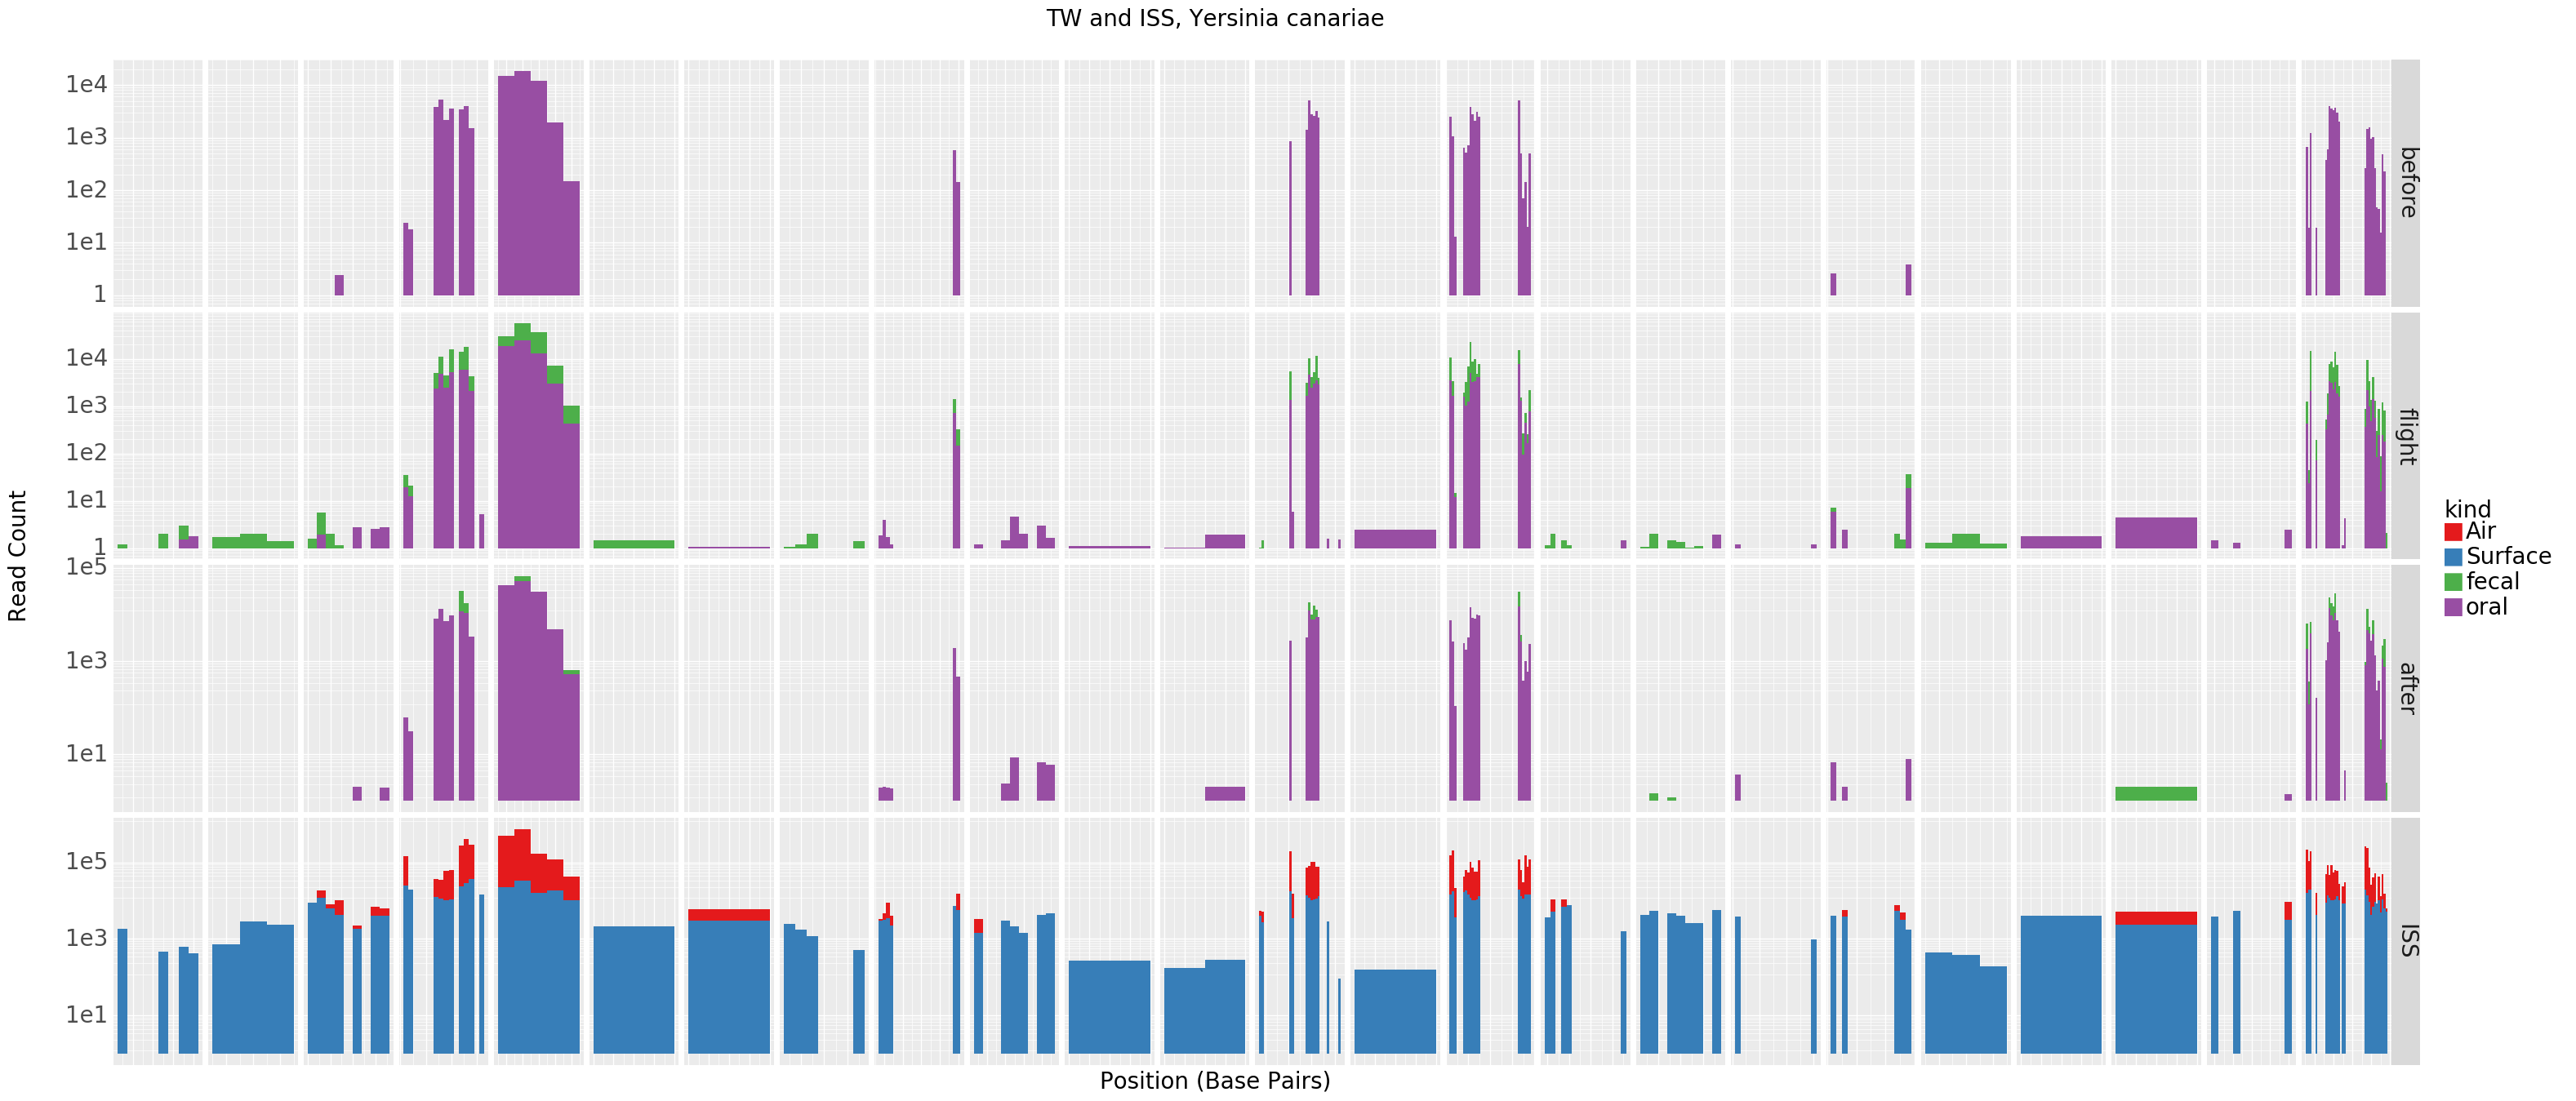

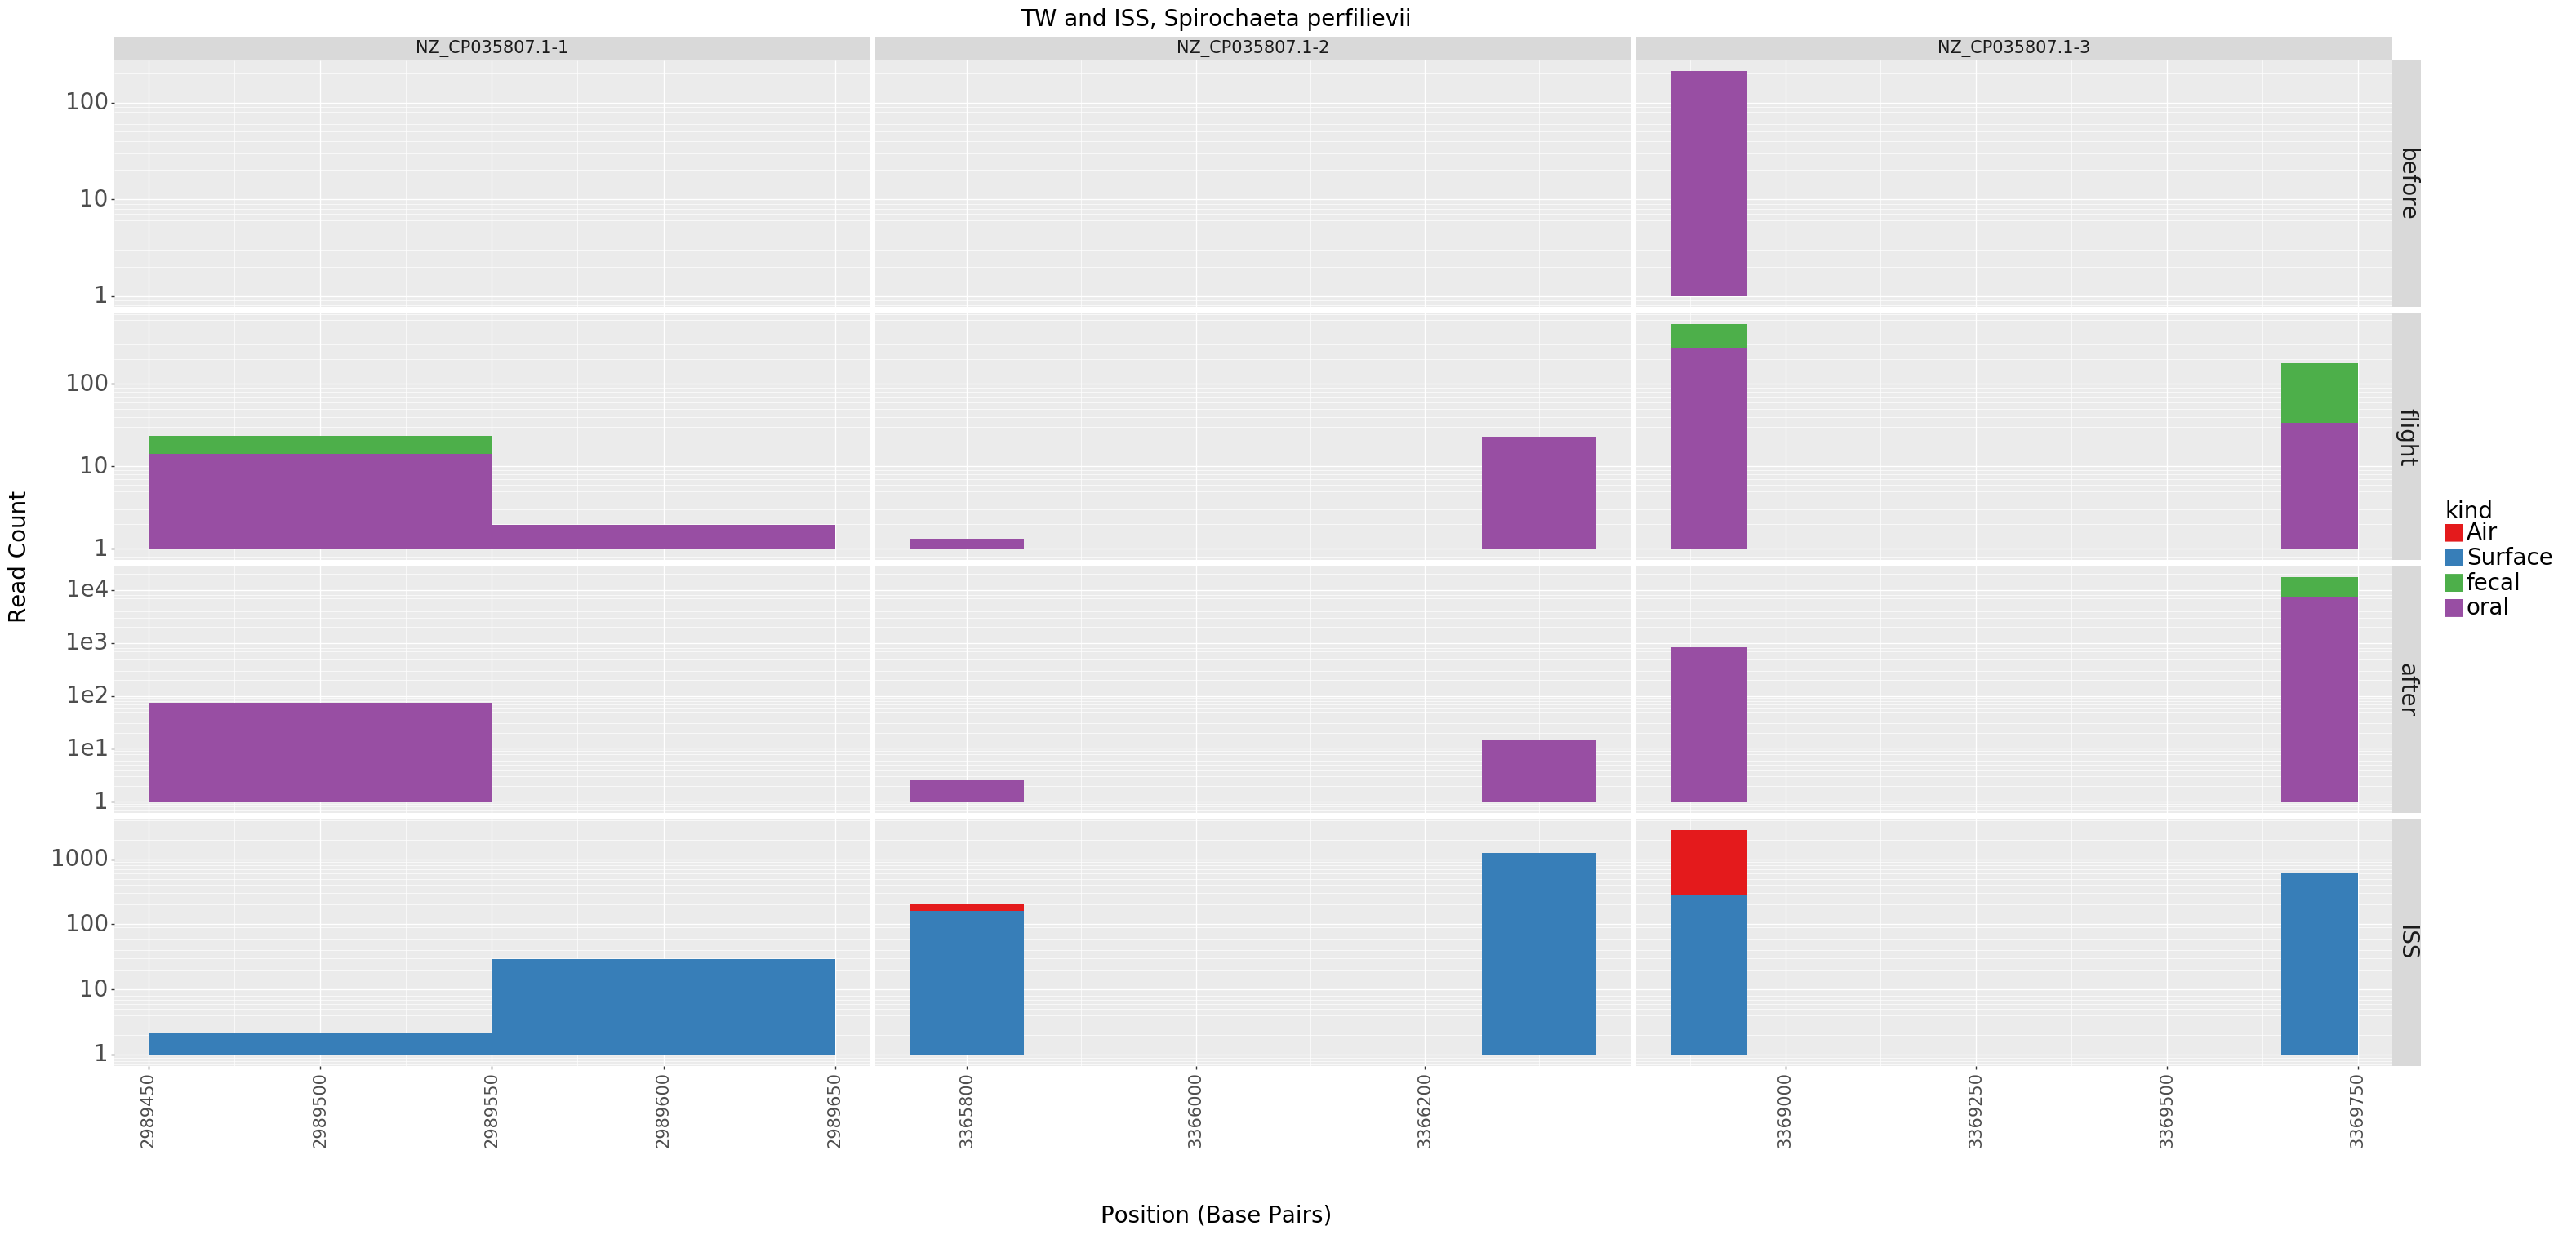

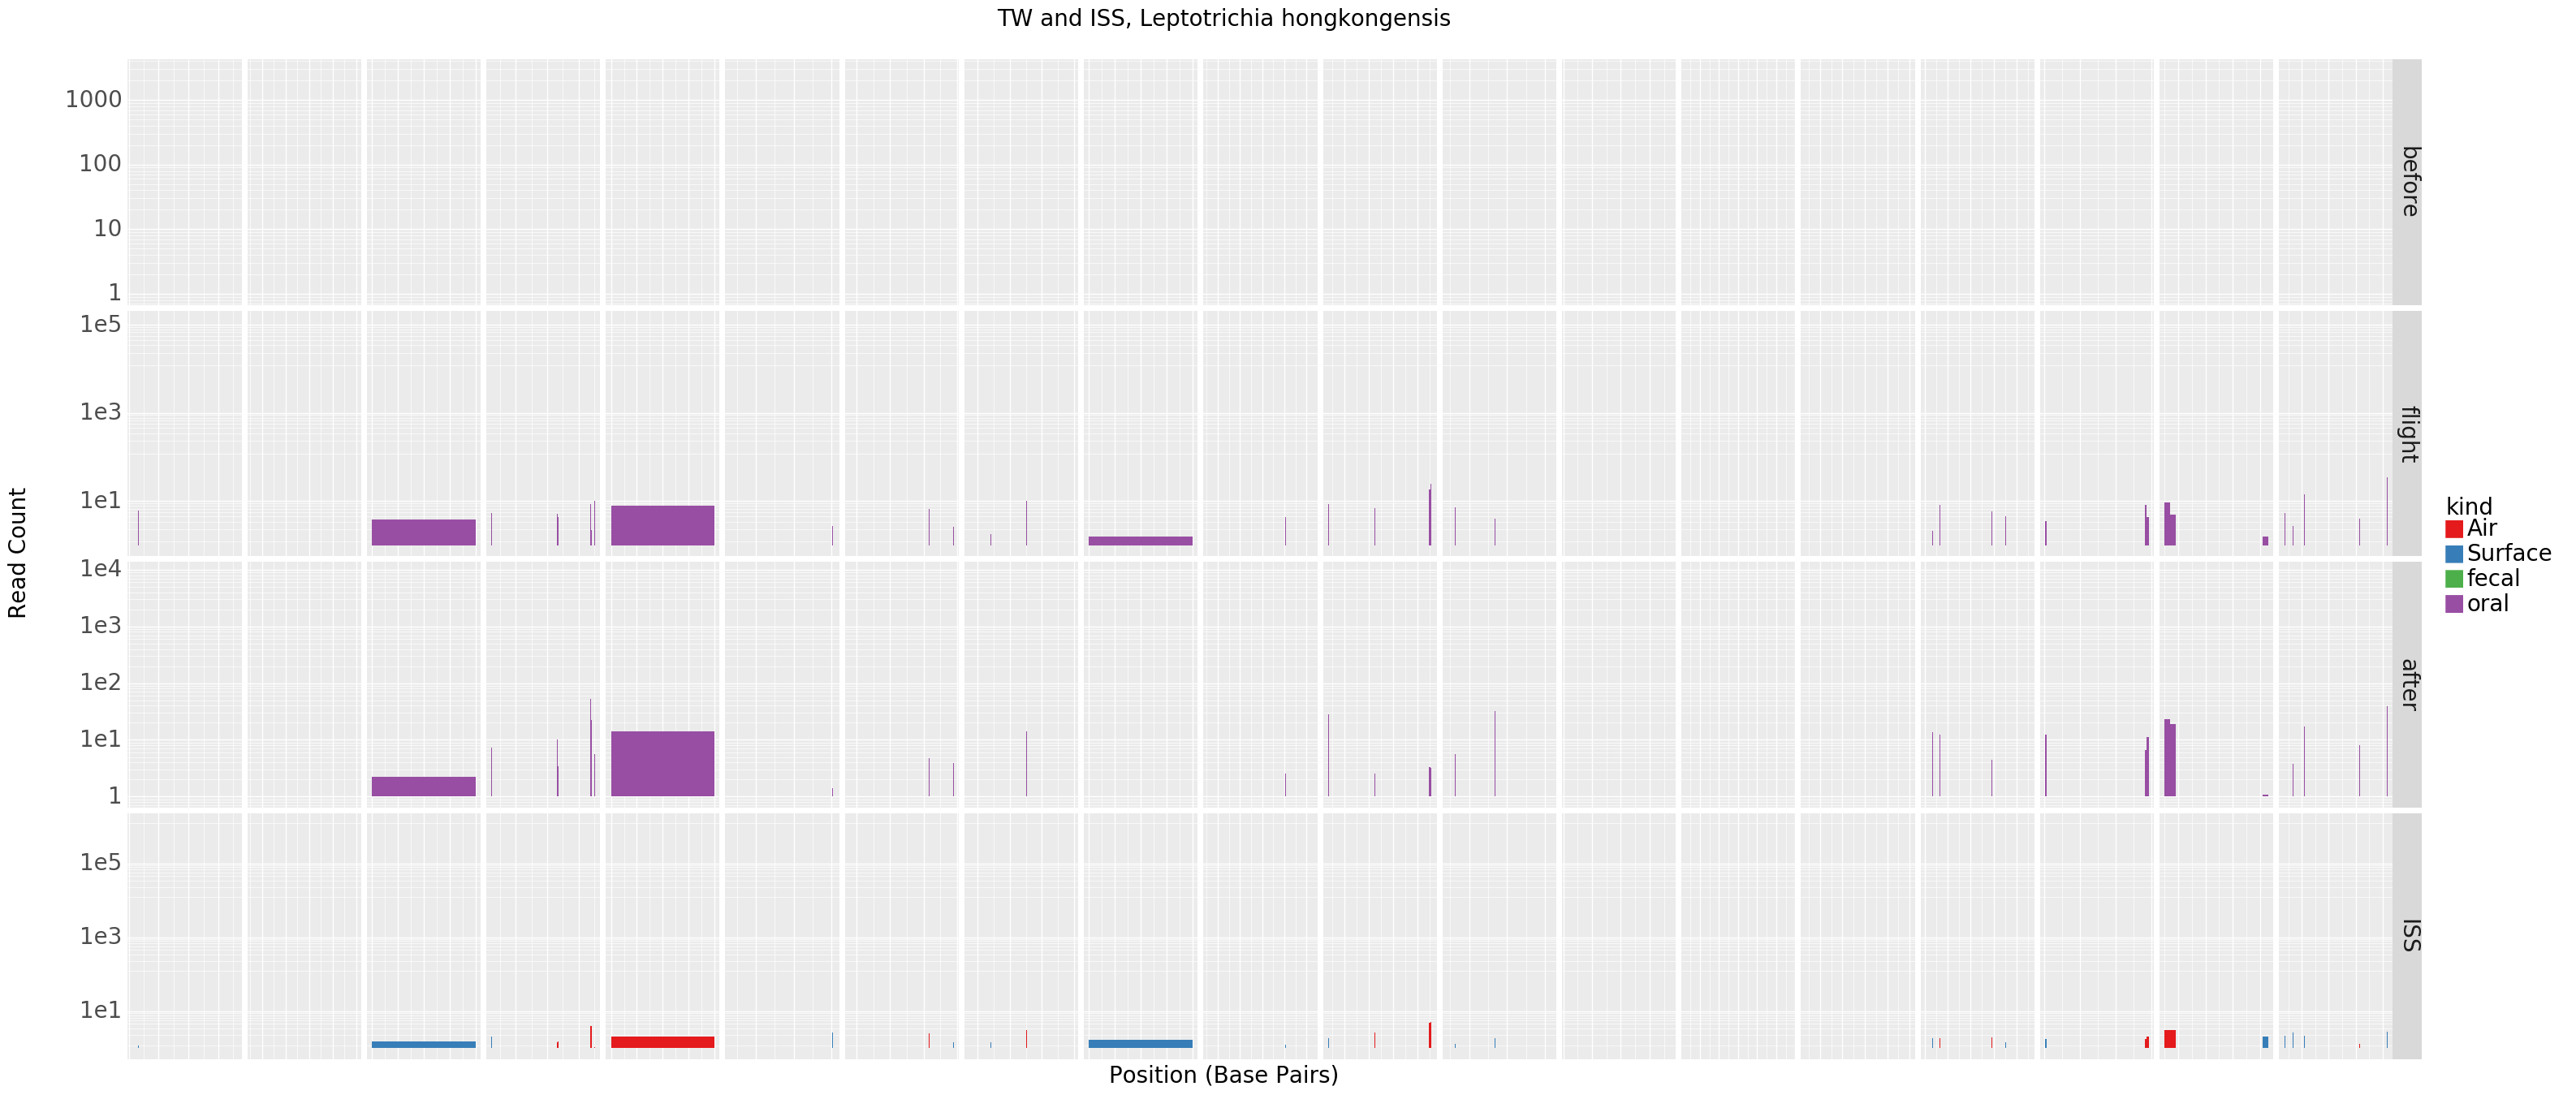

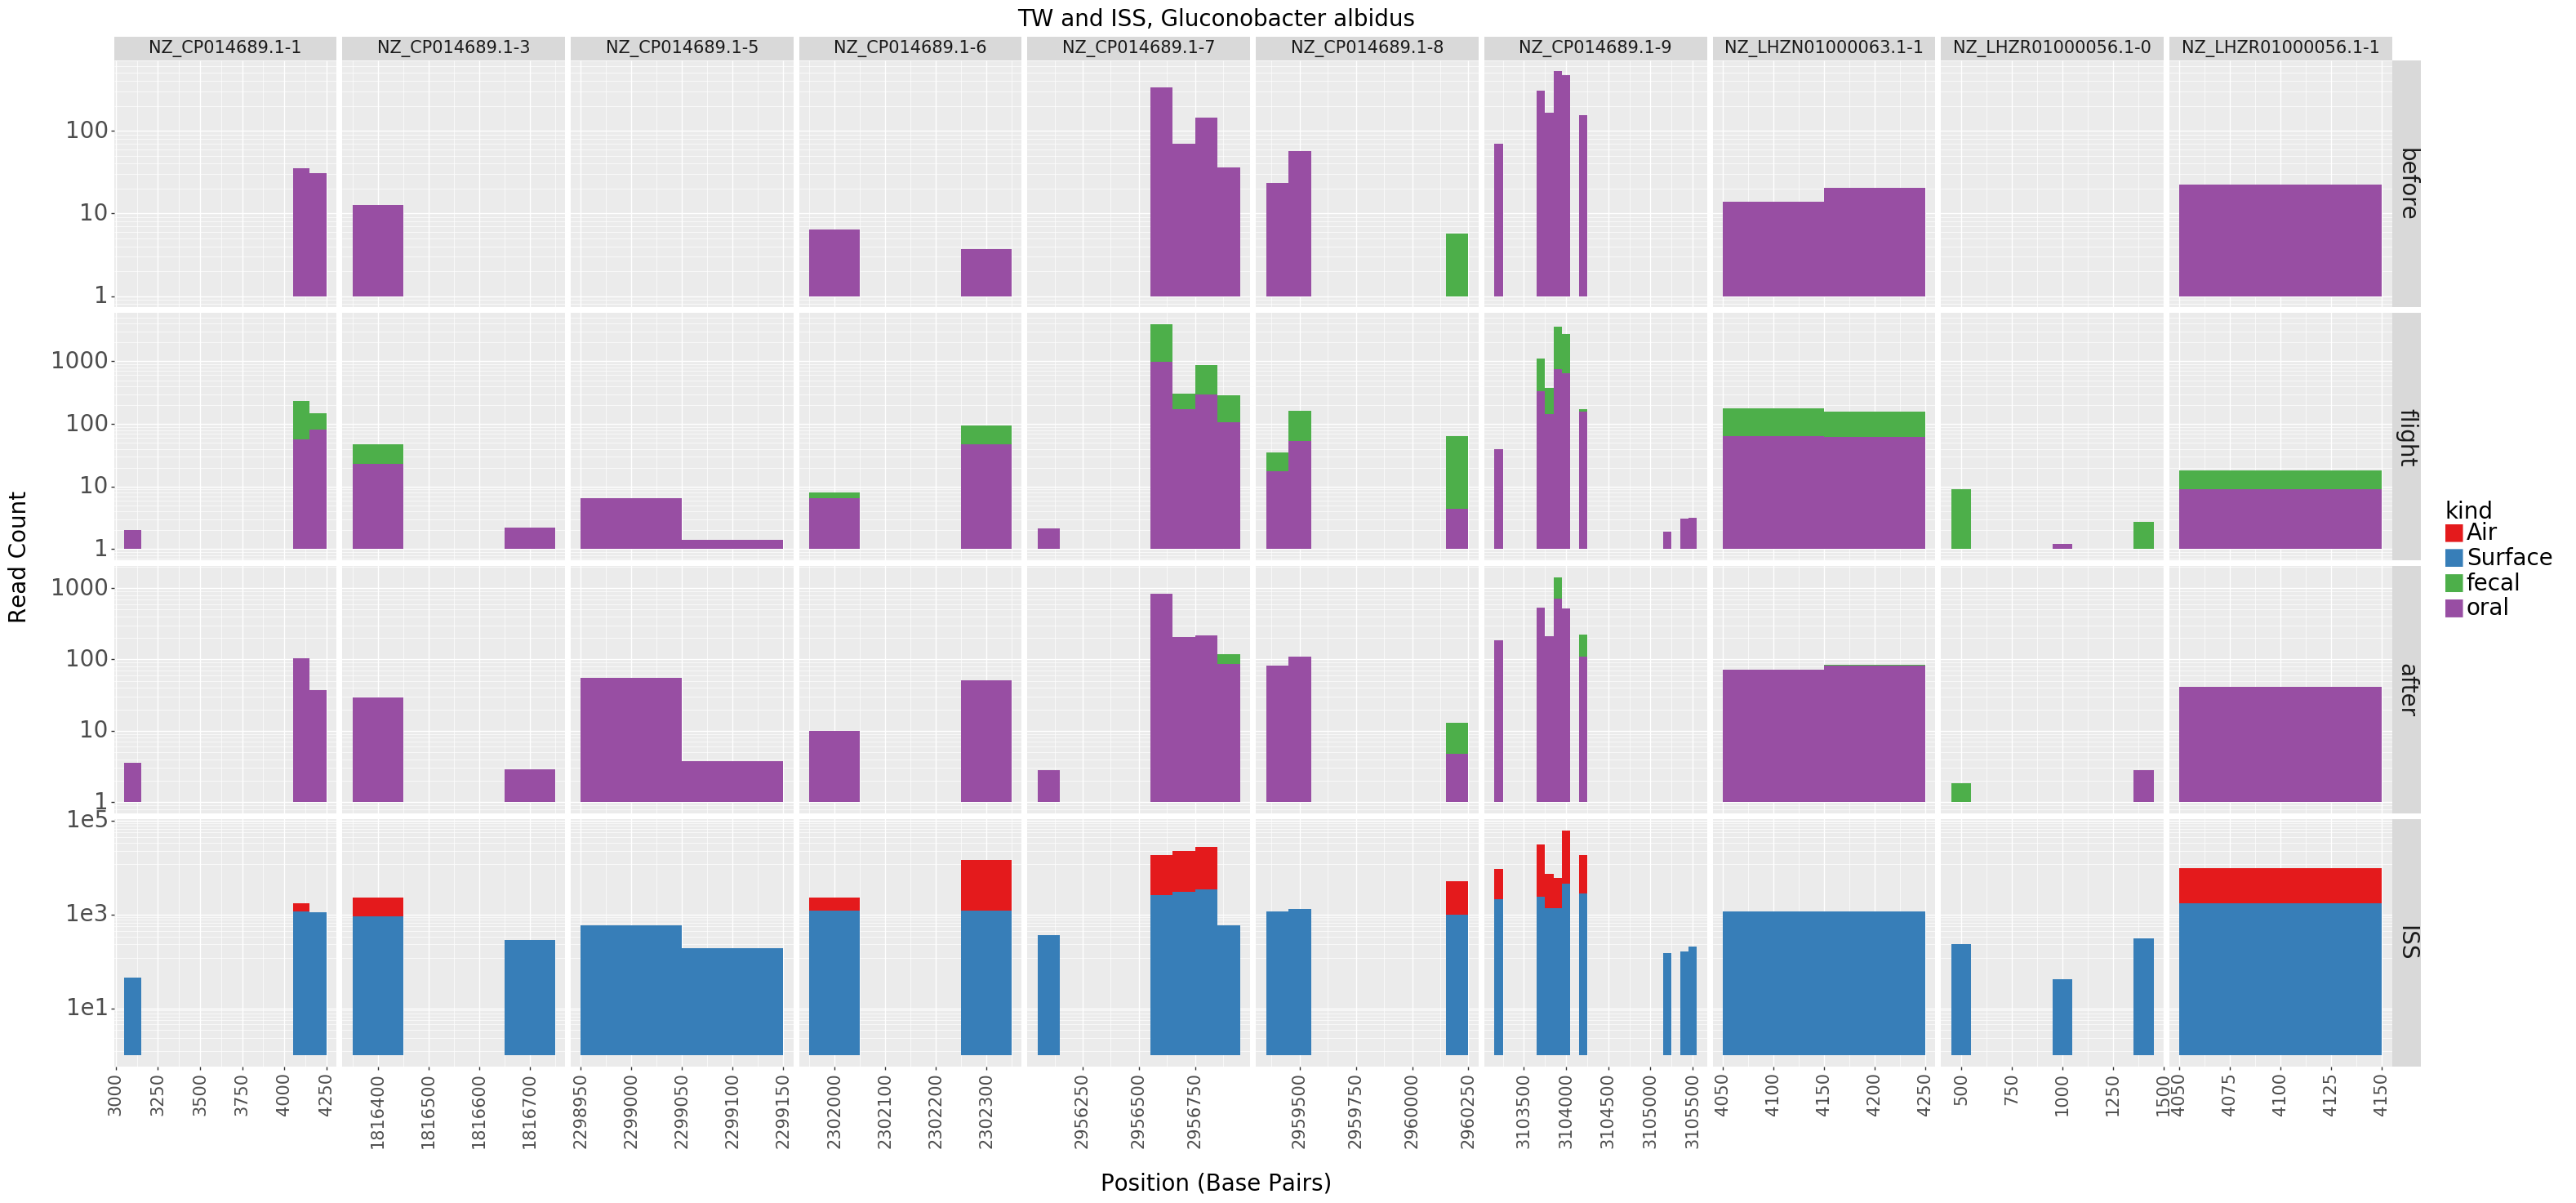

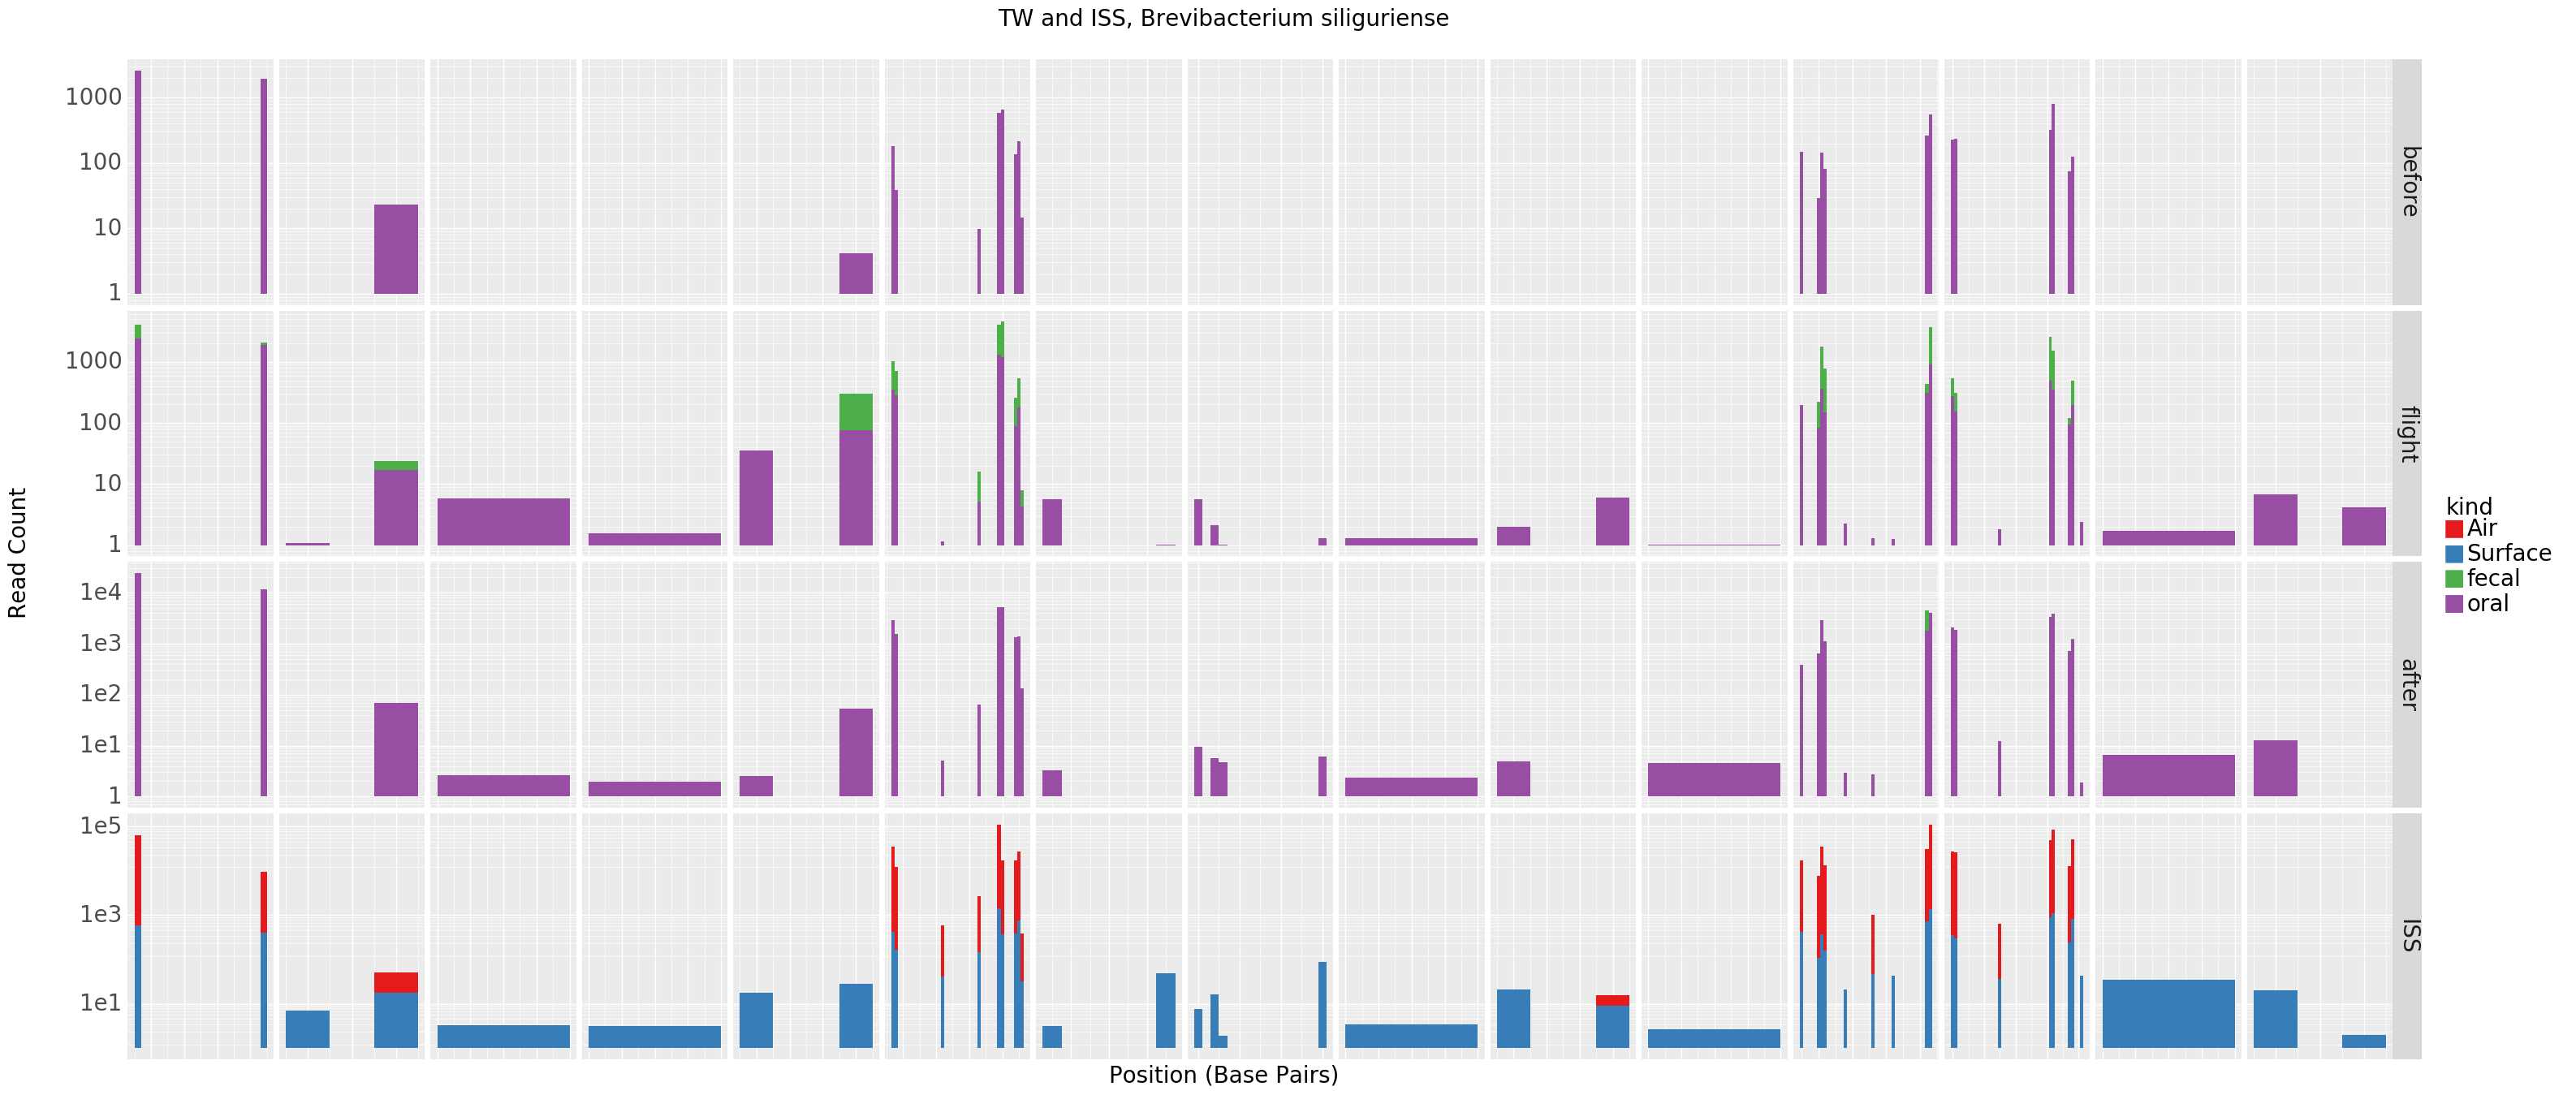

[<ggplot: (-9223363269442606304)>,
 <ggplot: (8767359852755)>,
 <ggplot: (8767397608456)>,
 <ggplot: (8767429038014)>,
 <ggplot: (8767390736076)>,
 <ggplot: (-9223363269460231322)>,
 <ggplot: (-9223363269460233675)>,
 <ggplot: (-9223363269458609916)>,
 <ggplot: (-9223363269458621587)>,
 <ggplot: (-9223363269438306325)>,
 <ggplot: (8767403529827)>,
 <ggplot: (-9223363269451241819)>,
 <ggplot: (-9223363269451246076)>,
 <ggplot: (8767378062519)>,
 <ggplot: (-9223363269476706044)>,
 <ggplot: (-9223363269445871139)>,
 <ggplot: (8767380227855)>,
 <ggplot: (-9223363269474538394)>]

In [77]:
organisms = list(counts['true_transfer'].sort_values(ascending=False).tail(-10).index)
plots = [plot_organism(org) for org in organisms]

plots